In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

from IPython.core.pylabtools import figsize

import numpy.random as r
from pylab import *
from matplotlib.gridspec import GridSpec

import sys
sys.path.insert(0, '../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"


In [2]:
%run -i 'load_data.py'

In [3]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()

/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: Matpl

In [4]:
if not os.path.exists('plots3'):
    os.makedirs('plots3')
    
    
if not os.path.exists('plots3/figure1'):
    os.makedirs('plots3/figure1')
    os.makedirs('plots3/figure2')
    os.makedirs('plots3/figure3')

In [5]:
# scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['nt_coverage'], 'Cadm1_2', 10)
# scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['nt_coverage'], 'Cadm1_2', 10, 
#          filter_cells=False)

In [6]:
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 'Rpn2_1', 10)
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Clta_4', 10)
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Mff_3', 10)
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Tecr_4', 10)
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Idh3g_1', 10)
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Zfp207_1', 10)


In [7]:
from sklearn.decomposition import PCA
from scipy.stats import spearmanr
import rpy2
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri as rpyn
from statsmodels.stats.multitest import multipletests
dt = rpy2.robjects.packages.importr('diptest')

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [8]:
chen_ES2i_filtered = process_subpop(chen_ES2i, chen_PSI, chen_mrna_counts, 
                                    mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.2, 6, 10)
chen_ES_filtered = process_subpop(chen_ES, chen_PSI, chen_mrna_counts, 
                                  mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.2, 6, 10)
chen_Epi_filtered = process_subpop(chen_Epi, chen_PSI, chen_mrna_counts, 
                                   mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.2, 6, 10)
chen_MN_filtered = process_subpop(chen_MN, chen_PSI, chen_mrna_counts, 
                                  mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.2, 6, 10)


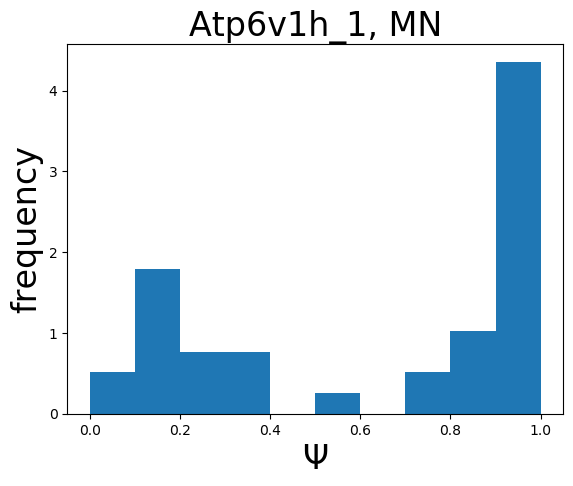

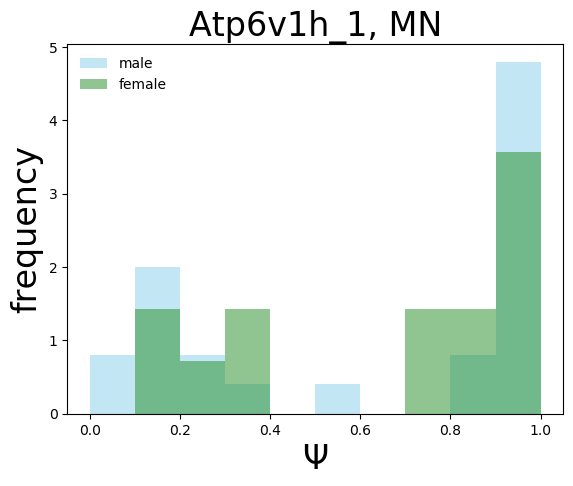

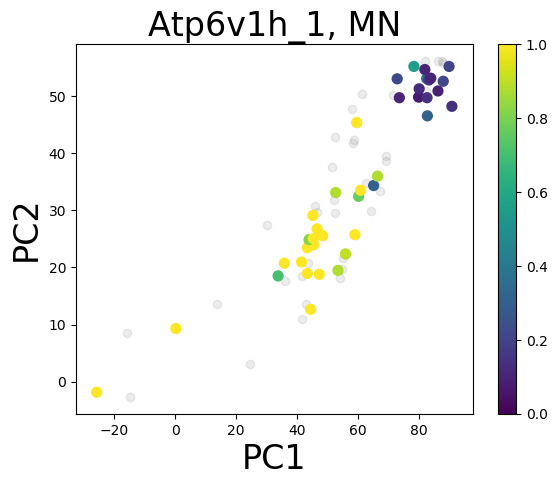

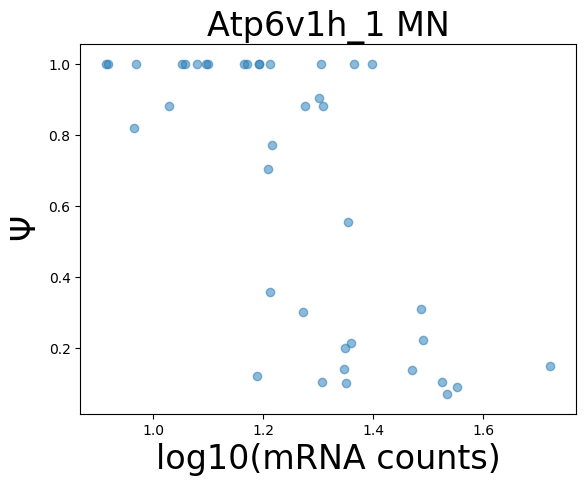

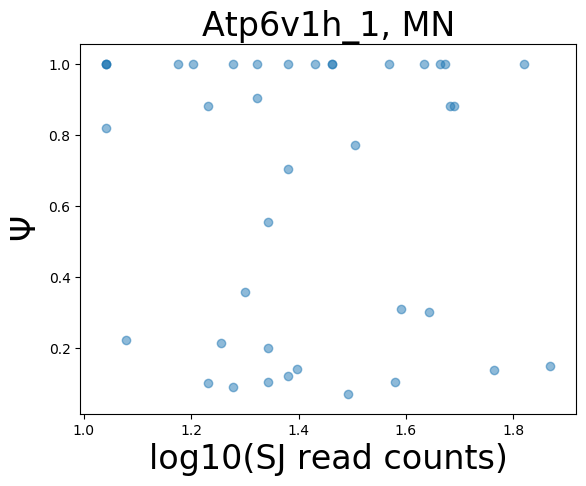

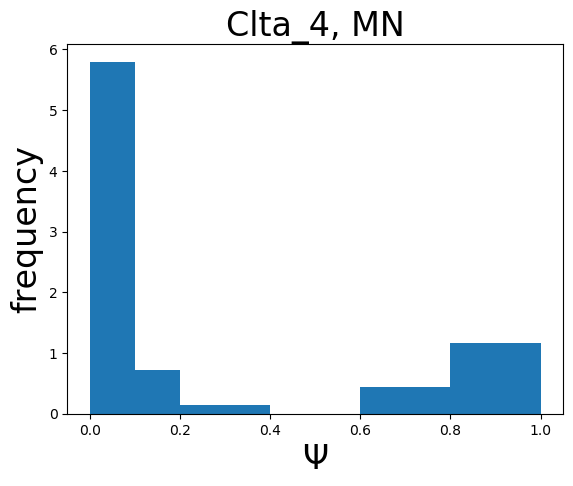

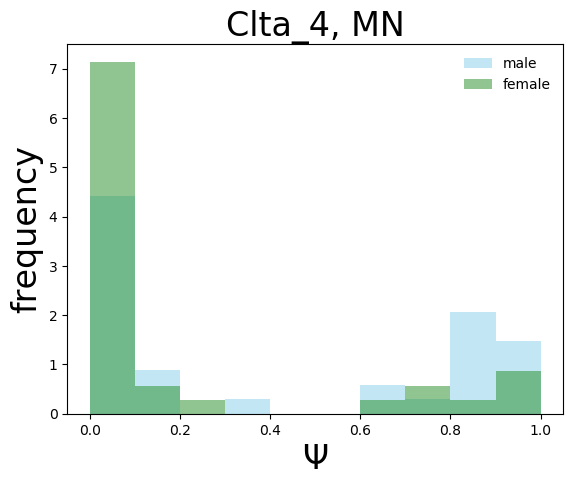

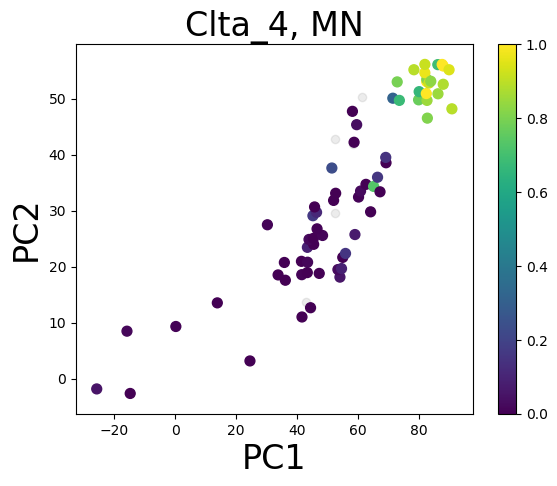

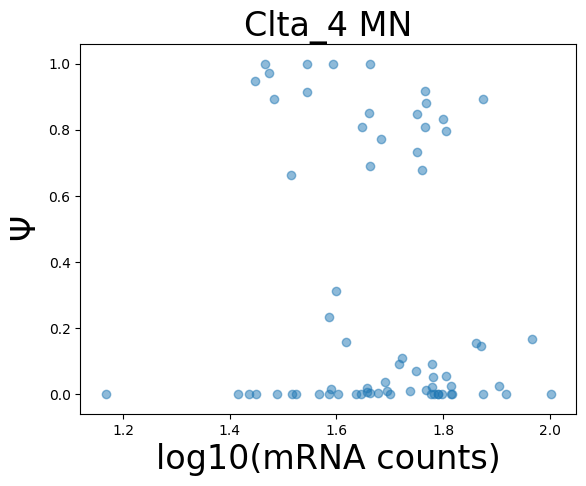

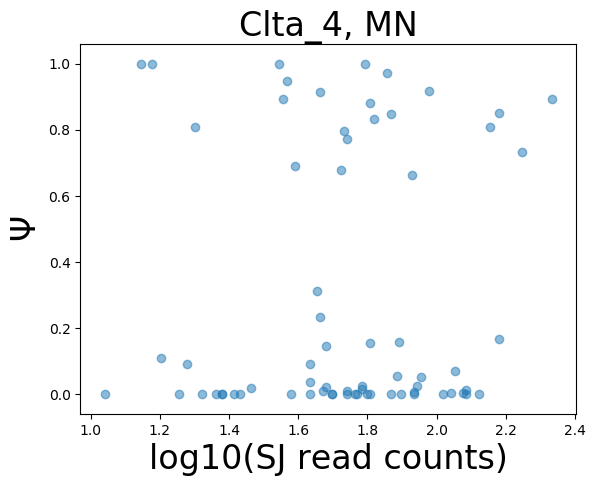

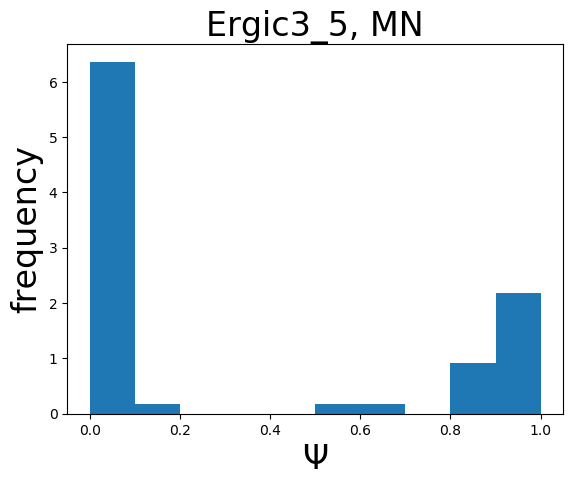

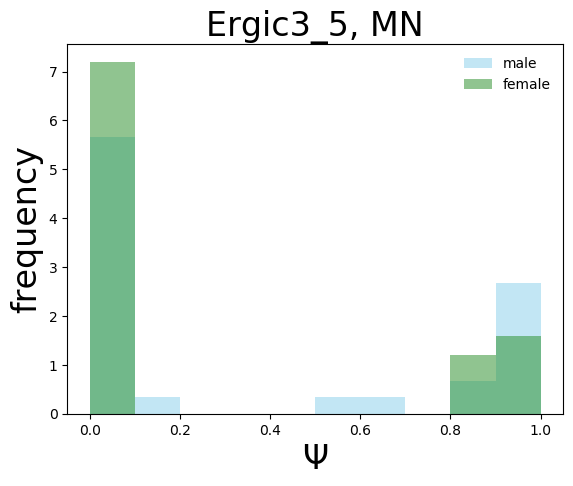

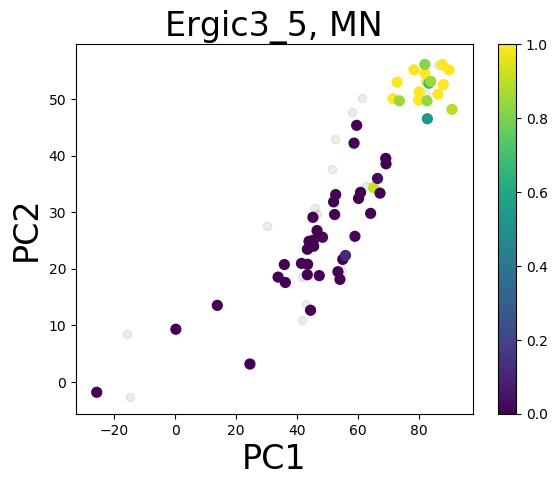

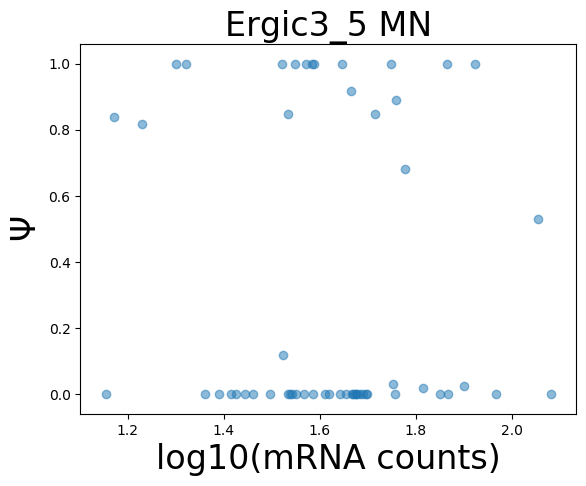

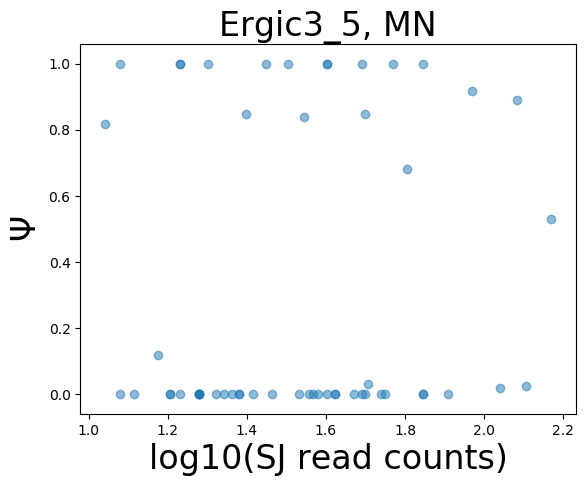

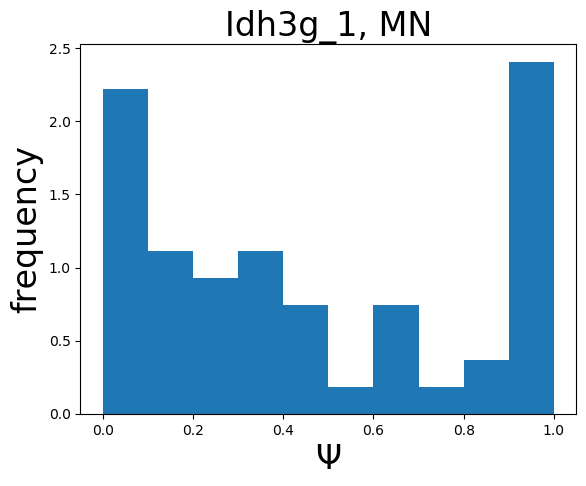

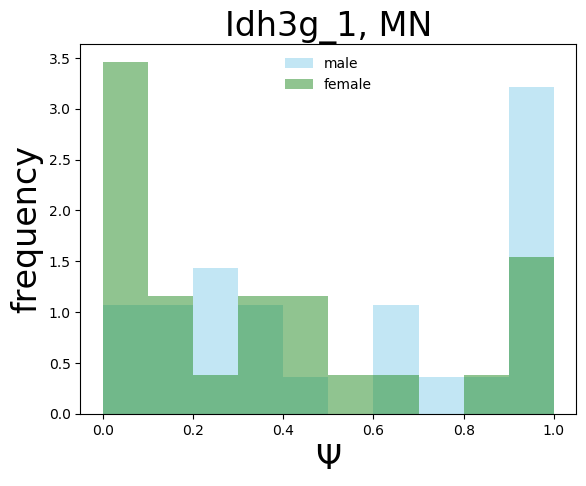

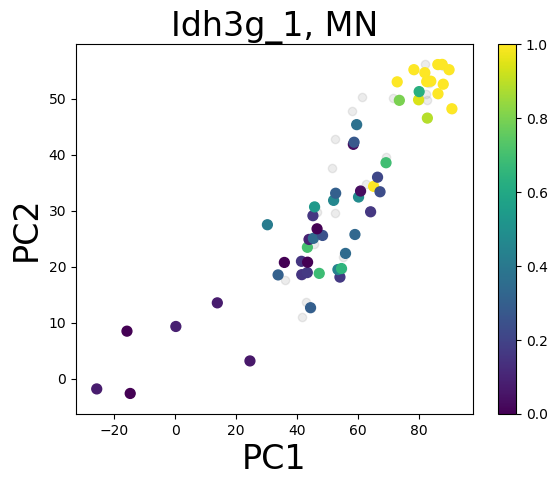

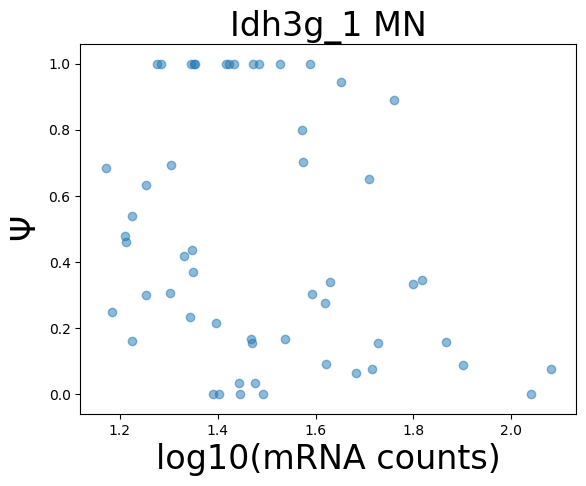

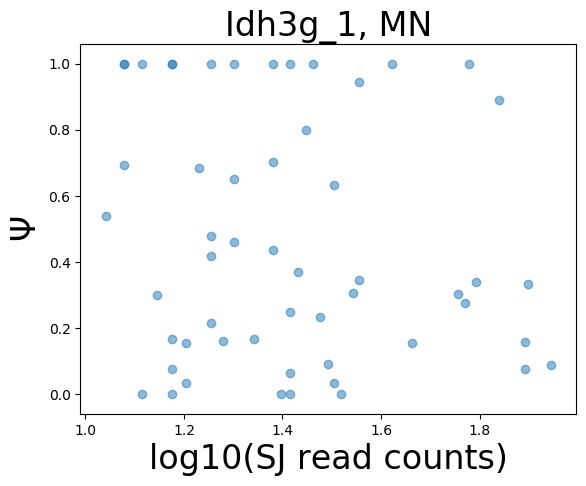

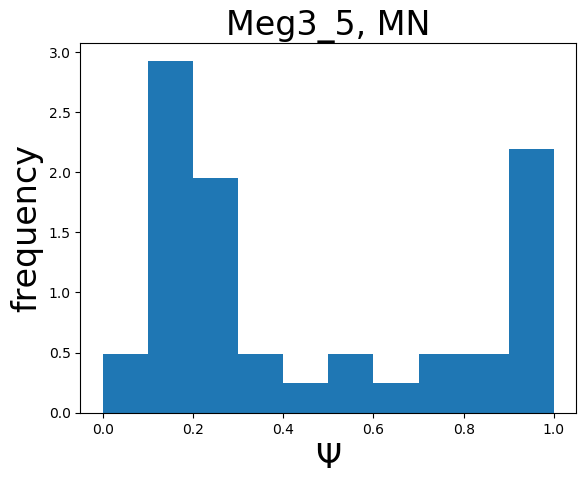

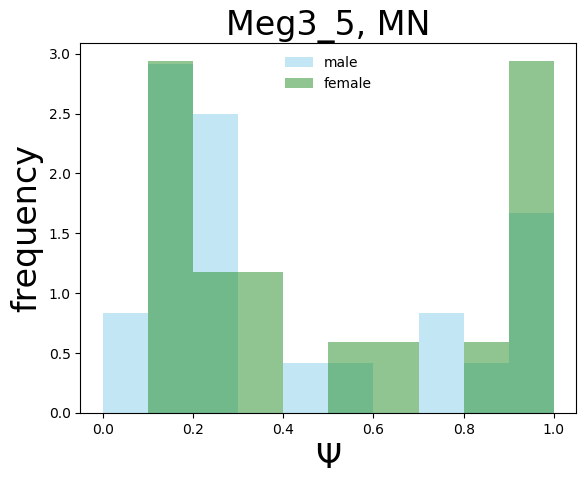

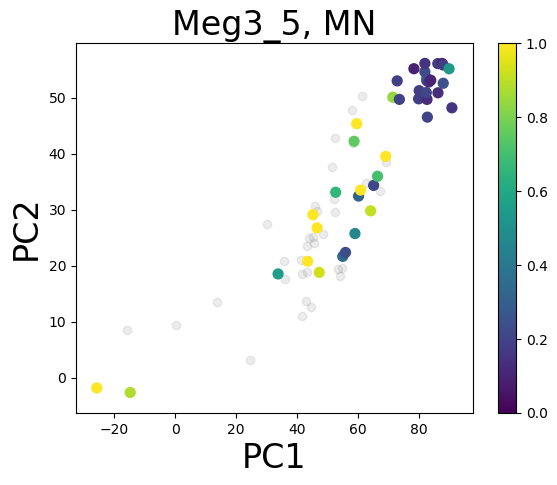

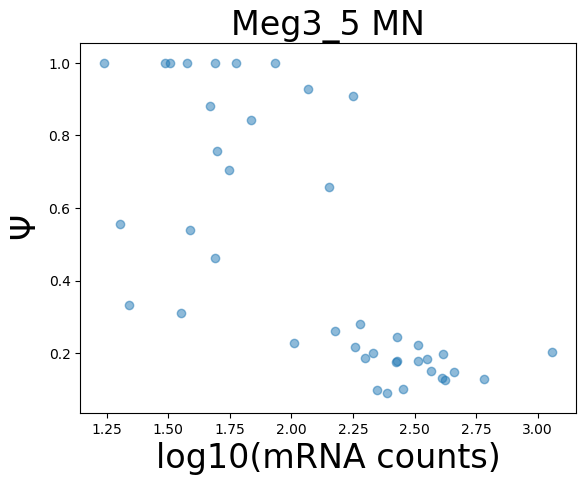

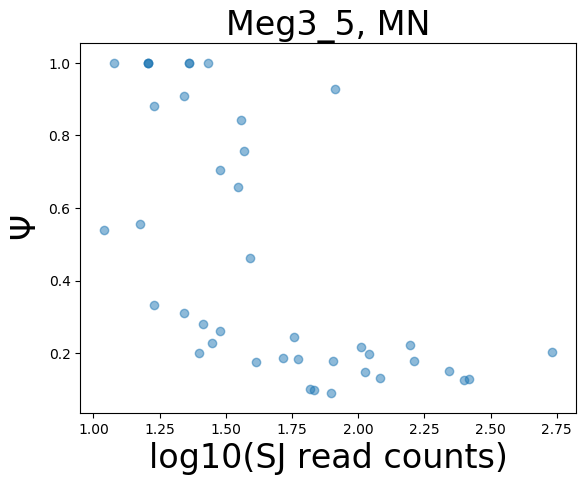

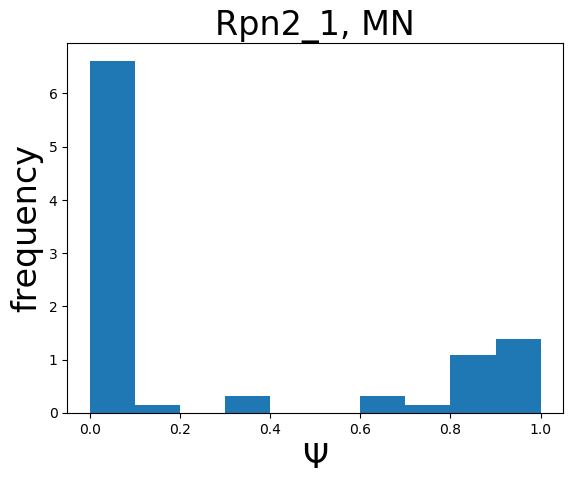

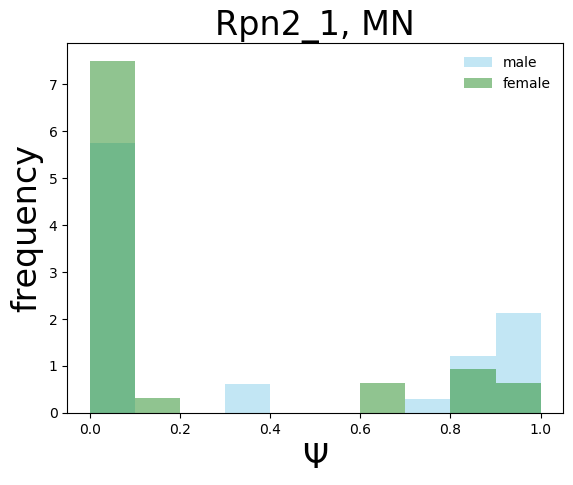

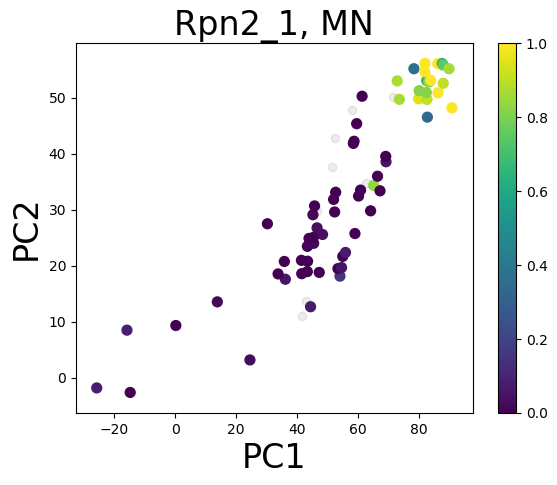

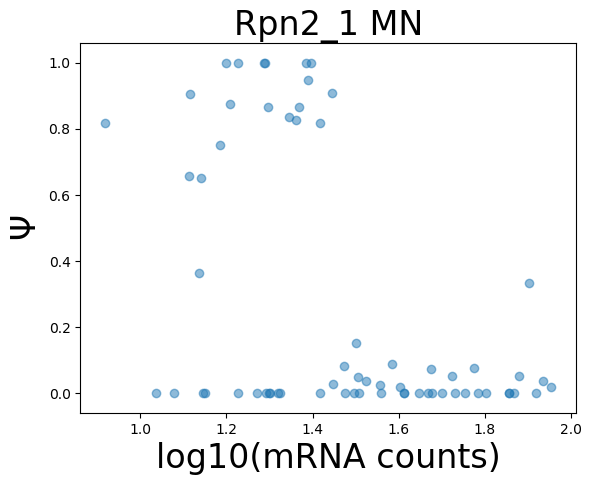

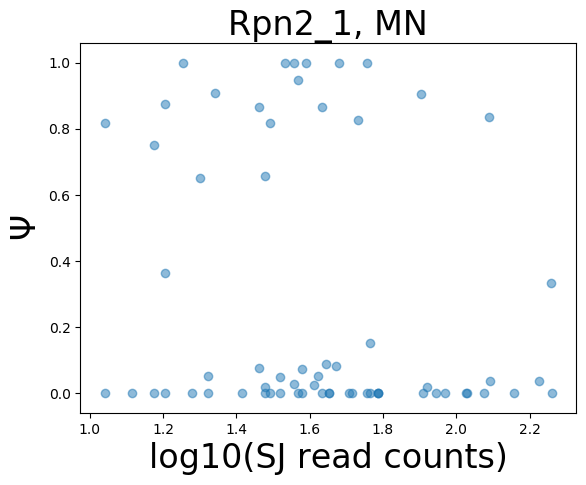

In [9]:
filtered_bimodal([chen_ES2i_filtered, chen_ES_filtered, chen_Epi_filtered, chen_MN_filtered], 
                 ['ES2i', 'ES', 'Epi', 'MN'], chen_pca, mrna_per_event_chen, 
                     chen_read_counts, quantile = 0.25, psi_lim = 0.25)

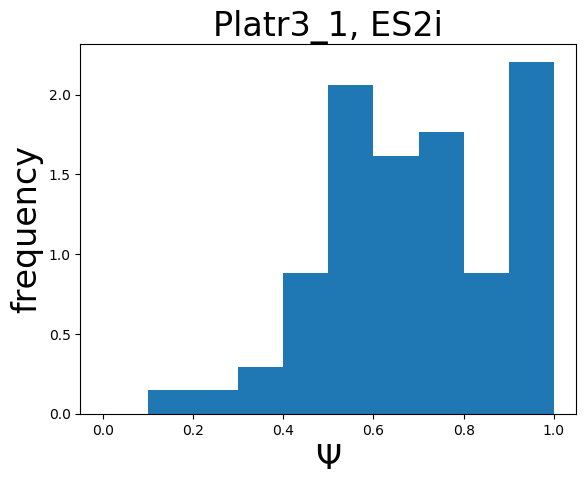

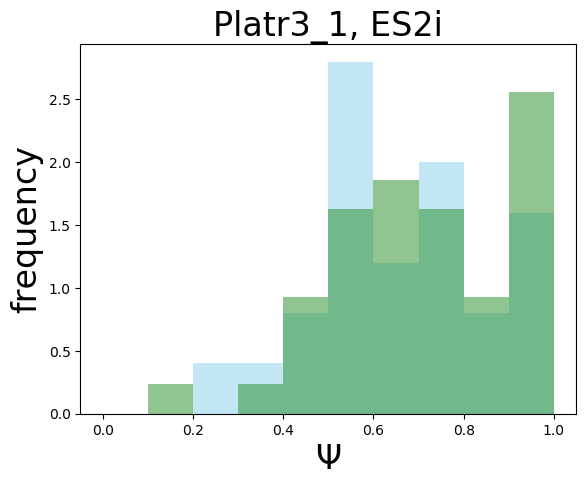

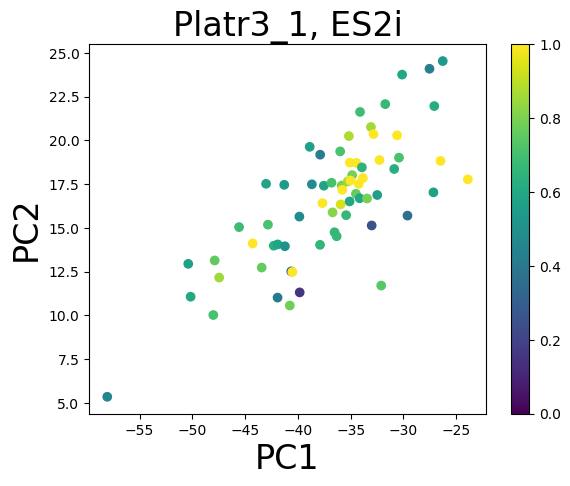

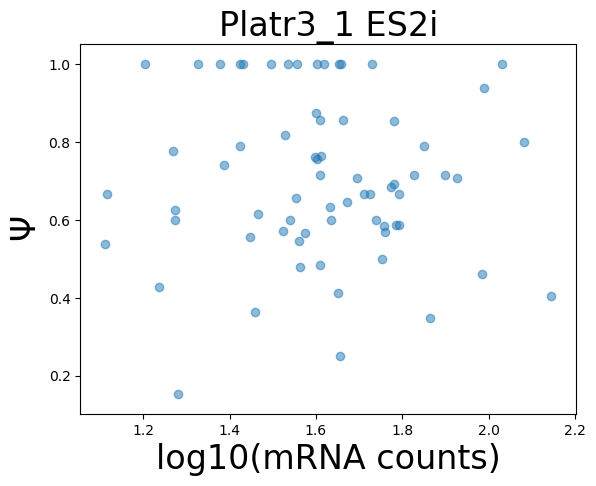

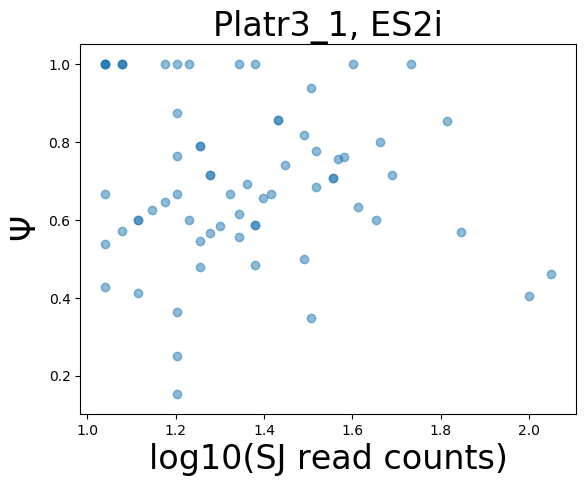

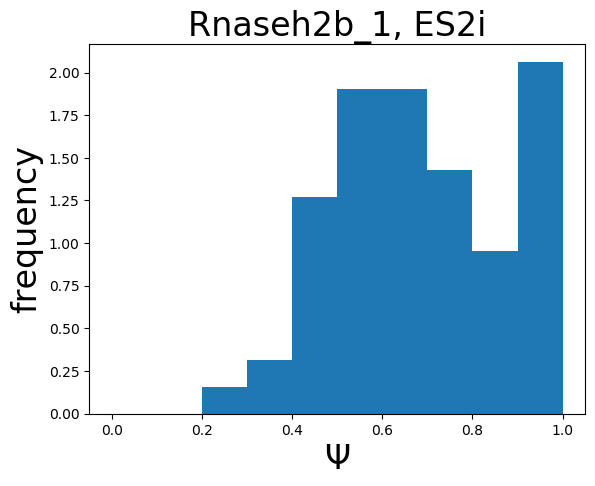

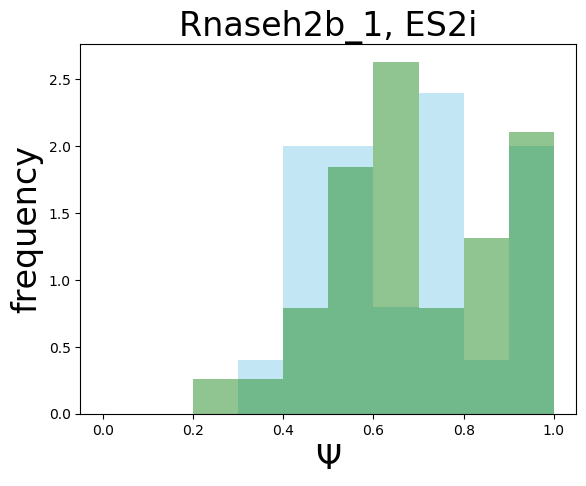

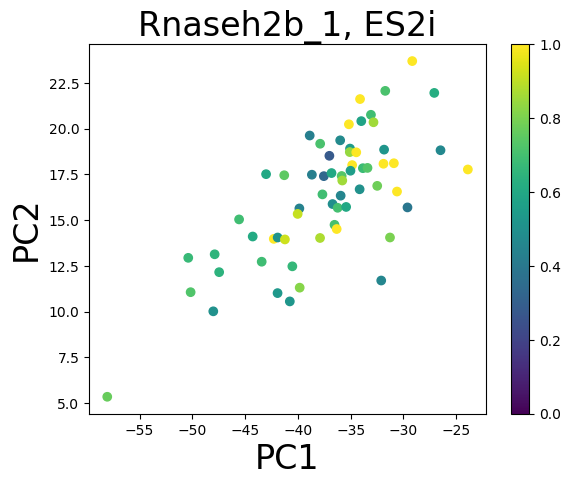

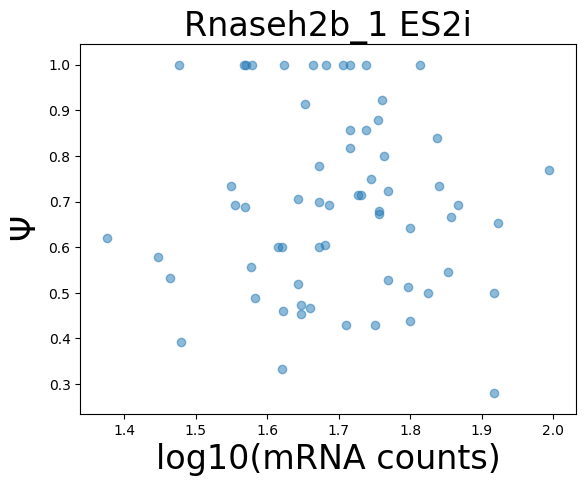

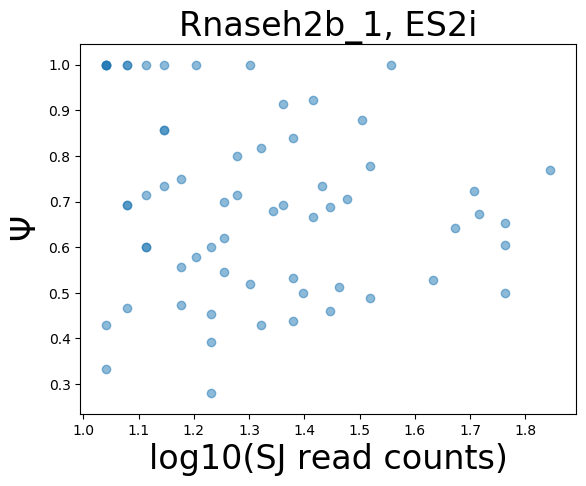

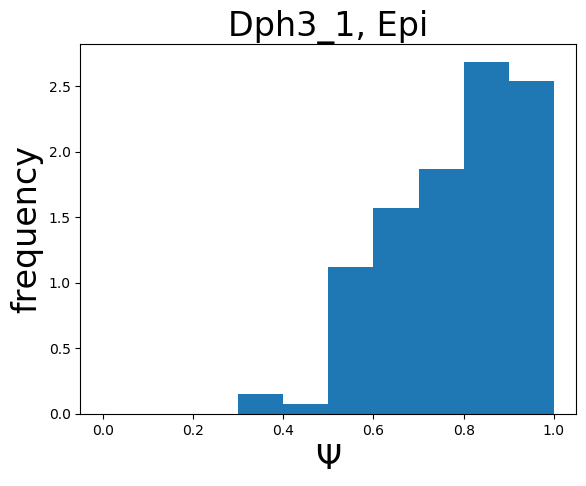

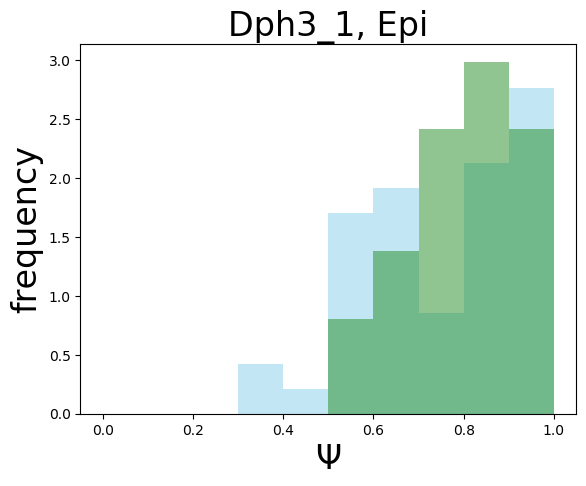

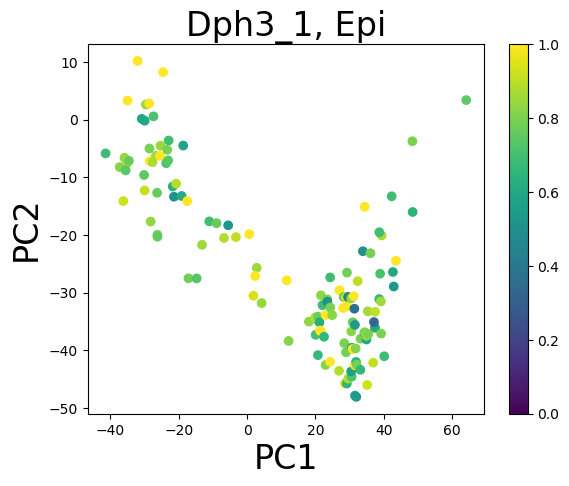

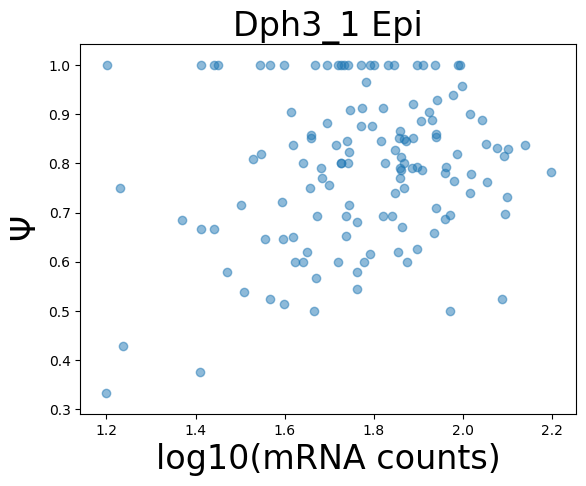

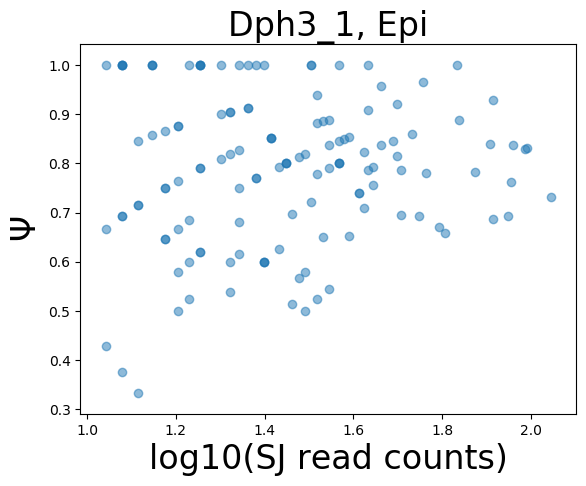

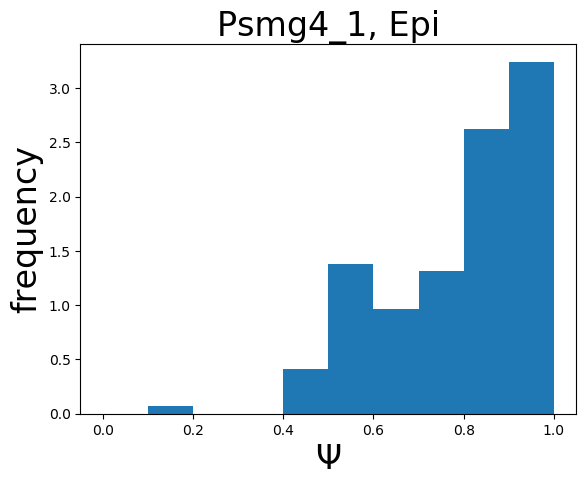

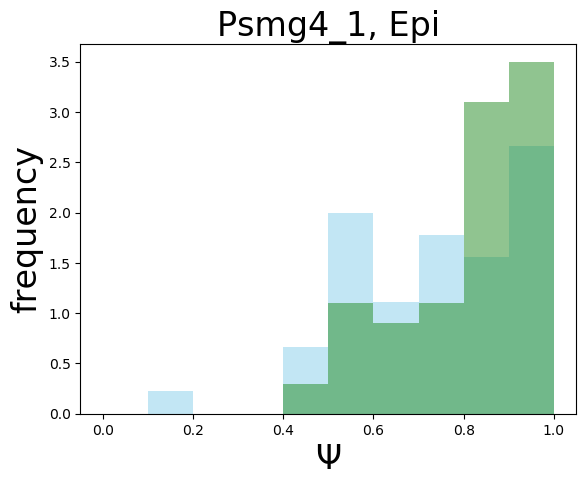

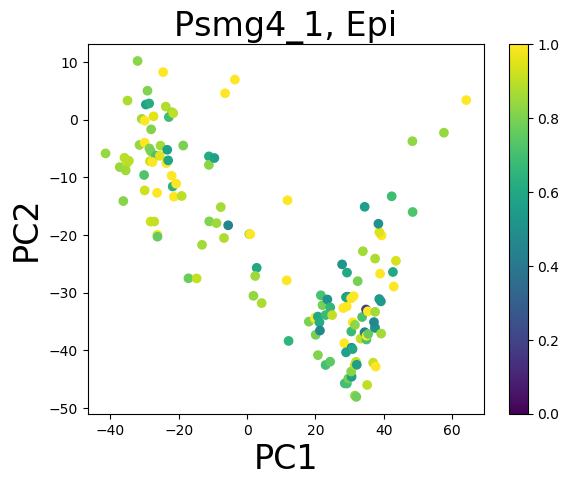

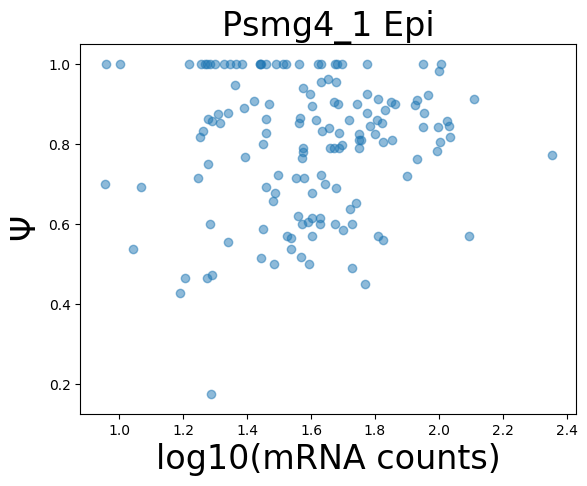

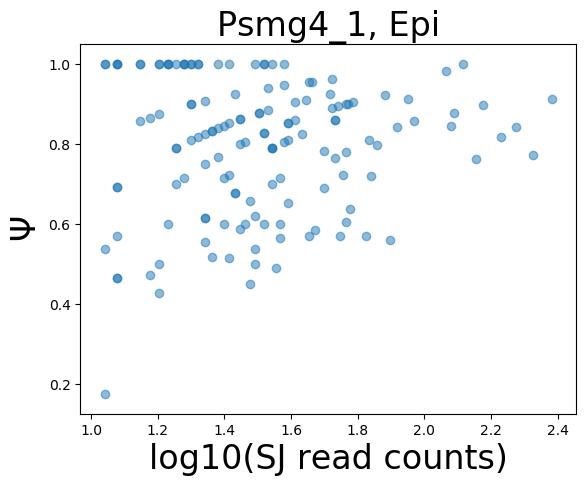

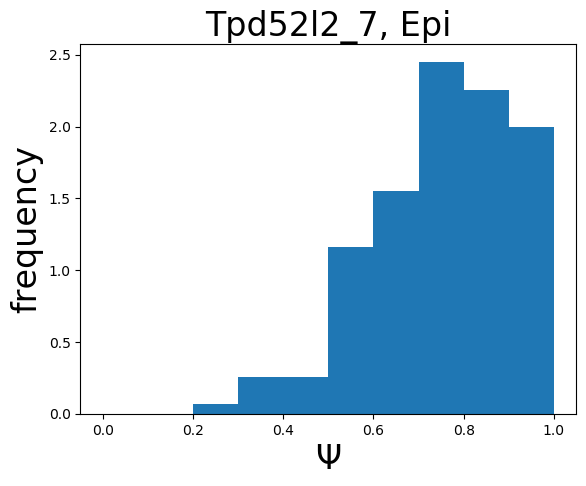

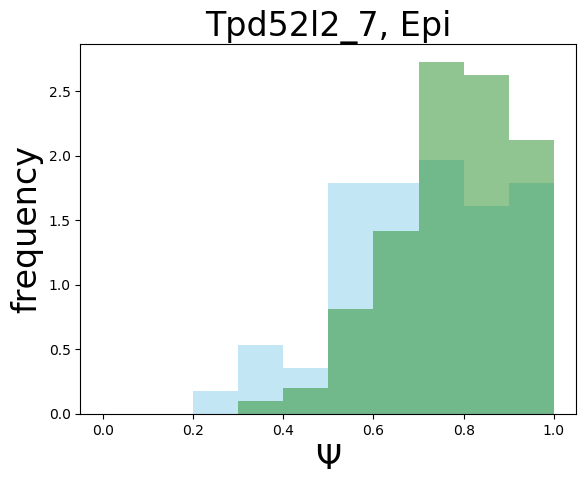

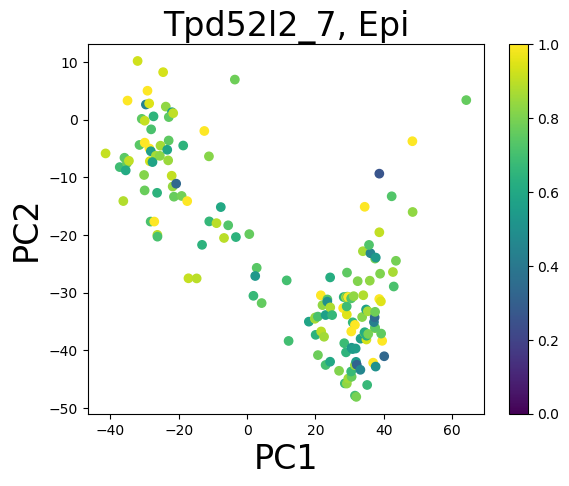

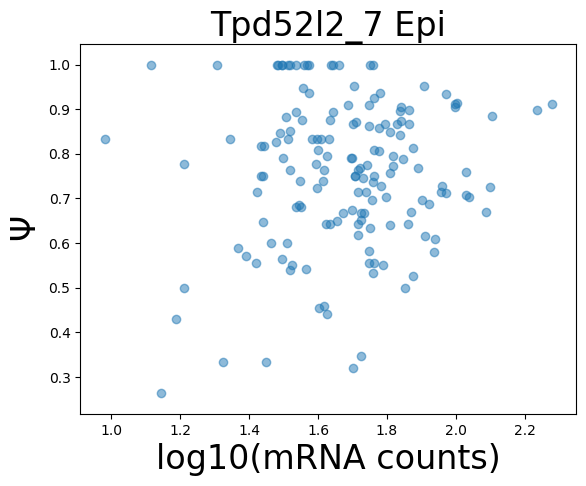

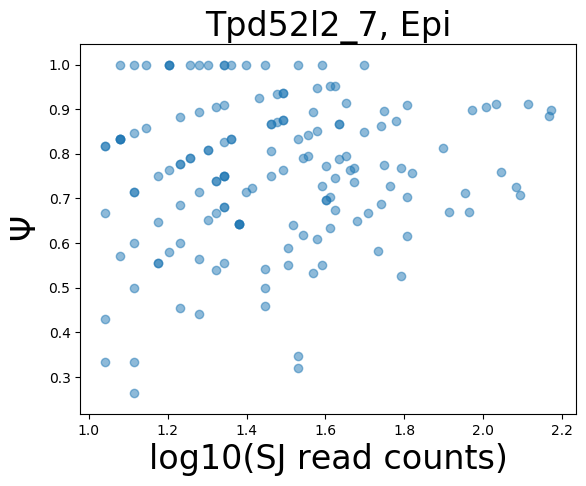

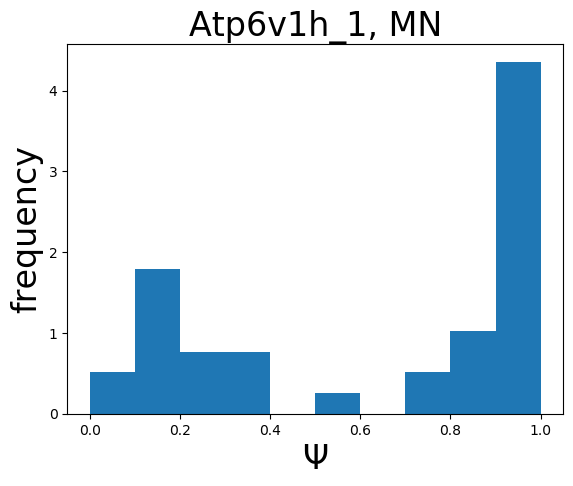

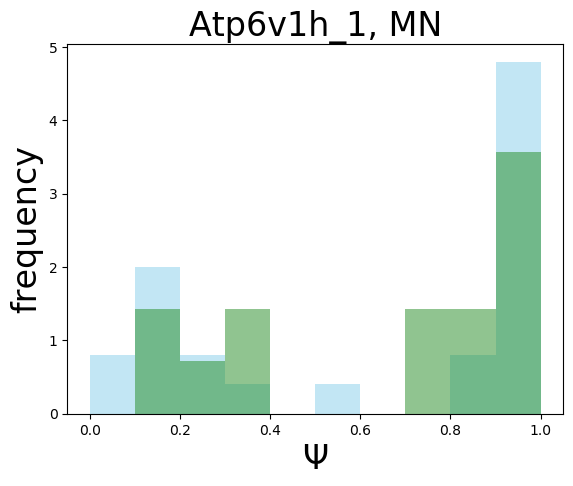

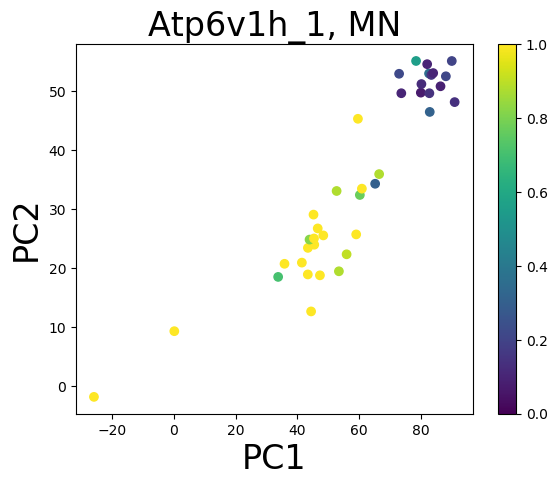

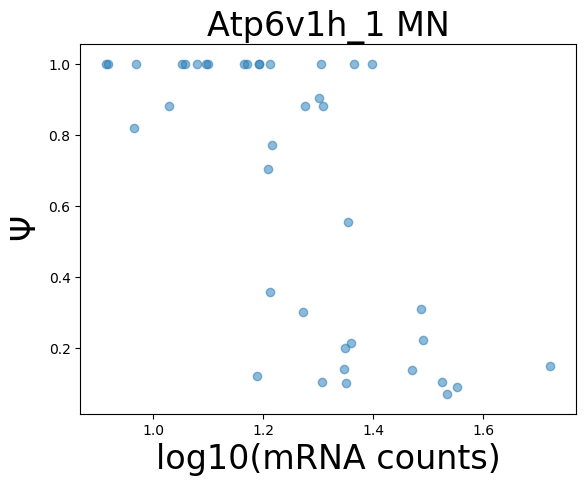

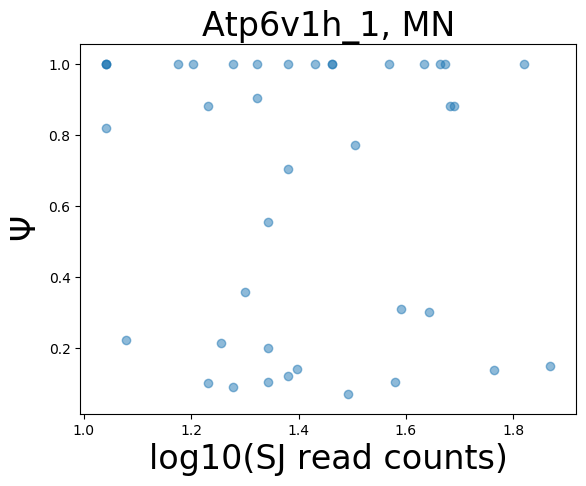

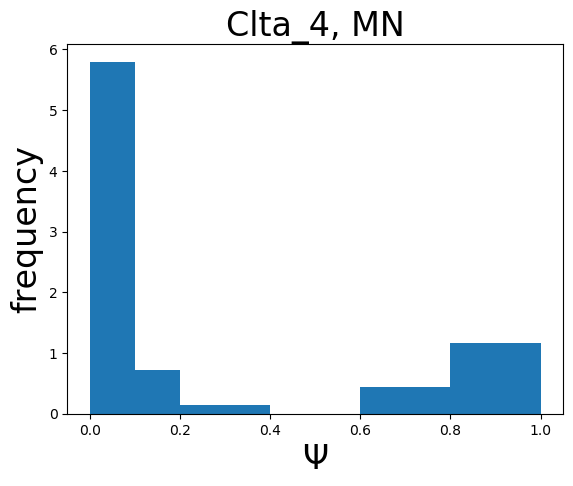

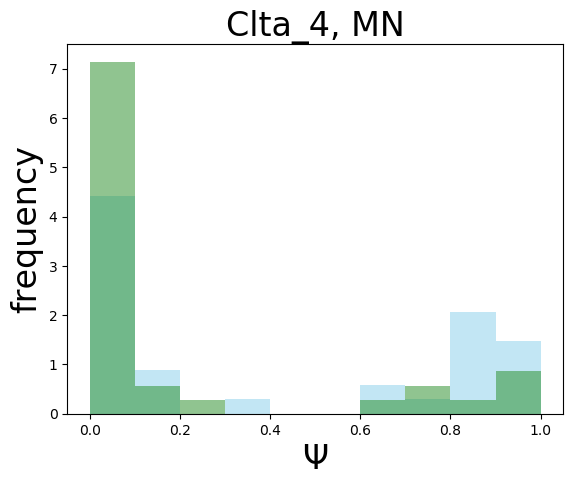

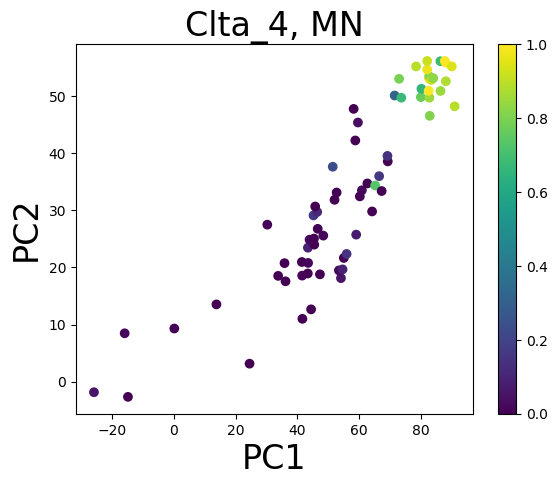

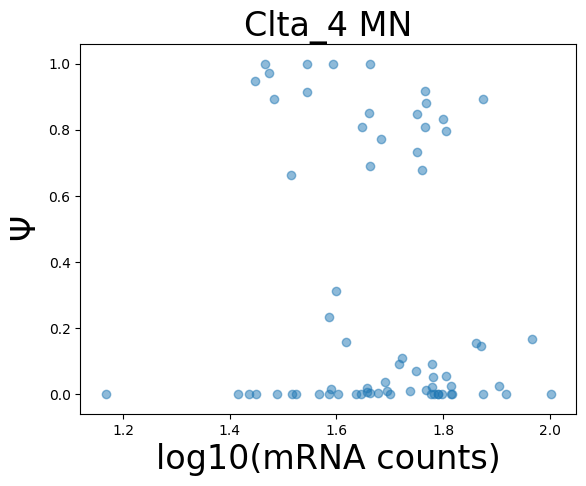

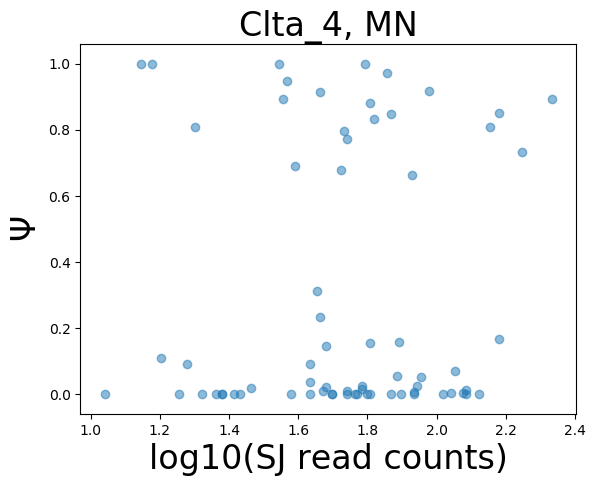

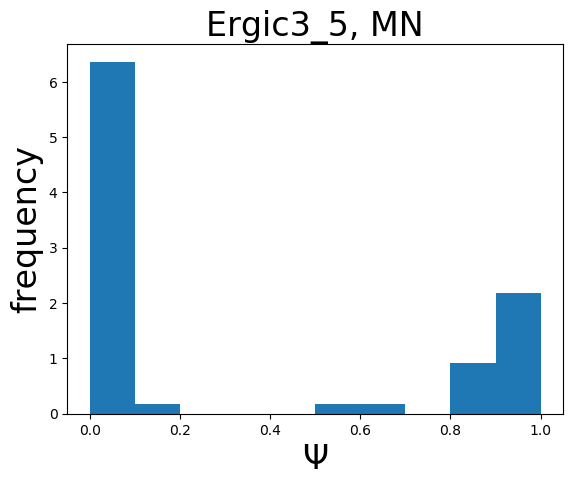

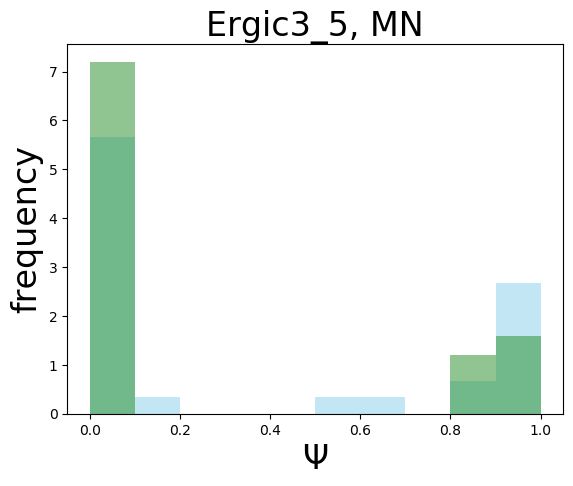

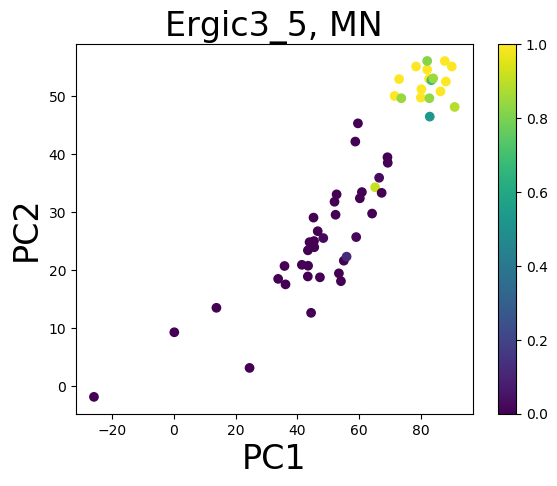

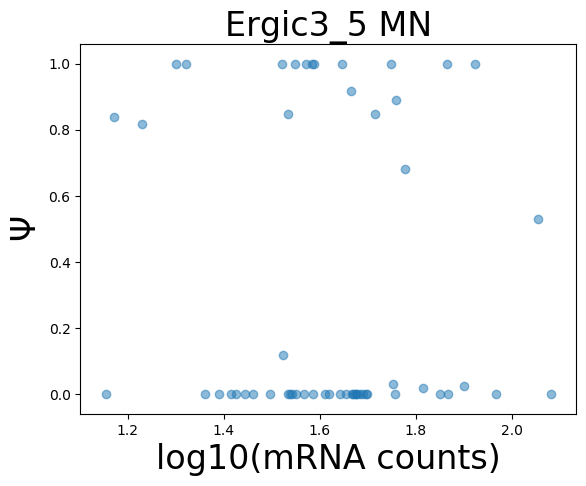

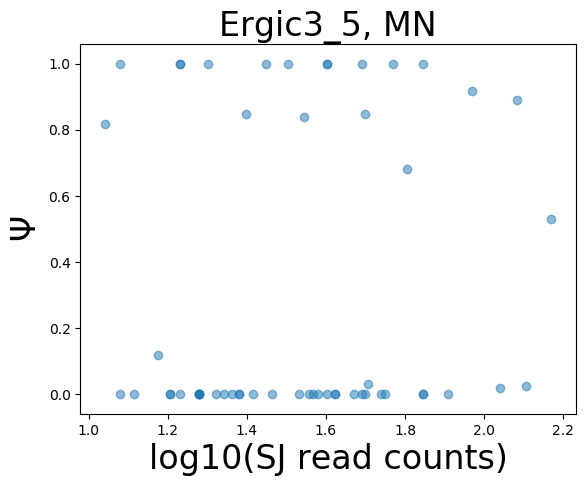

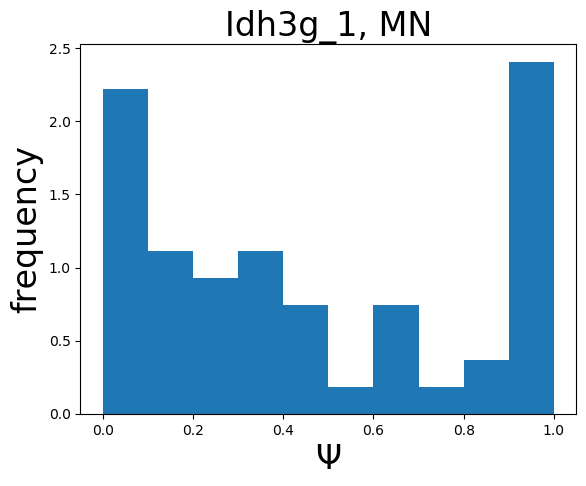

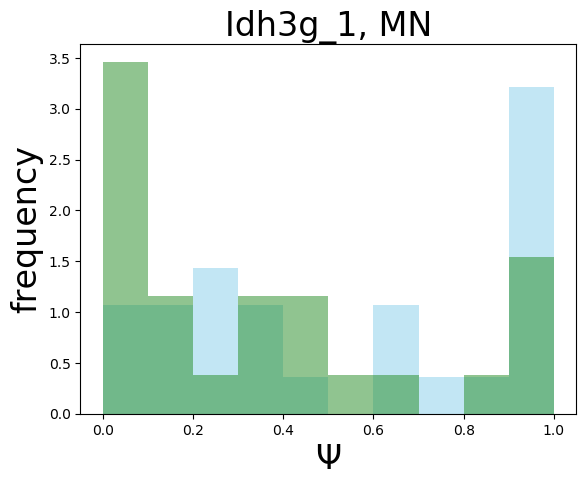

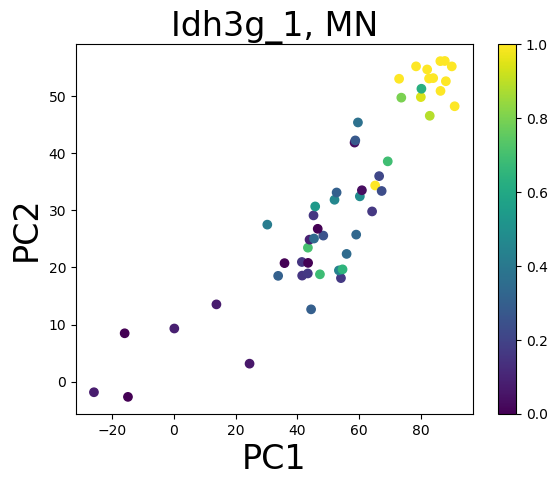

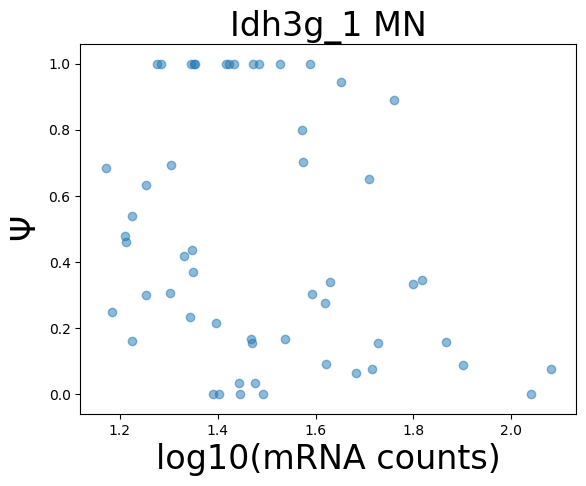

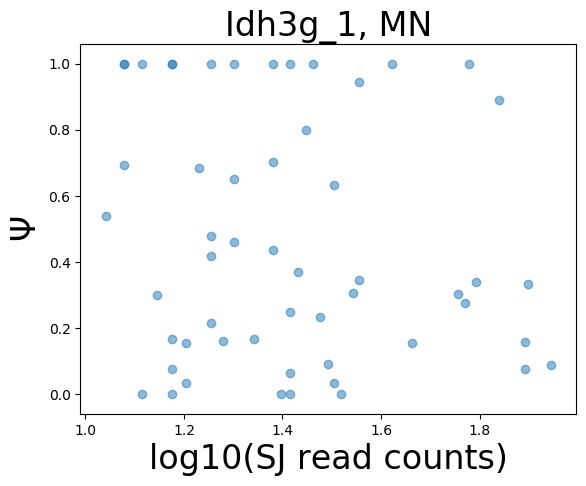

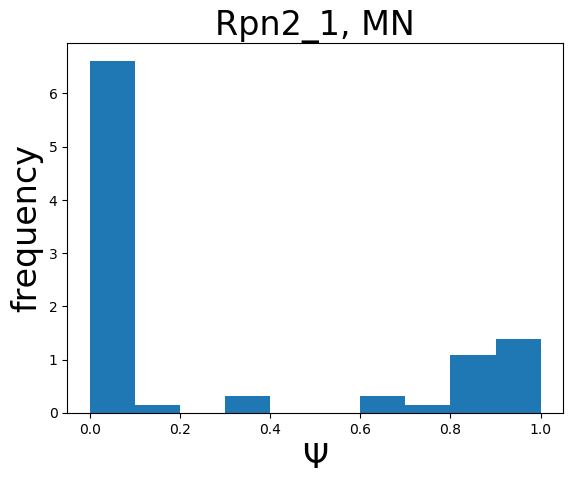

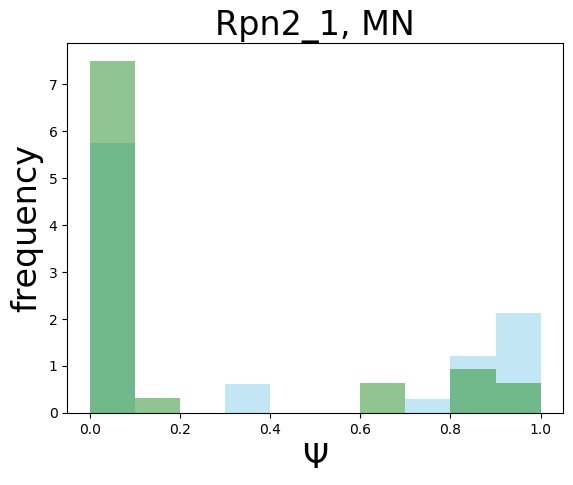

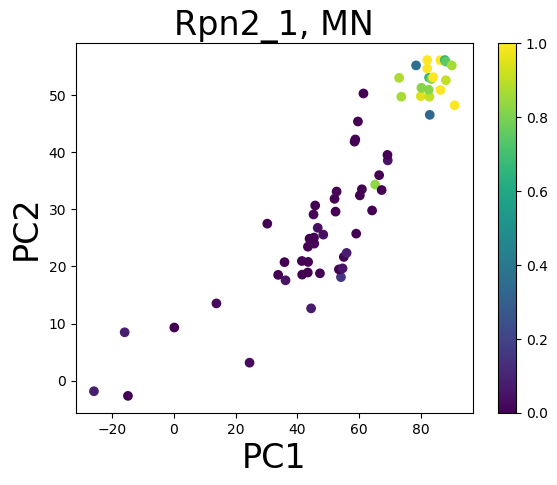

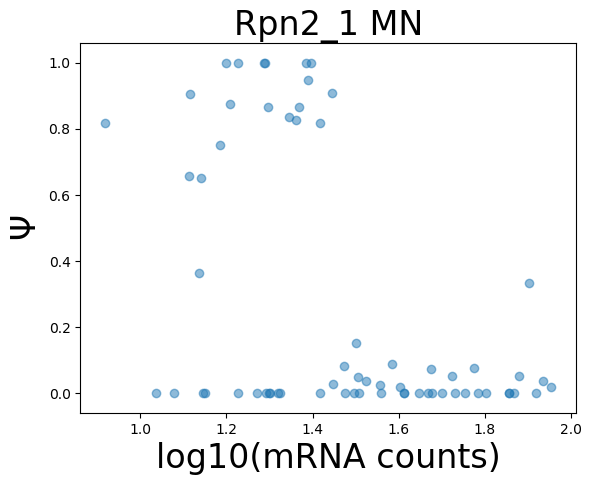

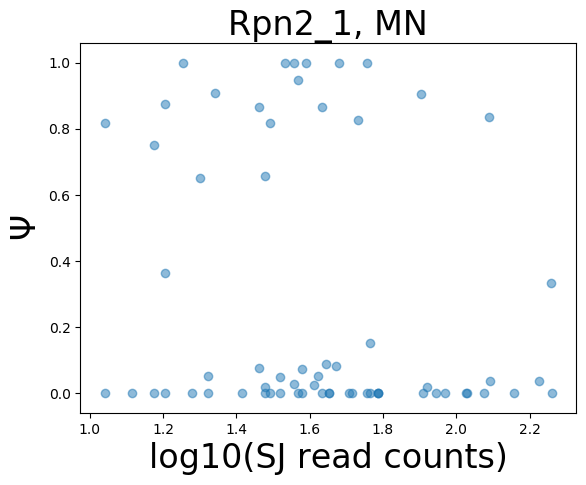

In [10]:
hartigan_multiple_test([chen_ES2i_filtered, chen_ES_filtered, chen_Epi_filtered, chen_MN_filtered], 
                 ['ES2i', 'ES', 'Epi', 'MN'], chen_pca, mrna_per_event_chen, 
                     chen_read_counts, quantile = 0.25, psi_lim = 0.25)

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


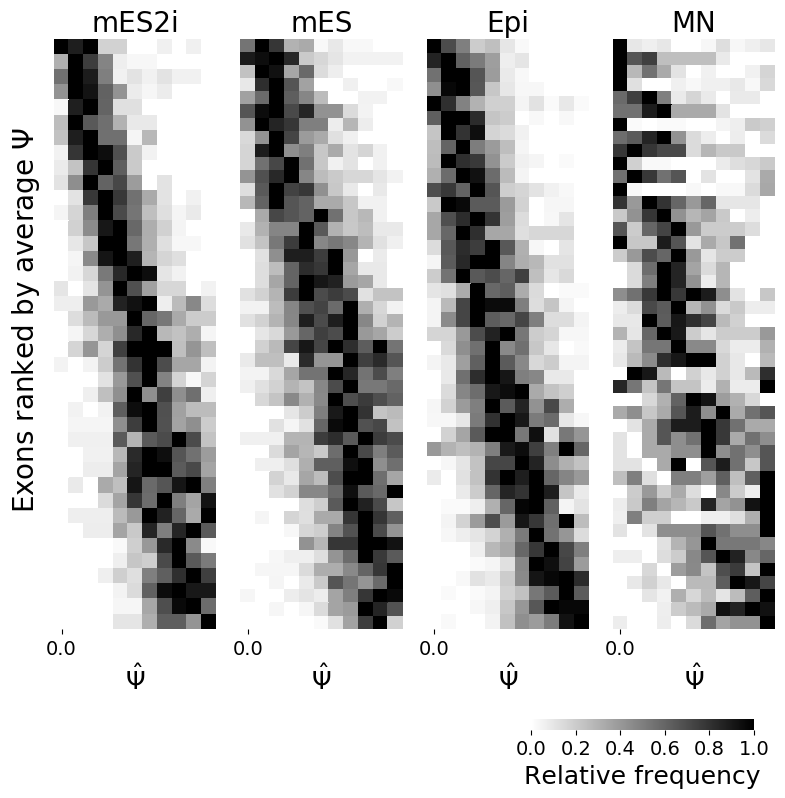

In [11]:
hist_list = [chen_ES2i_filtered[4], chen_ES_filtered[4], chen_Epi_filtered[4], chen_MN_filtered[4]]

dset_name_list = ['mES2i', 'mES', 'Epi', 'MN']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots3/figure1/', plot_name = 'PSI_distributions_filtered_unimodal',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


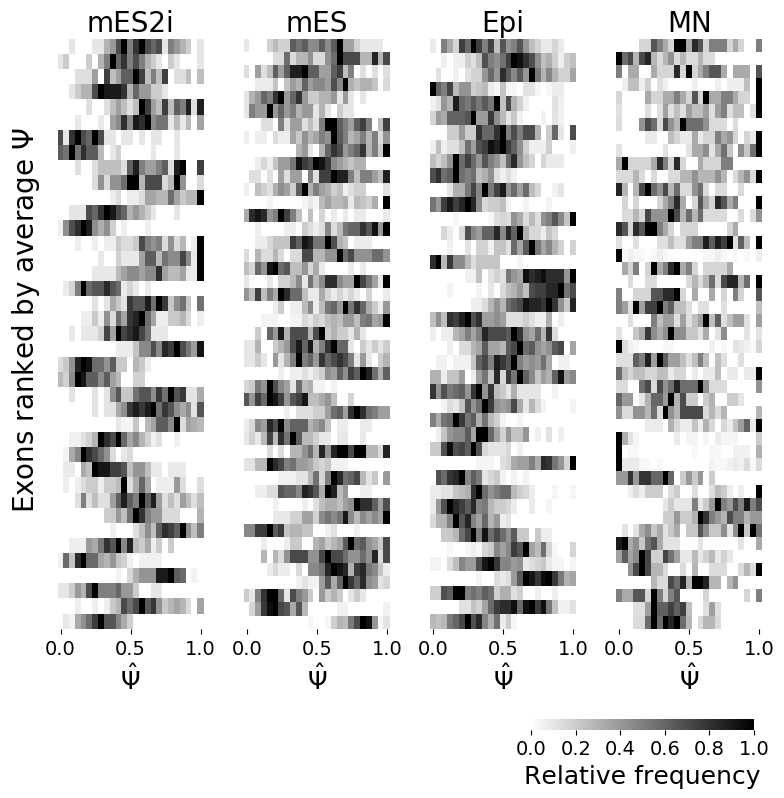

In [12]:
hist_list = [chen_ES2i_filtered[5], chen_ES_filtered[5], chen_Epi_filtered[5], chen_MN_filtered[5]]

dset_name_list = ['mES2i', 'mES', 'Epi', 'MN']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots3/figure1/', plot_name = 'PSI_distributions_filtered_unimodal',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

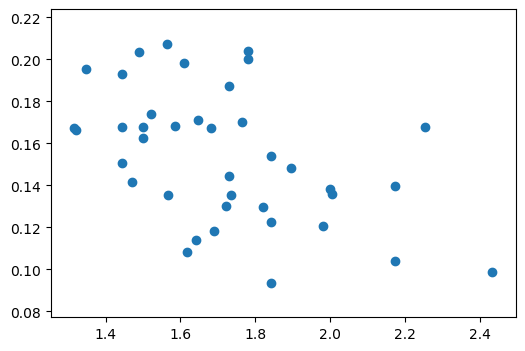

In [13]:
figsize(6,4)
plt.scatter(np.log10(mrna_per_event_chen.loc[chen_ES2i_filtered[5].index, chen_ES2i].mean(axis=1)),
            chen_ES2i_filtered[0].loc[chen_ES2i_filtered[5].index].std(axis=1))
plt.show()

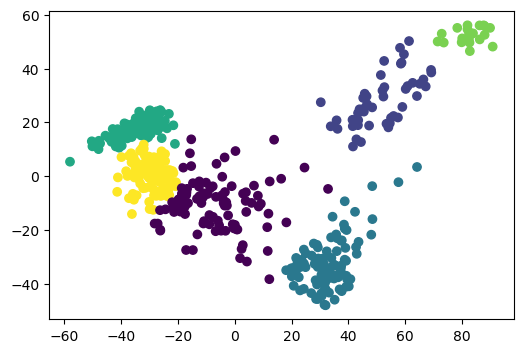

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


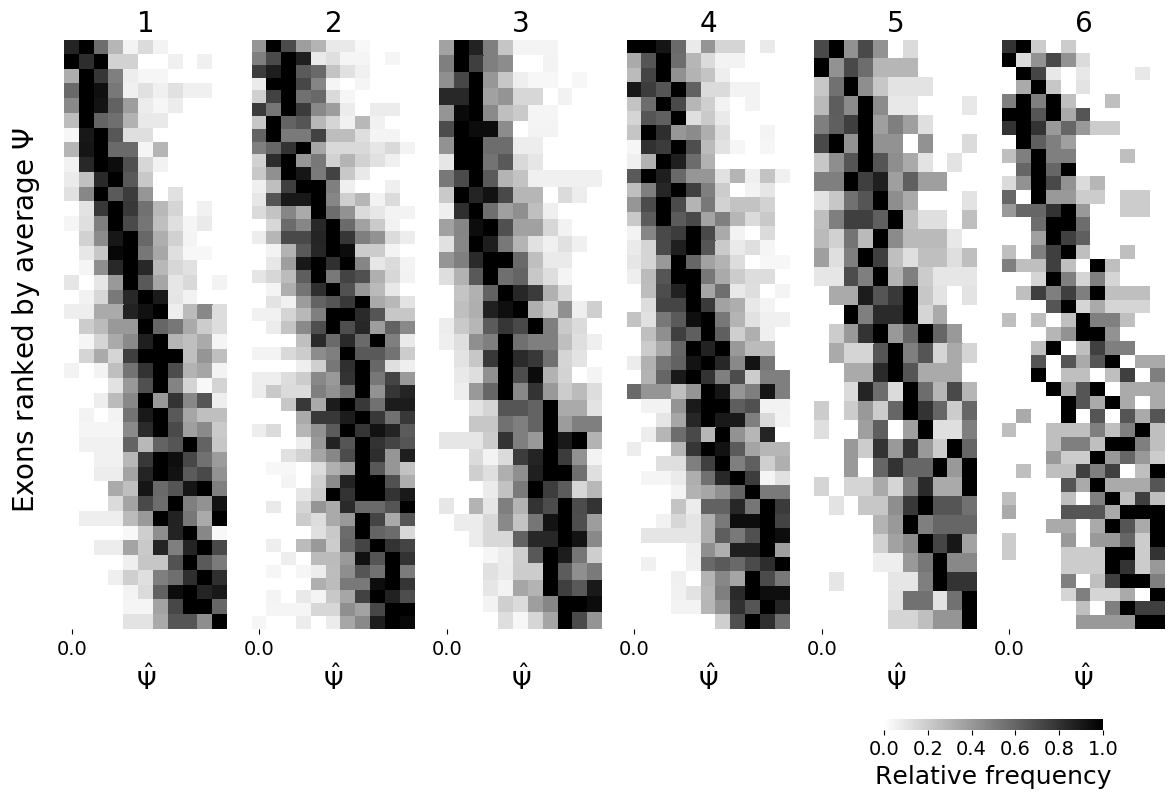

In [14]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=6)
ac_clusters = ac.fit_predict(chen_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(chen_pca.PC1, chen_pca.PC2, c=ac_clusters)
plt.show()

chen_pca_clust = chen_pca.copy()
chen_pca_clust['AC'] = ac_clusters

chen_clust_filter = []
for cluster in chen_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = chen_pca_clust.index[chen_pca_clust.AC == cluster]
    
    chen_filter = process_subpop(clust_subpop, chen_PSI, chen_mrna_counts, mrna_per_event_chen, 
                                 chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.2, 10, 10, cell_min=0.5)
    
    chen_clust_filter.append(chen_filter)
    
    
hist_list = [x[4] for x in chen_clust_filter]

dset_name_list = ['1', '2', '3', '4', '5', '6']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_clusters',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


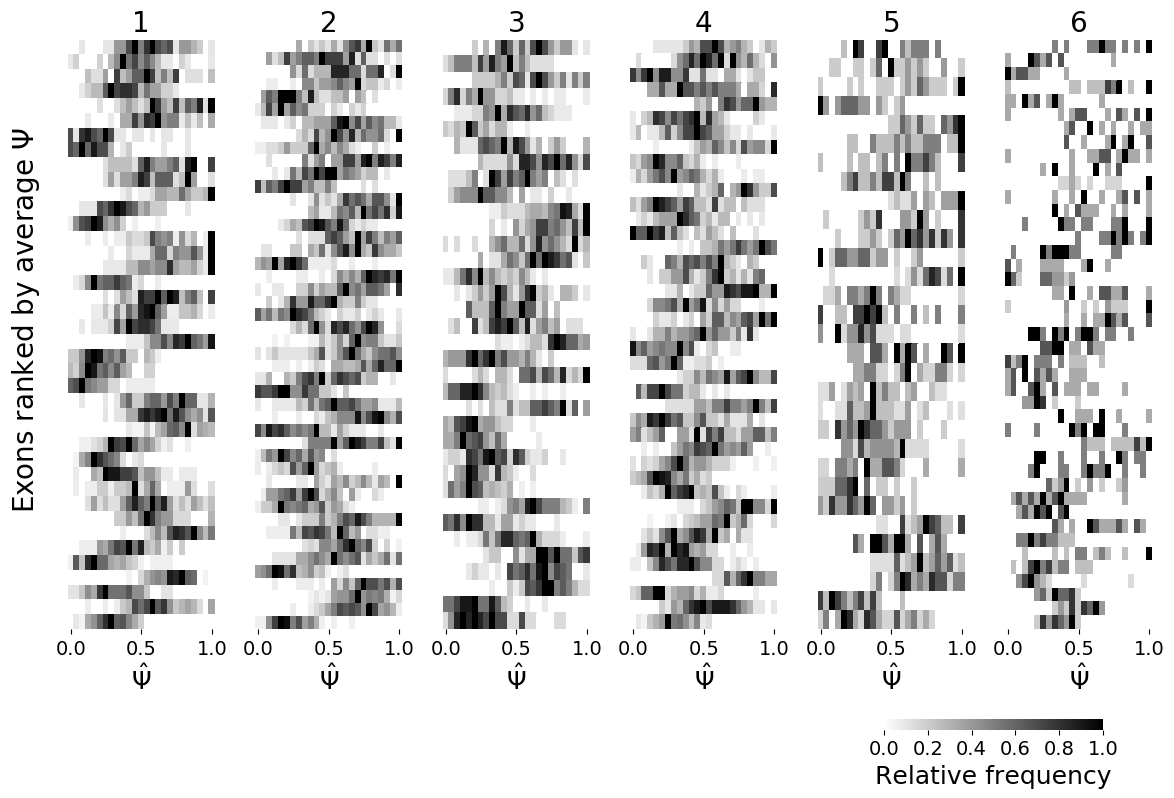

In [15]:

hist_list = [x[5] for x in chen_clust_filter]

dset_name_list = ['1', '2', '3', '4', '5', '6']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_clusters',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

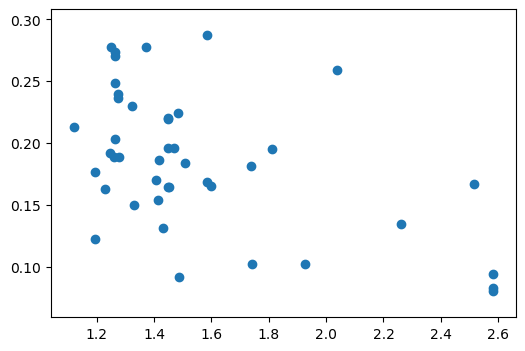

In [16]:
figsize(6,4)
plt.scatter(np.log10(mrna_per_event_chen.loc[chen_clust_filter[5][5].index, chen_clust_filter[5][0].columns].mean(axis=1)),
            chen_clust_filter[5][0].loc[chen_clust_filter[5][5].index].std(axis=1))
plt.show()

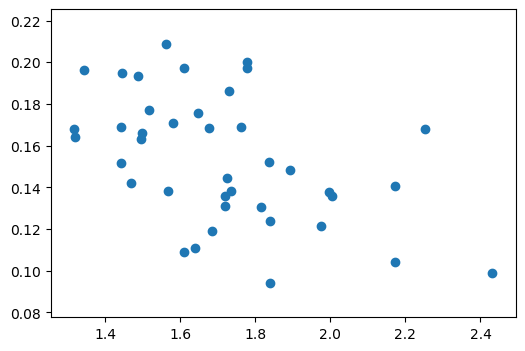

In [17]:
figsize(6,4)
plt.scatter(np.log10(mrna_per_event_chen.loc[chen_clust_filter[0][5].index, chen_clust_filter[0][0].columns].mean(axis=1)),
            chen_clust_filter[0][0].loc[chen_clust_filter[0][5].index].std(axis=1))
plt.show()

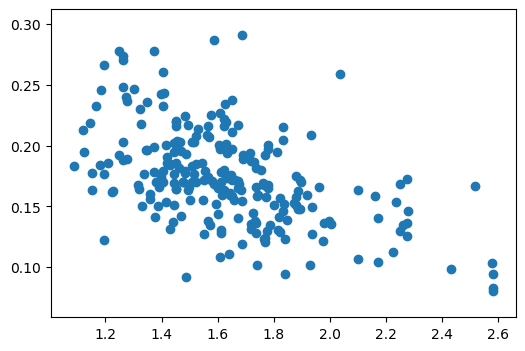

In [18]:
x_axis = []
y_axis = []

for i in range(6):
    x_axis.extend(list(np.log10(mrna_per_event_chen.loc[chen_clust_filter[i][5].index, 
                                               chen_clust_filter[i][0].columns].mean(axis=1))))
    y_axis.extend(list(chen_clust_filter[i][0].loc[chen_clust_filter[i][5].index].std(axis=1)))
    
    
figsize(6,4)
plt.scatter(x_axis,y_axis)
plt.show()

In [19]:
mrna_per_event_song.head()

SRR4047452  SRR4047453  SRR4047431  SRR4047415  SRR4047430  \
AAAS_2     0.045408    4.647694    4.758740    0.000000    0.206274   
AAAS_3     0.045408    4.647694    4.758740    0.000000    0.206274   
AAK1_3     0.156538    0.589900    0.738929    1.052202    0.817455   
AAMDC_2   11.583803    6.451262    6.132427    1.282814    4.517283   
AAMDC_3   11.583803    6.451262    6.132427    1.282814    4.517283   

         SRR4047450  SRR4047404  SRR4047426  SRR4047425  SRR4047424  \
AAAS_2    23.529349    1.132621    6.790138    2.983489    0.020093   
AAAS_3    23.529349    1.132621    6.790138    2.983489    0.020093   
AAK1_3     1.024863    1.980799    0.597770    0.879097    0.099506   
AAMDC_2    3.898731    0.054700   20.974788    6.807608    8.025540   
AAMDC_3    3.898731    0.054700   20.974788    6.807608    8.025540   

            ...      SRR4047353  SRR4047299  SRR4047279  SRR4047283  \
AAAS_2      ...        0.000000    0.000000    0.000000    0.000000   
AAAS_3      ...        0.000000    0.000000    0.000000    0.000000   
AAK1_3      ...        6.138326    0.131683    0.768248    1.290005   
AAMDC_2     ...        0.000000    0.000000    2.126343    0.000000   
AAMDC_3     ...        0.000000    0.000000    2.126343    0.000000   

         SRR4047290  SRR4047300  SRR4047280  SRR4047311  SRR4047285  \
AAAS_2     0.000000    0.005466   13.395454    0.000000    2.174500   
AAAS_3     0.000000    0.005466   13.395454    0.000000    2.174500   
AAK1_3     1.703907    1.990317    4.518176    3.733548    2.337588   
AAMDC_2    0.000000    0.041623    0.000000    0.000000    0.000000   
AAMDC_3    0.000000    0.041623    0.000000    0.000000    0.000000   

         SRR4047338  
AAAS_2    10.865331  
AAAS_3    10.865331  
AAK1_3     8.255082  
AAMDC_2    2.772545  
AAMDC_3    2.772545  

[5 rows x 202 columns]

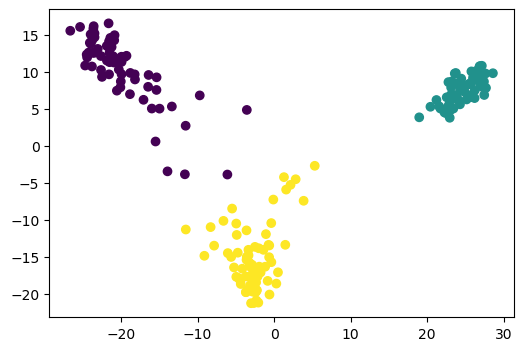

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


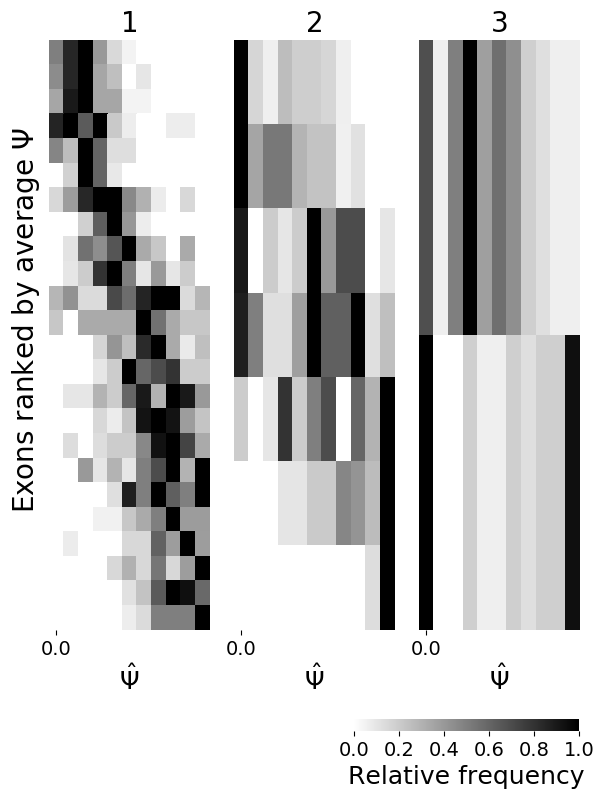

In [20]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
ac_clusters = ac.fit_predict(song_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(song_pca.PC1, song_pca.PC2, c=ac_clusters)
plt.show()

song_pca_clust = song_pca.copy()
song_pca_clust['AC'] = ac_clusters

song_clust_filter = []
for cluster in song_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = song_pca_clust.index[song_pca_clust.AC == cluster]
    
    song_filter = process_subpop(clust_subpop, song_PSI, song_mrna_counts, mrna_per_event_song, 
                                 song_read_counts, song_coverage_tab['SJ_coverage'], 0.2, 20, 10, cell_min=0.5)
    
    song_clust_filter.append(song_filter)
    
    
hist_list = [x[4] for x in song_clust_filter]

dset_name_list = ['1', '2', '3']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_clusters_song',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

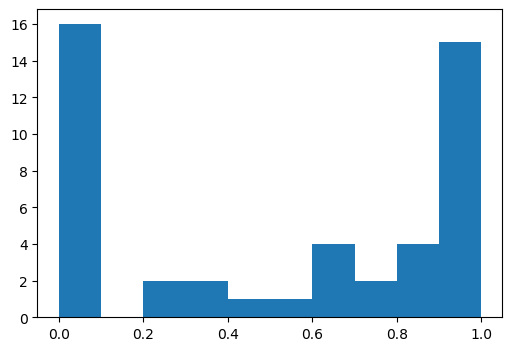

In [21]:
figsize(6,4)
plt.hist(song_clust_filter[2][0].loc['AKAP9_3'].dropna())
plt.show()

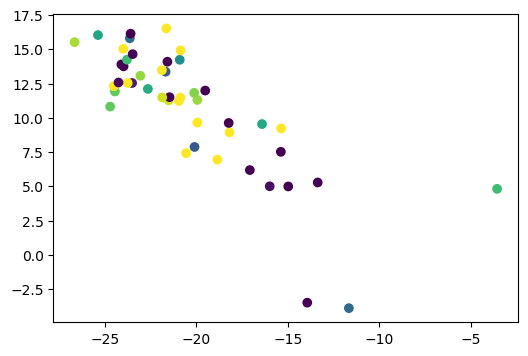

In [22]:
plt.scatter(song_pca.loc[song_clust_filter[2][0].columns, 'PC1'], song_pca.loc[song_clust_filter[2][0].columns, 'PC2'],
           c = song_clust_filter[2][0].loc['AKAP9_3'], cmap=cm.viridis)

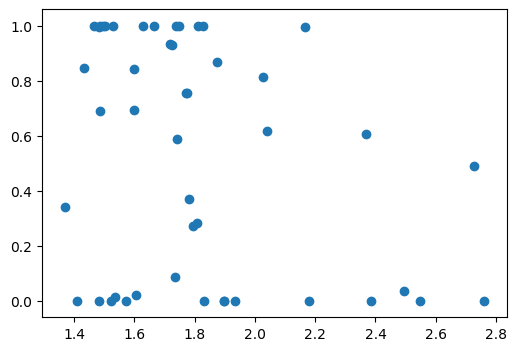

In [23]:
plt.scatter(np.log10(mrna_per_event_song.loc['AKAP9_3', song_clust_filter[2][0].columns]),
           song_clust_filter[2][0].loc['AKAP9_3'])
plt.show()

load_data.py:1: RuntimeWarning: divide by zero encountered in log10
  import numpy as np


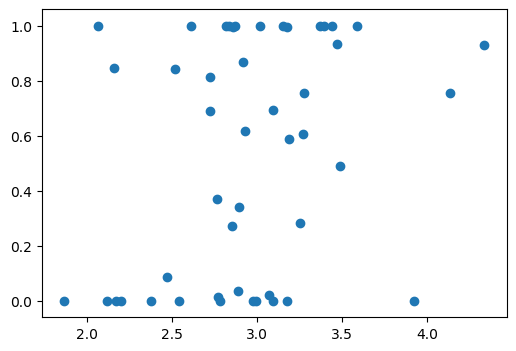

In [24]:
plt.scatter(np.log10(song_read_counts.loc['AKAP9_3', song_clust_filter[2][0].columns]),
           song_clust_filter[2][0].loc['AKAP9_3'])
plt.show()

In [25]:
song_clust_filter[2][0]

SRR4047291  SRR4047371  SRR4047393  SRR4047333  SRR4047342  \
AKAP9_3         NaN    0.342513     0.00000    0.688889         NaN   
MYL6_1     0.538269    0.315055     0.47096    0.302261    0.307319   

         SRR4047389  SRR4047292  SRR4047329  SRR4047313  SRR4047326  \
AKAP9_3         NaN         NaN         0.0    0.000331    0.034946   
MYL6_1     0.428301    0.282788         0.0    0.029676    0.056401   

            ...      SRR4047353  SRR4047299  SRR4047279  SRR4047283  \
AKAP9_3     ...         0.00000    0.695238    0.013722    1.000000   
MYL6_1      ...         0.28058    0.533878    0.408915    0.229076   

         SRR4047290  SRR4047300  SRR4047280  SRR4047311  SRR4047285  \
AKAP9_3         NaN    1.000000    0.368794    0.000000    0.588205   
MYL6_1     0.484897    0.223127    0.219727    0.330218    0.673887   

         SRR4047338  
AKAP9_3    0.869074  
MYL6_1     0.517670  

[2 rows x 67 columns]

In [26]:
mrna_per_event_song

SRR4047452  SRR4047453  SRR4047431  SRR4047415  SRR4047430  \
AAAS_2           0.045408    4.647694    4.758740    0.000000    0.206274   
AAAS_3           0.045408    4.647694    4.758740    0.000000    0.206274   
AAK1_3           0.156538    0.589900    0.738929    1.052202    0.817455   
AAMDC_2         11.583803    6.451262    6.132427    1.282814    4.517283   
AAMDC_3         11.583803    6.451262    6.132427    1.282814    4.517283   
AAMDC_4         11.583803    6.451262    6.132427    1.282814    4.517283   
AAMDC_5         11.583803    6.451262    6.132427    1.282814    4.517283   
AARSD1_1        21.168461   23.489669   25.476004    4.614685    0.721412   
AARSD1_11       21.168461   23.489669   25.476004    4.614685    0.721412   
AARSD1_5        21.168461   23.489669   25.476004    4.614685    0.721412   
AARSD1_7        21.168461   23.489669   25.476004    4.614685    0.721412   
AARS_3           5.765613    4.109540    3.534980    7.297156    3.626705   
AASDHPPT_1       2.680263    4.961930    5.188078    0.000000    3.736936   
AASDH_1          0.170877    1.399953    1.332798    2.516430    0.172440   
AASDH_2          0.170877    1.399953    1.332798    2.516430    0.172440   
AASDH_4          0.170877    1.399953    1.332798    2.516430    0.172440   
AASDH_7          0.170877    1.399953    1.332798    2.516430    0.172440   
AASS_1          87.885860   90.514301  100.710436   32.672390   50.093930   
AASS_10         87.885860   90.514301  100.710436   32.672390   50.093930   
AASS_11         87.885860   90.514301  100.710436   32.672390   50.093930   
AASS_12         87.885860   90.514301  100.710436   32.672390   50.093930   
AASS_2          87.885860   90.514301  100.710436   32.672390   50.093930   
AASS_4          87.885860   90.514301  100.710436   32.672390   50.093930   
AASS_5          87.885860   90.514301  100.710436   32.672390   50.093930   
AASS_6          87.885860   90.514301  100.710436   32.672390   50.093930   
AASS_7          87.885860   90.514301  100.710436   32.672390   50.093930   
AASS_8          87.885860   90.514301  100.710436   32.672390   50.093930   
AASS_9          87.885860   90.514301  100.710436   32.672390   50.093930   
ABAT_2           0.076477    0.000000    0.000000    0.000000    0.000000   
ABAT_4           0.076477    0.000000    0.000000    0.000000    0.000000   
...                   ...         ...         ...         ...         ...   
ZNF91_4          1.798393    0.000000    0.000000    0.368363    0.942965   
ZNF92_1          0.000000    0.000000    0.011683    0.036898    0.647197   
ZNF92_3          0.000000    0.000000    0.011683    0.036898    0.647197   
ZNF93_1          6.451511   17.124022   19.606437    8.509863    7.947537   
ZNHIT1_1         9.074417    2.538356    2.327772    5.301599    3.504469   
ZNHIT1_2         9.074417    2.538356    2.327772    5.301599    3.504469   
ZNHIT1_3         9.074417    2.538356    2.327772    5.301599    3.504469   
ZNHIT3_1        26.448926   15.096536   15.959497   13.650342   19.243473   
ZRANB2-AS2_2     0.000000    0.000000    0.000000    0.000000    0.000000   
ZRANB2_1         7.994186   10.388630   14.123372    8.377031   17.689327   
ZRANB2_2         7.994186   10.388630   14.123372    8.377031   17.689327   
ZRANB3_2         0.000000    5.231948    6.786656    0.000000    1.984156   
ZSCAN10_1        1.234379    0.056450    0.036995    0.650016    5.748376   
ZSCAN10_3        1.234379    0.056450    0.036995    0.650016    5.748376   
ZSCAN16-AS1_1    0.000000    0.000000    0.000000    0.000000    0.018554   
ZSCAN21_1       12.648499    1.785693    1.521667    0.000000    0.098226   
ZSCAN23_2        3.705526    0.000000    0.000000    0.000000    0.000000   
ZSCAN23_4        3.705526    0.000000    0.000000    0.000000    0.000000   
ZSCAN31_4        0.000000    0.000000    0.000000    0.000000    0.000000   
ZSCAN32_7        0.000000    0.000000    0.000000    0.000000    2.790697   
ZSCAN9_2   

In [27]:
process_subpop(song_iPSC, song_PSI, song_mrna_counts, mrna_per_event_song, 
                                 song_read_counts, song_coverage_tab['SJ_coverage'], 0.2, 6, 10, cell_min=0.5)

(            SRR4047452  SRR4047453  SRR4047431  SRR4047415  SRR4047430  \
 AASS_11       0.401368    0.239897    0.247613    0.537563    0.231095   
 ACP1_2        0.239199    0.497283    0.464115    0.321839    0.359281   
 ADSL_1        0.900841    0.728734    0.698469    1.000000    0.876663   
 AKR1A1_1      0.001018    0.190050    0.200000    0.223881    0.300971   
 AKR1A1_5      0.658581    0.670729    0.711741    0.983936    0.948148   
 ALDOA_1       0.879100    0.649082    0.667832    0.633205    0.628214   
 ANAPC11_3     0.968794         NaN         NaN    0.654971    0.722913   
 ANAPC11_6     0.383038    0.152381    0.159341    0.299233    0.826087   
 AZIN1_2            NaN    0.542127    0.547619    0.498433    0.249663   
 AZIN1_5            NaN    0.360390    0.368421    0.327731    0.113238   
 C1orf52_1     0.499339         NaN         NaN         NaN    0.581227   
 C8orf59_2          NaN    0.339041    0.354260    0.257329    0.358230   
 C8orf59_3          NaN  

In [28]:
[x for x in chen_mrna_counts.index if 'Srsf' in x]

['Srsf6',
 'Srsf1',
 'Srsf5',
 'Srsf7',
 'Srsf10',
 'Srsf4',
 'Srsf9',
 'Srsf2',
 'Srsf12',
 'Srsf11',
 'Srsf3']

Platr3_1


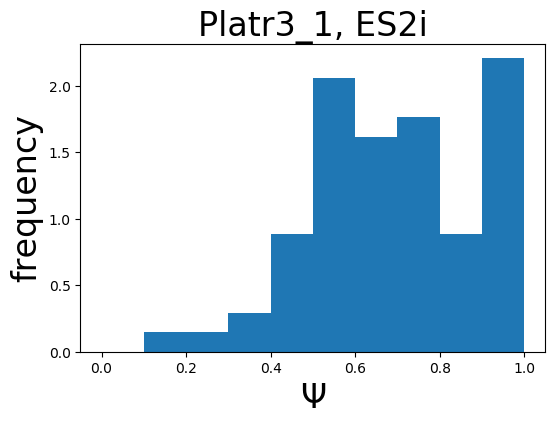

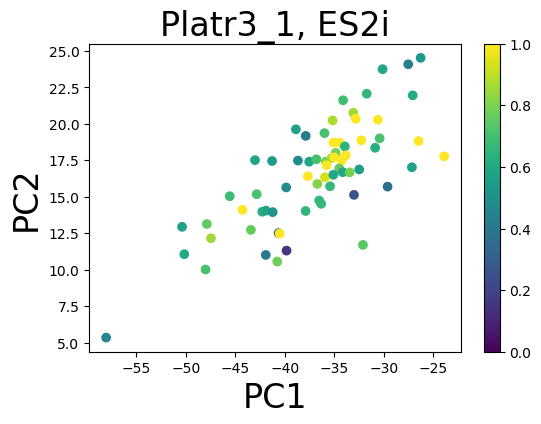

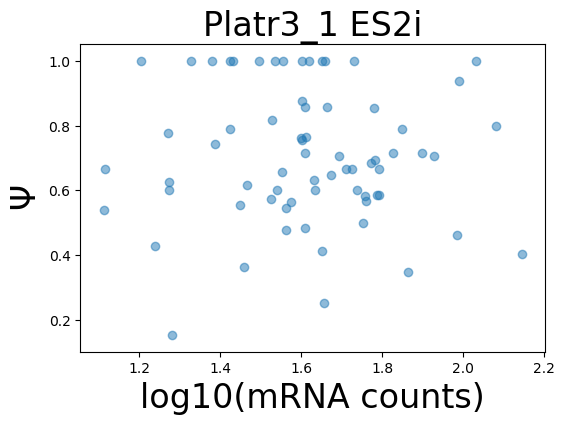

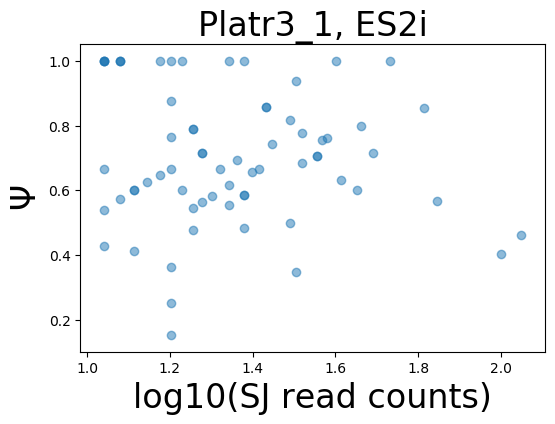

Rnaseh2b_1


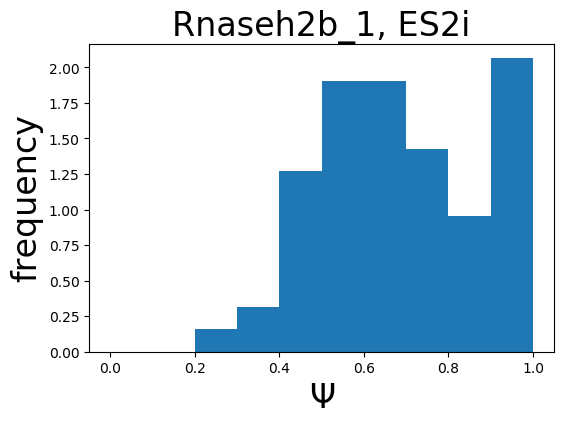

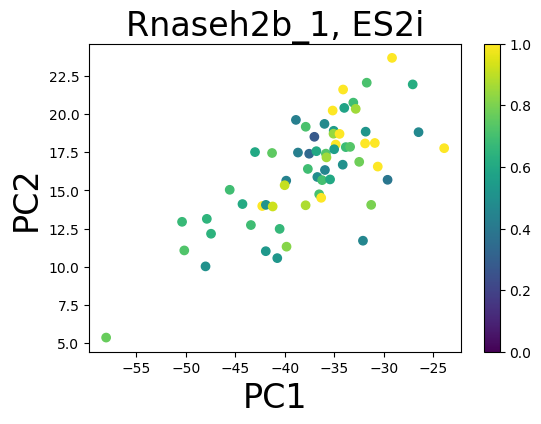

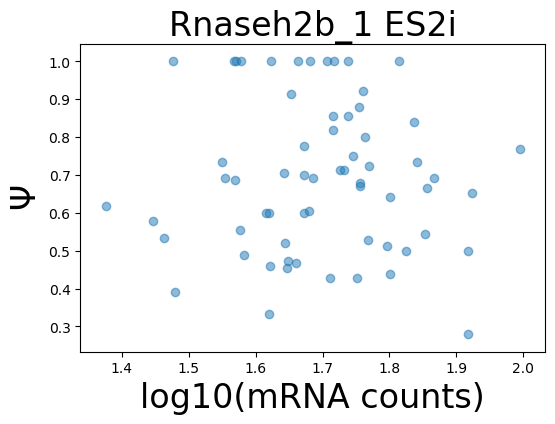

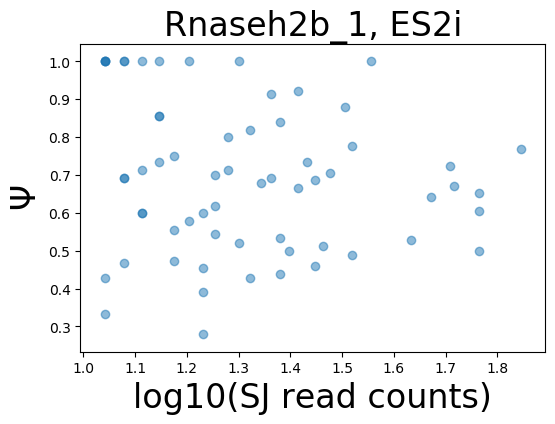

Dph3_1


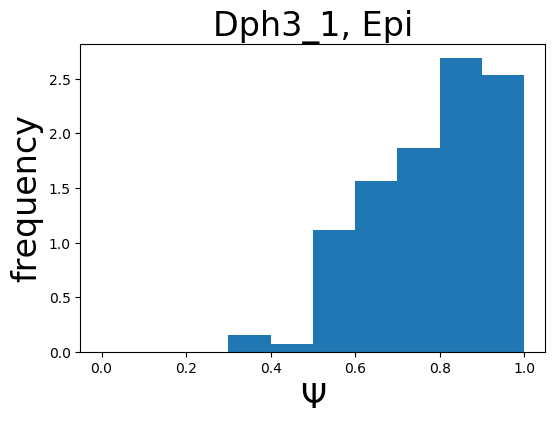

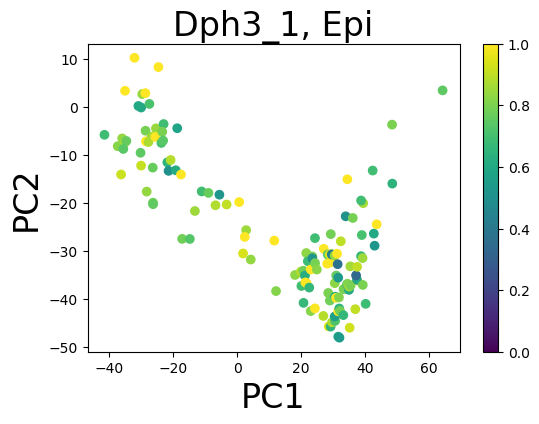

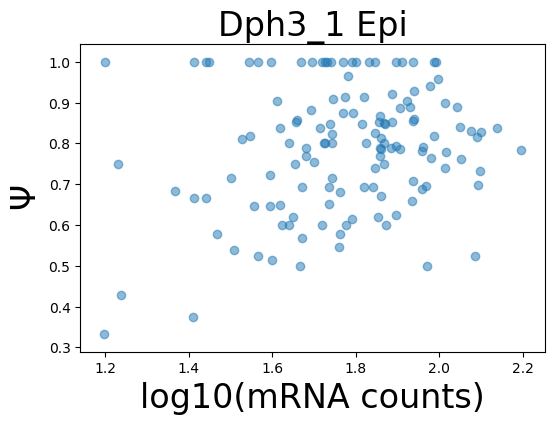

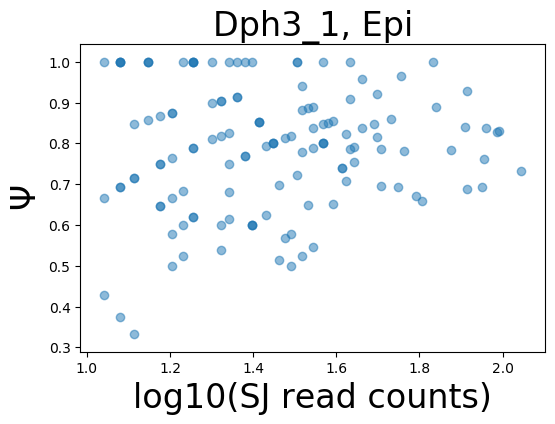

Psmg4_1


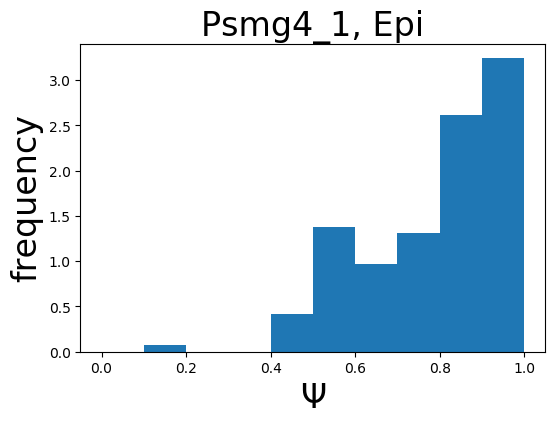

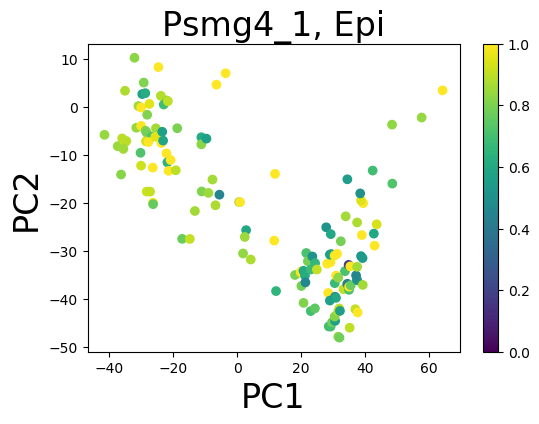

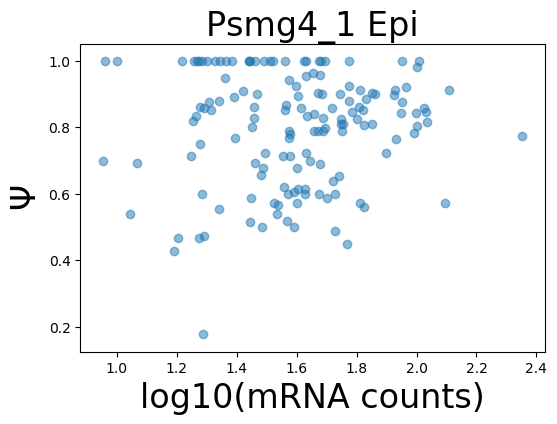

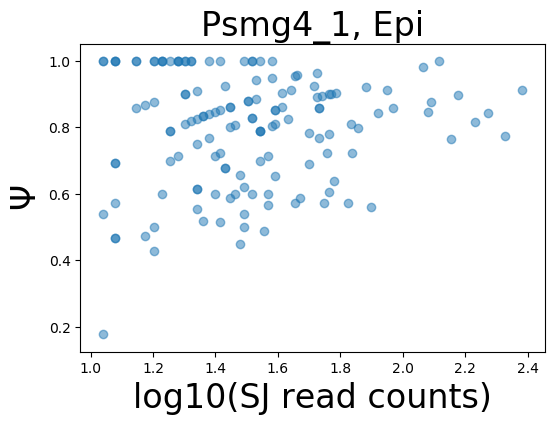

Tpd52l2_7


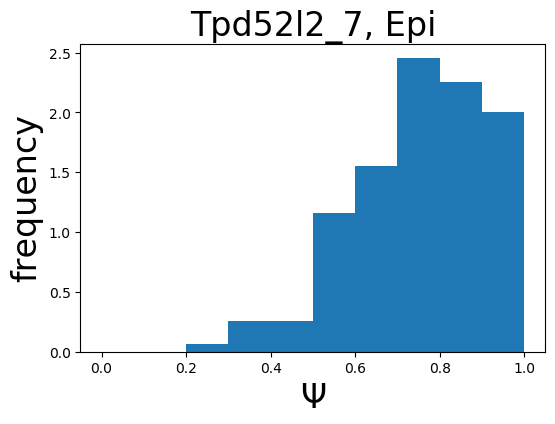

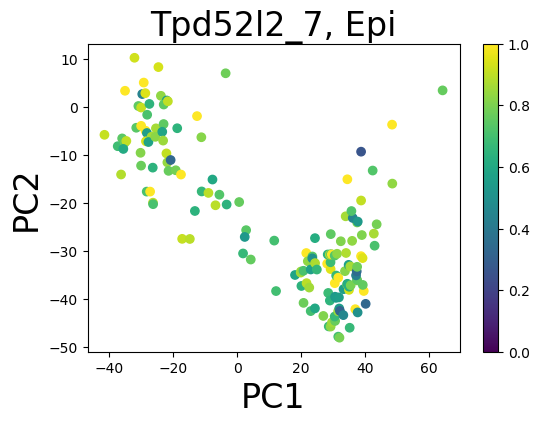

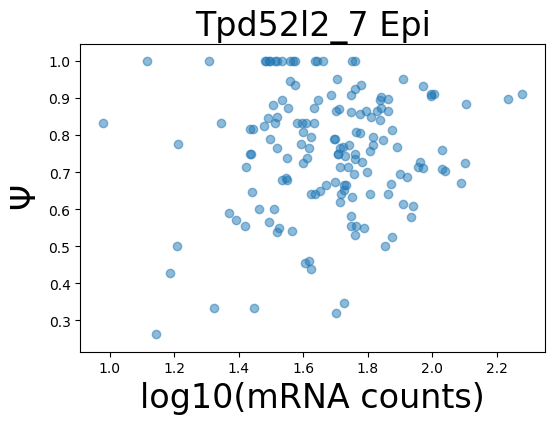

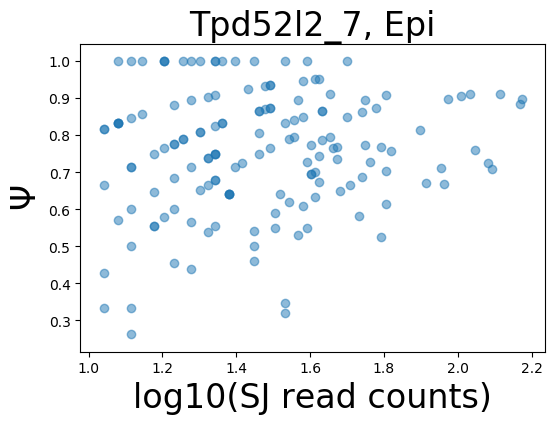

Atp6v1h_1


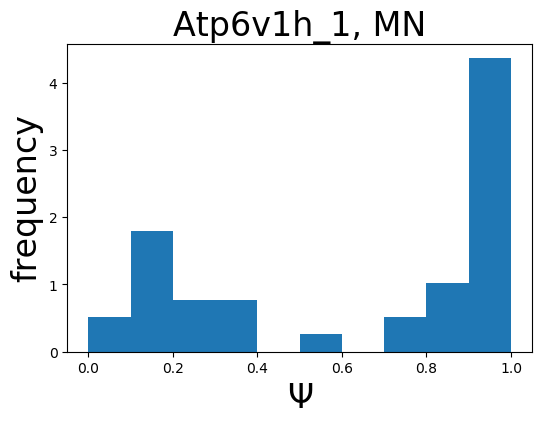

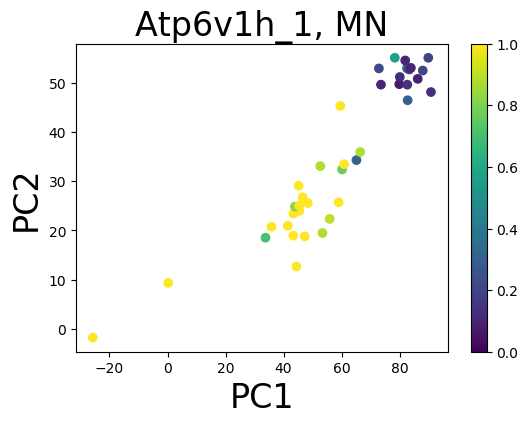

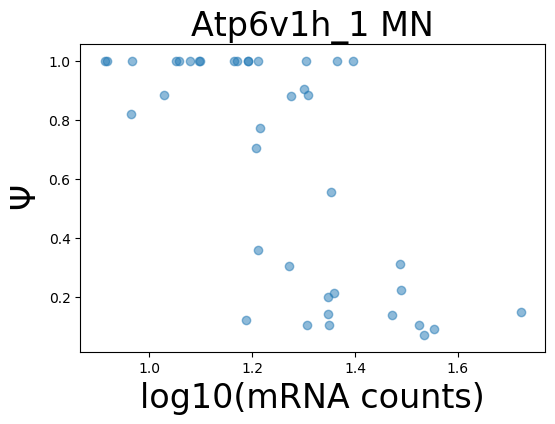

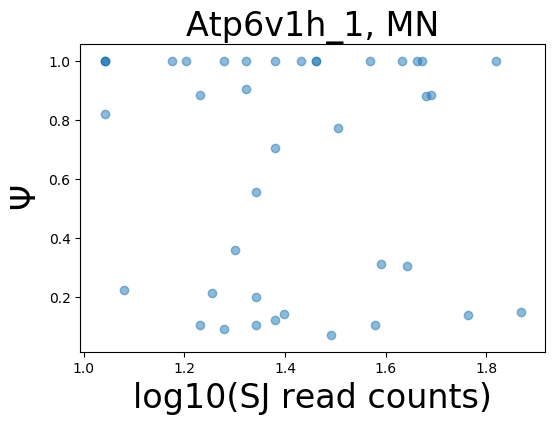

Clta_4


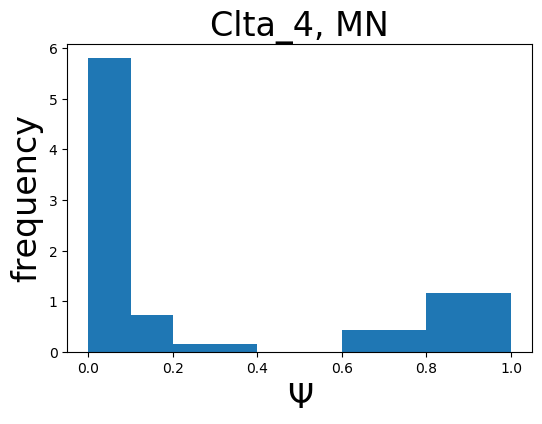

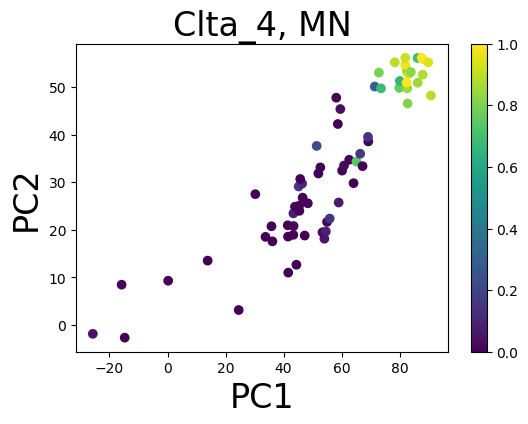

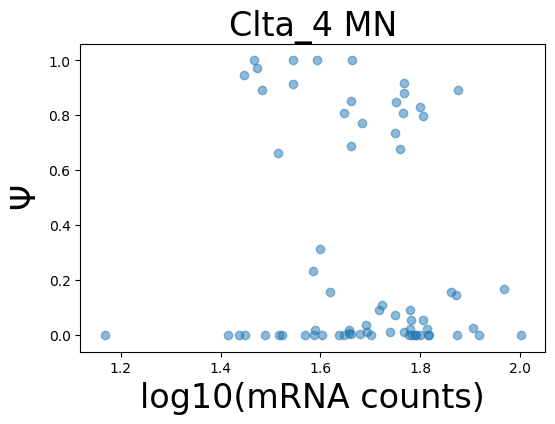

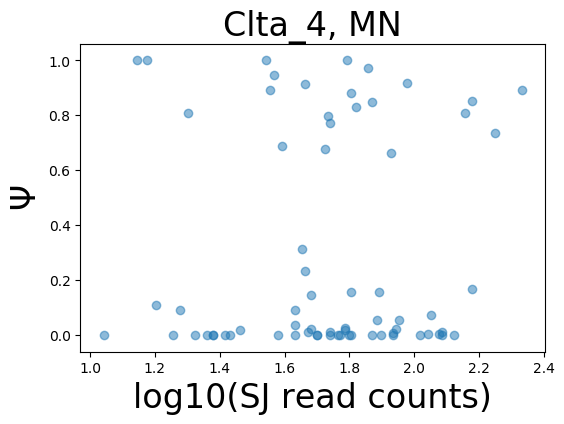

Ergic3_5


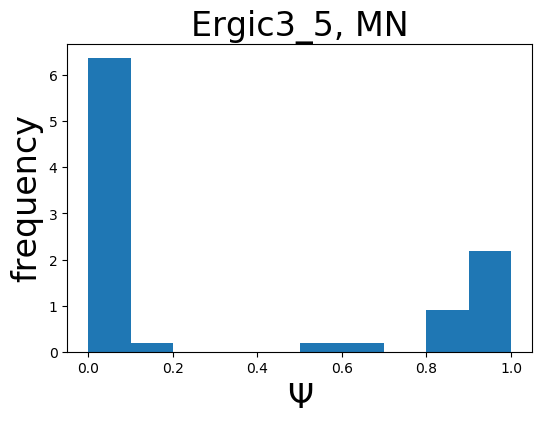

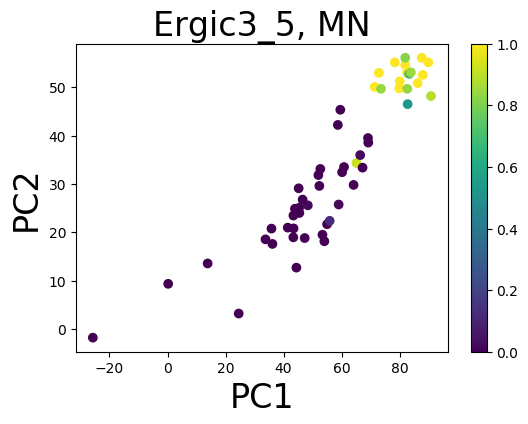

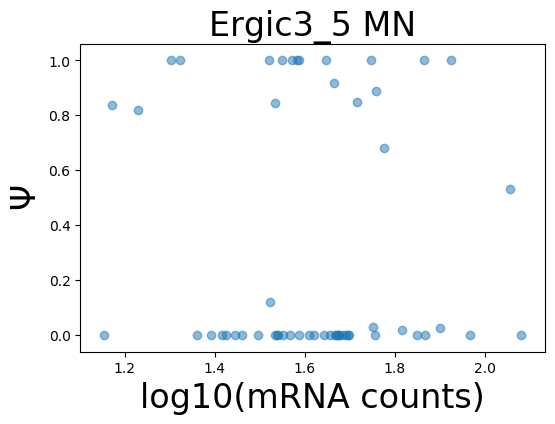

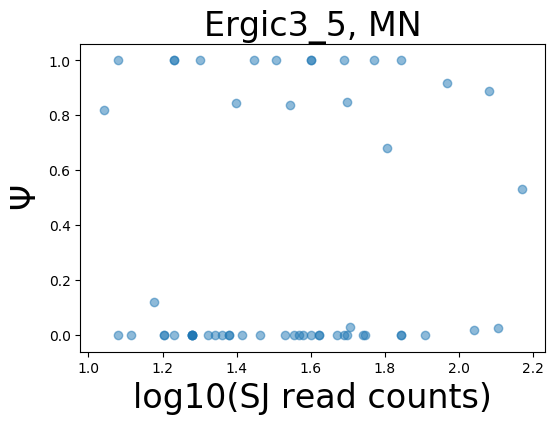

Idh3g_1


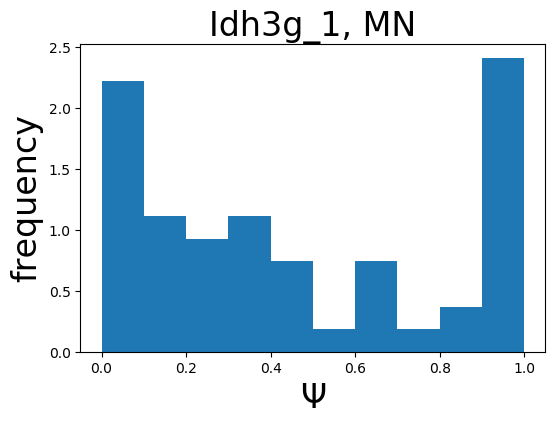

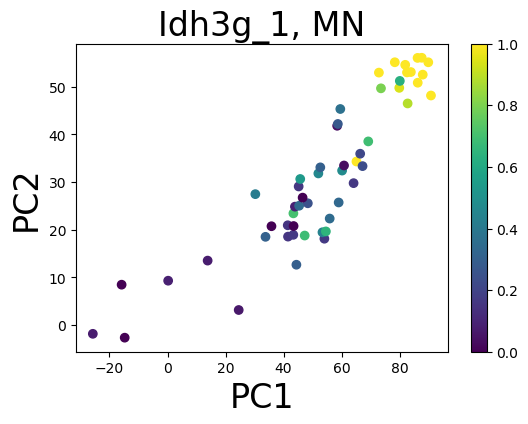

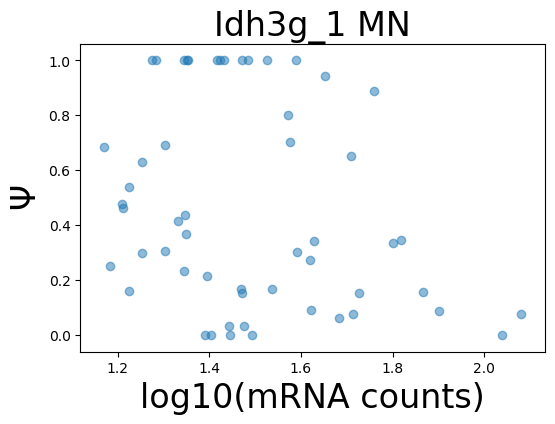

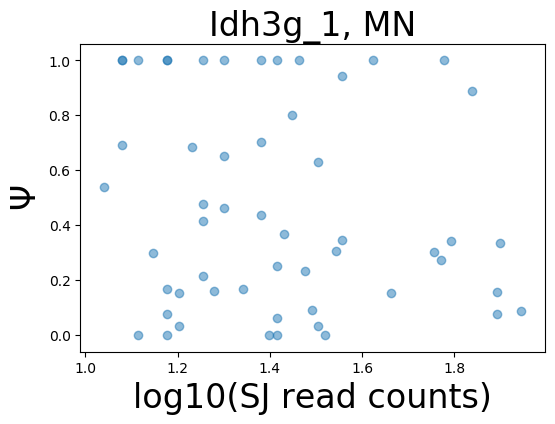

Rpn2_1


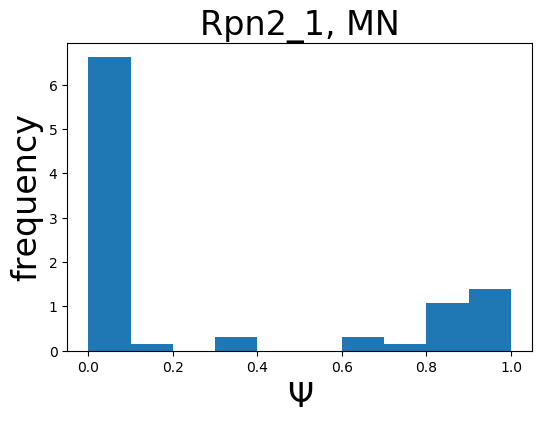

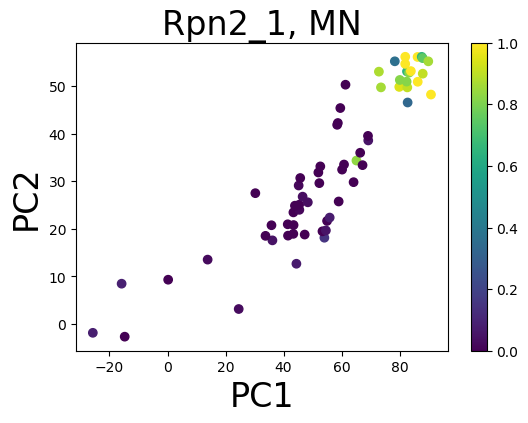

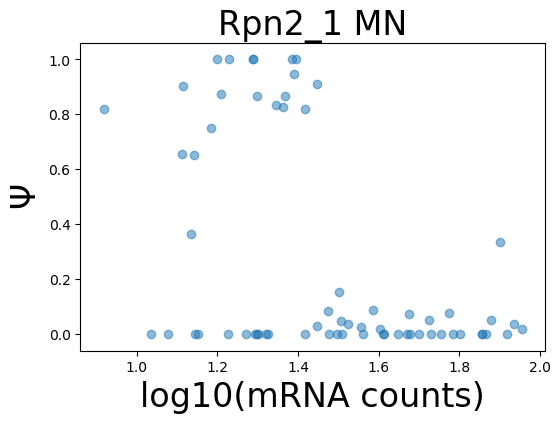

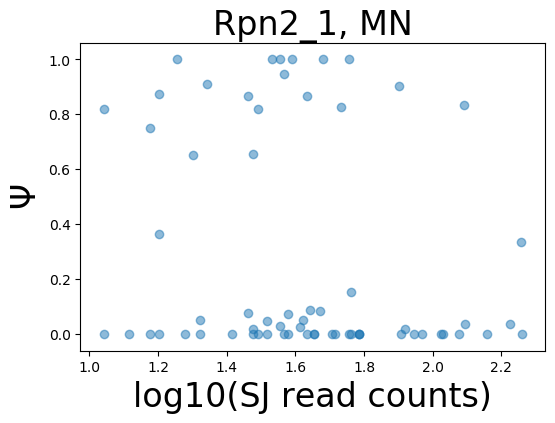

In [29]:
pvals = []

for subset in [chen_ES2i_filtered, chen_ES_filtered, chen_Epi_filtered, chen_MN_filtered]:

    for event in subset[0].index:

        ht = hartigan_test(subset[0].loc[event].dropna())
        pvals.append(ht[1])
        
        
bh_correction = multipletests(pvals, method='fdr_bh')
figsize(6, 4)

es2i_t = 0
es_t = 0
epi_t = 0
mn_t = 0

i = 0
j = 0
cell_type = ['ES2i', 'ES', 'Epi', 'MN']
for subset in [chen_ES2i_filtered, chen_ES_filtered, chen_Epi_filtered, chen_MN_filtered]:

    for event in subset[0].index:

        if bh_correction[0][i]:
            
            if cell_type[j] == 'ES2i':
                es2i_t += 1
            elif cell_type[j] == 'ES':
                es_t += 1
            if cell_type[j] == 'Epi':
                epi_t += 1
            if cell_type[j] == 'MN':
                mn_t += 1
            print(event)
            
            plt.hist(subset[0].loc[event].dropna(), range=[0,1], density=True)
            plt.title(event + ', ' + cell_type[j], fontsize=24)
            plt.xlabel(r'$\Psi$', fontsize=24)
            plt.ylabel('frequency', fontsize=24)
            plt.show()
            
            good_cells = subset[0].loc[event].dropna().index
            
#             print(len(good_cells))
            
#             print(len(chen_PSI.loc[event, ES2i].dropna()))
            
            sc = plt.scatter(chen_pca.loc[good_cells, 'PC1'], chen_pca.loc[good_cells, 'PC2'], 
                c=subset[0].loc[event, good_cells], vmin = 0, vmax=1)
        
            plt.colorbar(sc)
        
            plt.xlabel('PC1', fontsize=24)
            plt.ylabel('PC2', fontsize=24)
            plt.title(event + ', ' + cell_type[j], fontsize=24)
            
            plt.show()
            
            
            plt.scatter(np.log10(mrna_per_event_chen.loc[event, good_cells]+1), subset[0].loc[event, good_cells], alpha=0.5)
            plt.xlabel('log10(mRNA counts)', fontsize=24)
            plt.ylabel(r'$\Psi$', fontsize=24)
            plt.title(event + ' ' + cell_type[j], fontsize=24)
            plt.show()
            
            
            plt.scatter(np.log10(chen_read_counts.loc[event, good_cells]+1), subset[0].loc[event, good_cells], alpha=0.5)
            plt.xlabel('log10(SJ read counts)', fontsize=24)
            plt.ylabel(r'$\Psi$', fontsize=24)
            plt.title(event + ', ' + cell_type[j], fontsize=24)
            plt.show()
        i += 1
        
    j += 1
        
        
        
        
        
# figsize(6,4)
# for x in chen_mn_hist_complete_f.index:
#     print(x)
#     plt.scatter(chen_pca.loc[good_MN, 'PC1'], chen_pca.loc[good_MN, 'PC2'], 
#                 c=chen_PSI_good.loc[x, good_MN])
#     plt.show()
    
#     plt.scatter(np.log10(mrna_filtered.loc[x, good_MN]+1), chen_PSI_filtered.loc[x, good_MN], c='navy', alpha=0.5)
#     plt.show()
#     plt.scatter(np.log10(reads_filtered.loc[x, good_MN]+1), chen_PSI_filtered.loc[x, good_MN], c='navy', alpha=0.5)
    
#     plt.show()
#     paso = chen_PSI_filtered.loc[x, good_MN].dropna().index
    
#     plt.scatter(chen_meta_pseudotime.loc[paso, 'pseudotime'], chen_PSI_filtered.loc[x, paso])
    
#     plt.show()
#     print(spearmanr(chen_meta_pseudotime.loc[paso, 'pseudotime'], chen_PSI_filtered.loc[x, paso]))
    
#     male_MN = np.array(good_MN)[chen_meta_pseudotime.loc[good_MN].sex == 'male']
#     female_MN = np.array(good_MN)[chen_meta_pseudotime.loc[good_MN].sex == 'female']
#     plt.hist(chen_PSI_filtered.loc[x, male_MN].dropna(), alpha=0.75, color='skyblue', label='male', density=True)
#     plt.hist(chen_PSI_filtered.loc[x, female_MN].dropna(), alpha=0.5, color='forestgreen', label='female', density=True)
#     plt.title(x)
#     plt.xlabel(r'$\Psi$')
#     plt.ylabel('frequency')
#     plt.legend()
#     plt.show()
        

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


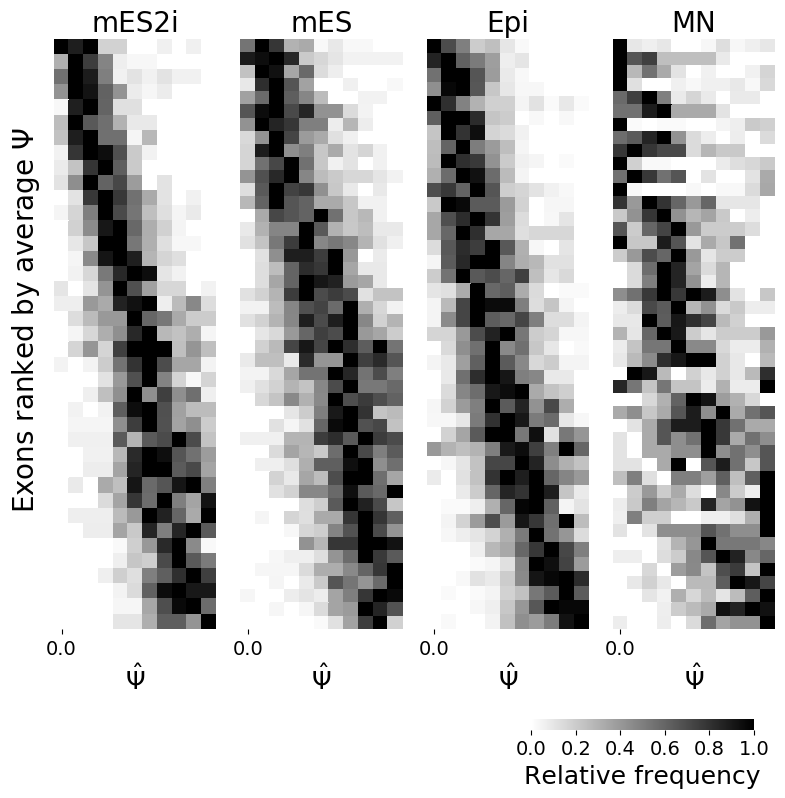

In [30]:
hist_list = [chen_ES2i_filtered[4], chen_ES_filtered[4], chen_Epi_filtered[4], chen_MN_filtered[4]]

dset_name_list = ['mES2i', 'mES', 'Epi', 'MN']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_unimodal',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

Atp6v1h_1


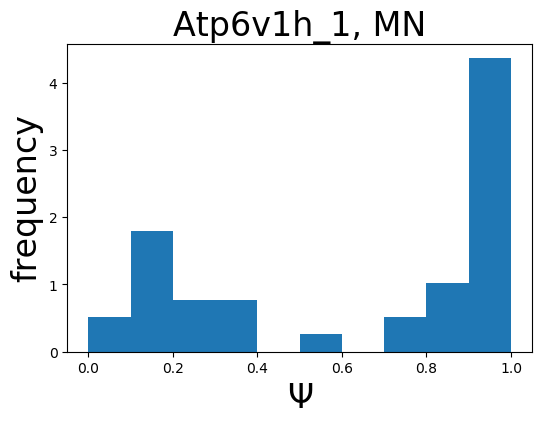

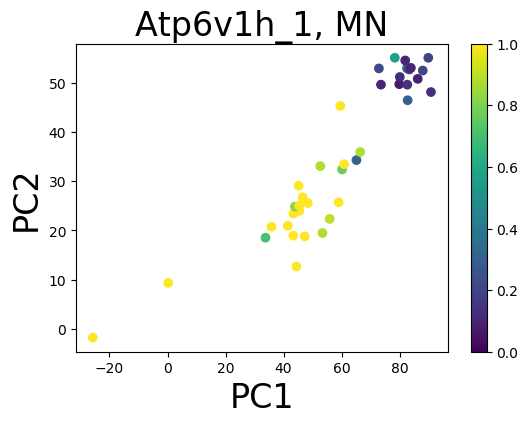

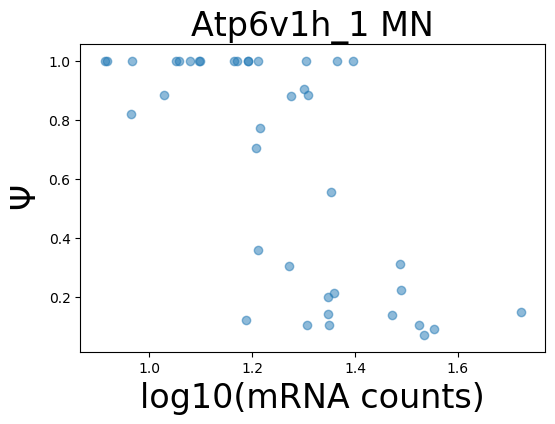

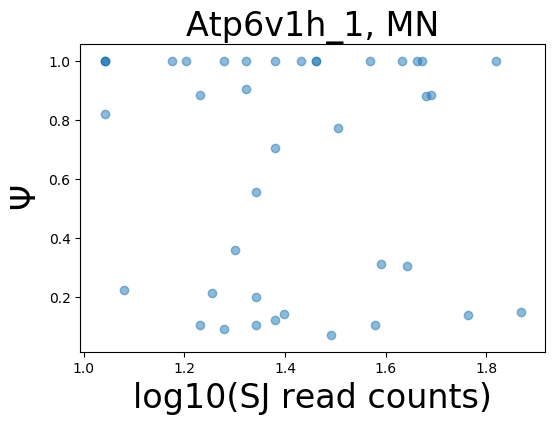

Clta_4


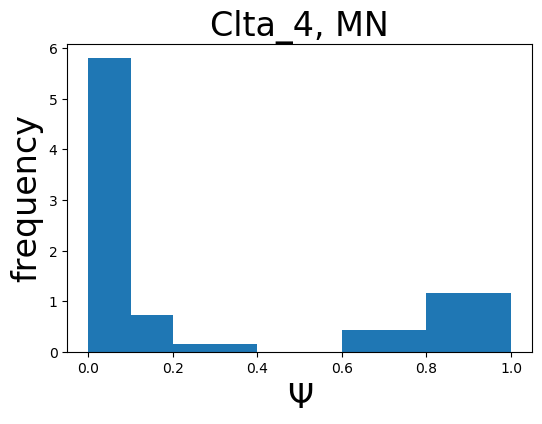

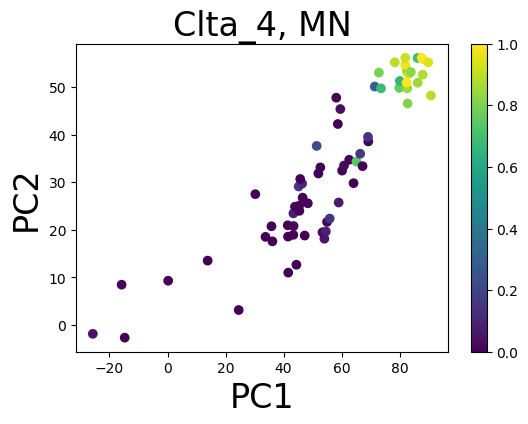

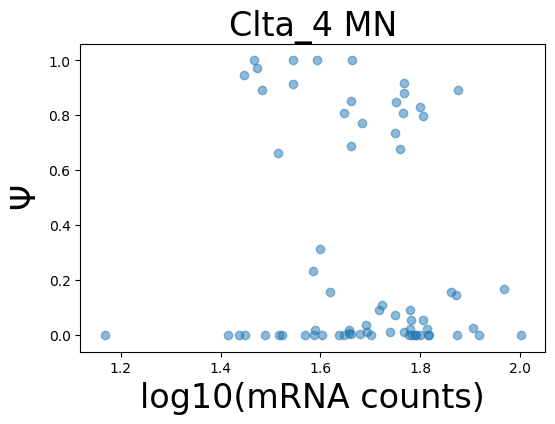

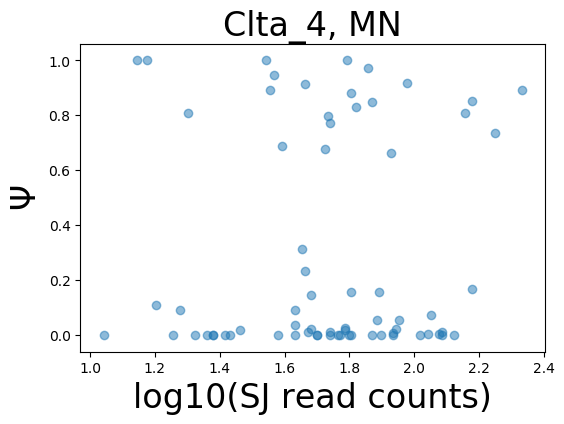

Ergic3_5


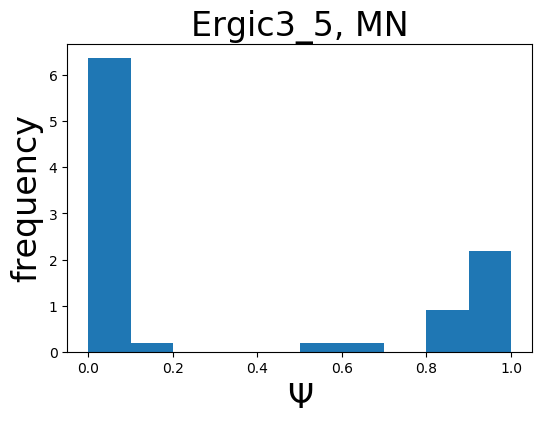

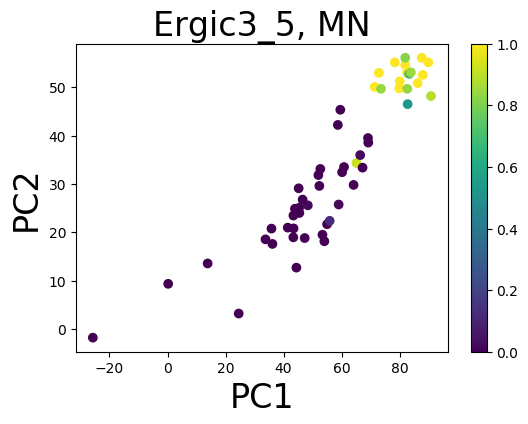

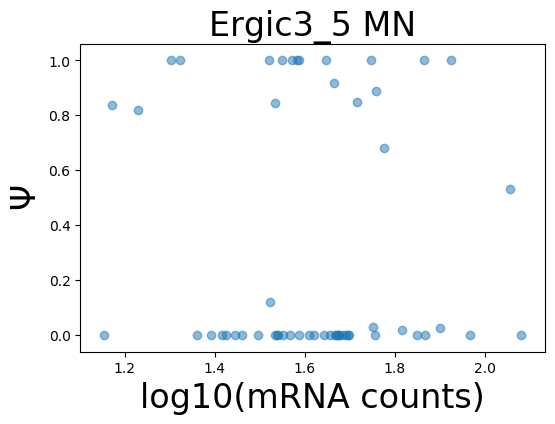

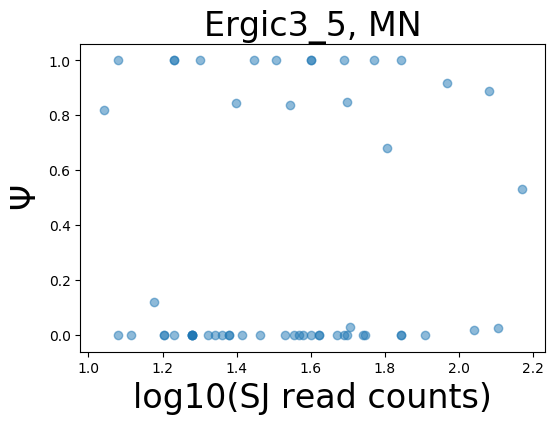

Idh3g_1


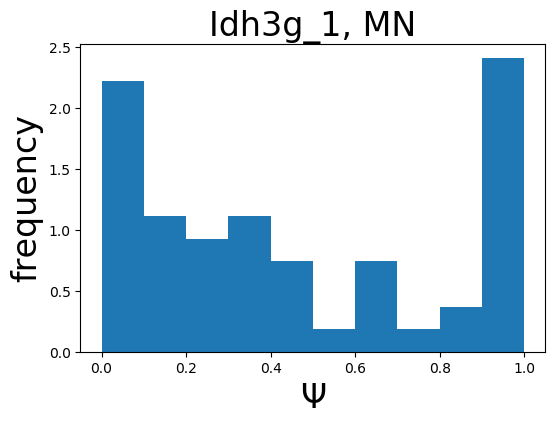

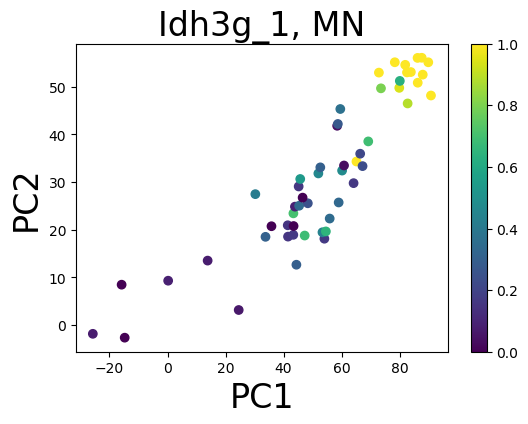

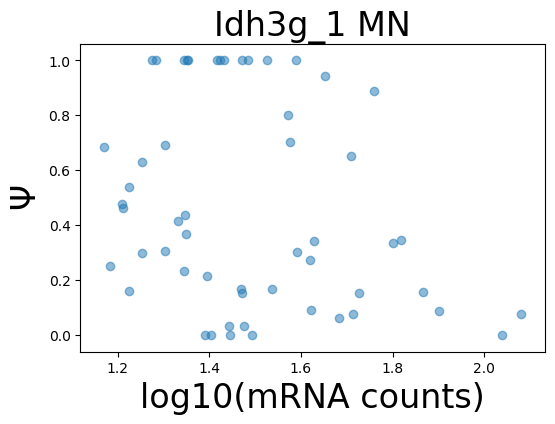

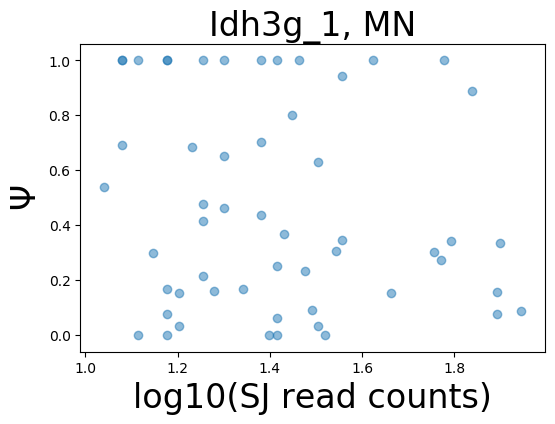

Meg3_5


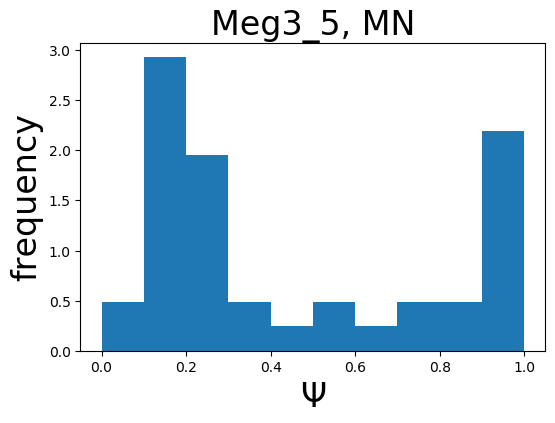

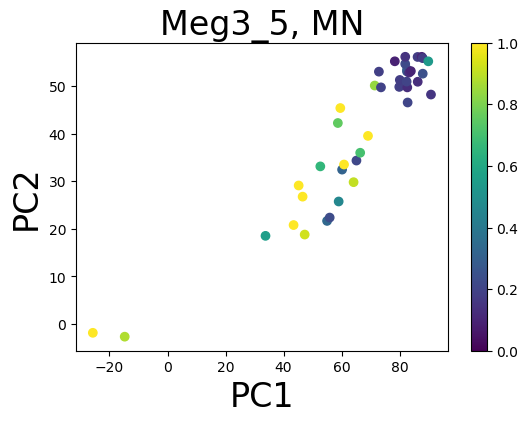

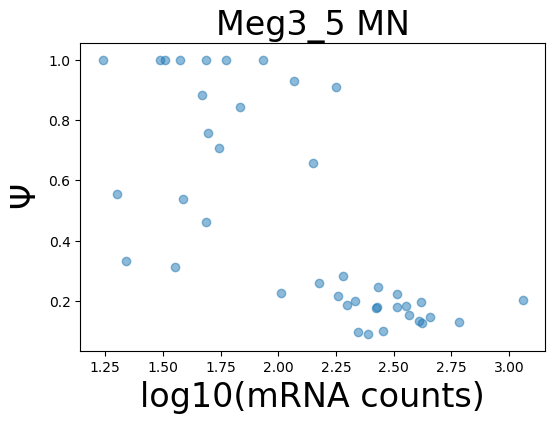

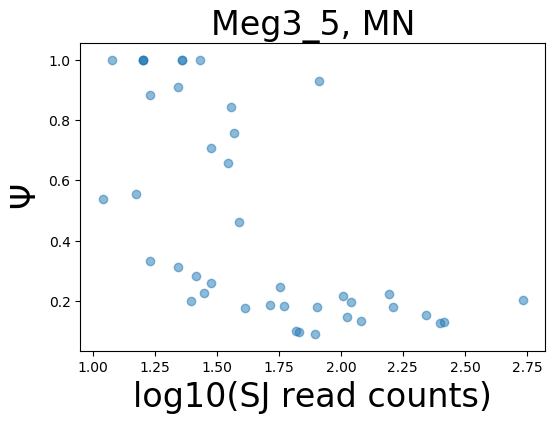

Rpn2_1


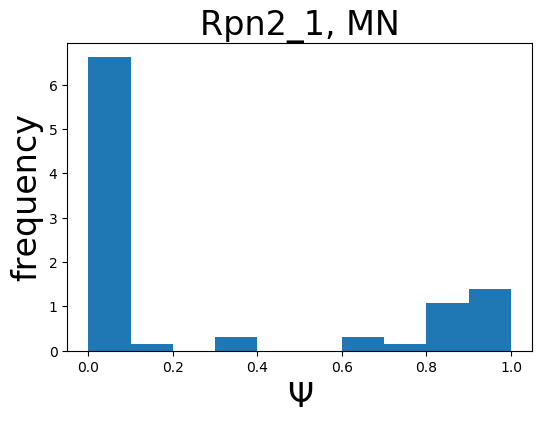

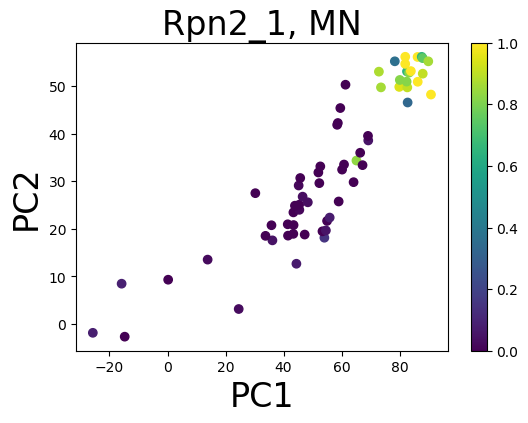

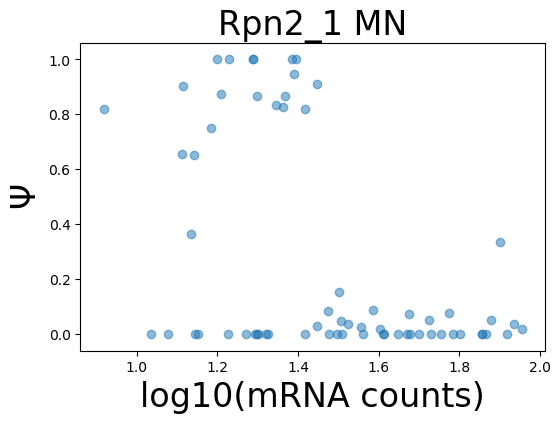

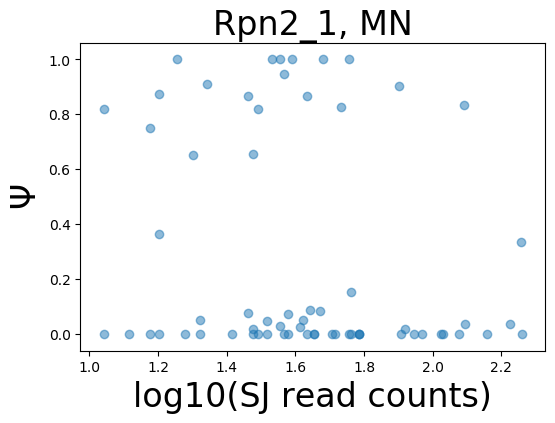

In [31]:
figsize(6, 4)

es2i_t = 0
es_t = 0
epi_t = 0
mn_t = 0

i = 0
j = 0
cell_type = ['ES2i', 'ES', 'Epi', 'MN']
for subset in [chen_ES2i_filtered, chen_ES_filtered, chen_Epi_filtered, chen_MN_filtered]:

    for event in subset[0].index:

        token = subset[0].loc[event].dropna().quantile(0.25) <= 0.25
        token = token and subset[0].loc[event].dropna().quantile(0.75) >= 0.75
        if token:
            
            if cell_type[j] == 'ES2i':
                es2i_t += 1
            elif cell_type[j] == 'ES':
                es_t += 1
            if cell_type[j] == 'Epi':
                epi_t += 1
            if cell_type[j] == 'MN':
                mn_t += 1
            print(event)
            
            plt.hist(subset[0].loc[event].dropna(), range=[0,1], density=True)
            plt.title(event + ', ' + cell_type[j], fontsize=24)
            plt.xlabel(r'$\Psi$', fontsize=24)
            plt.ylabel('frequency', fontsize=24)
            plt.show()
            
            good_cells = subset[0].loc[event].dropna().index
            
#             print(len(good_cells))
            
#             print(len(chen_PSI.loc[event, ES2i].dropna()))
            
            sc = plt.scatter(chen_pca.loc[good_cells, 'PC1'], chen_pca.loc[good_cells, 'PC2'], 
                c=subset[0].loc[event, good_cells], vmin = 0, vmax=1)
        
            plt.colorbar(sc)
        
            plt.xlabel('PC1', fontsize=24)
            plt.ylabel('PC2', fontsize=24)
            plt.title(event + ', ' + cell_type[j], fontsize=24)
            
            plt.show()
            
            
            plt.scatter(np.log10(mrna_per_event_chen.loc[event, good_cells]+1), subset[0].loc[event, good_cells], alpha=0.5)
            plt.xlabel('log10(mRNA counts)', fontsize=24)
            plt.ylabel(r'$\Psi$', fontsize=24)
            plt.title(event + ' ' + cell_type[j], fontsize=24)
            plt.show()
            
            
            plt.scatter(np.log10(chen_read_counts.loc[event, good_cells]+1), subset[0].loc[event, good_cells], alpha=0.5)
            plt.xlabel('log10(SJ read counts)', fontsize=24)
            plt.ylabel(r'$\Psi$', fontsize=24)
            plt.title(event + ', ' + cell_type[j], fontsize=24)
            plt.show()
        i += 1
        
    j += 1
        
        
        

In [32]:
song_iPSC_filtered = process_subpop(song_ipsc, song_PSI, song_mrna_counts, mrna_per_event_song, song_read_counts, song_sj,
                                   0.2, 6, 10)
song_NPC_filtered = process_subpop(song_npc, song_PSI, song_mrna_counts, mrna_per_event_song, song_read_counts, song_sj,
                                   0.2, 6, 10)
song_MN_filtered = process_subpop(song_mn, song_PSI, song_mrna_counts, mrna_per_event_song, song_read_counts, song_sj,
                                   0.2, 6, 10)


NameError: name 'song_ipsc' is not defined

In [ ]:
pvals = []

for subset in [song_iPSC_filtered, song_NPC_filtered, song_MN_filtered]:

    for event in subset[0].index:

        ht = hartigan_test(subset[0].loc[event].dropna())
        pvals.append(ht[1])
        
        
bh_correction = multipletests(pvals, method='fdr_bh')
figsize(6, 4)

ipsc_t = 0
npc_t = 0
# epi_t = 0
mn_t = 0

i = 0
j = 0
cell_type = ['iPSC', 'NPC', 'MN']
for subset in [song_iPSC_filtered, song_NPC_filtered, song_MN_filtered]:

    for event in subset[0].index:

        if bh_correction[0][i]:
            
            if cell_type[j] == 'iPSC':
                ipsc_t += 1
            elif cell_type[j] == 'NPC':
                npc_t += 1
            if cell_type[j] == 'MN':
                mn_t += 1
            print(event)
            
            plt.hist(subset[0].loc[event].dropna(), range=[0,1], density=True)
            plt.title(event + ', ' + cell_type[j], fontsize=24)
            plt.xlabel(r'$\Psi$', fontsize=24)
            plt.ylabel('frequency', fontsize=24)
            plt.show()
            
            good_cells = [x for x in subset[0].loc[event].dropna().index if x in song_pca.index]
            
#             print(len(good_cells))
            
#             print(len(chen_PSI.loc[event, ES2i].dropna()))
            
            sc = plt.scatter(song_pca.loc[good_cells, 'PC1'], song_pca.loc[good_cells, 'PC2'], 
                c=subset[0].loc[event, good_cells], vmin = 0, vmax=1)
        
            plt.colorbar(sc)
        
            plt.xlabel('PC1', fontsize=24)
            plt.ylabel('PC2', fontsize=24)
            plt.title(event + ', ' + cell_type[j], fontsize=24)
            
            plt.show()
            
            
            plt.scatter(np.log10(mrna_per_event_song.loc[event, good_cells]+1), subset[0].loc[event, good_cells], alpha=0.5)
            plt.xlabel('log10(mRNA counts)', fontsize=24)
            plt.ylabel(r'$\Psi$', fontsize=24)
            plt.title(event + ' ' + cell_type[j], fontsize=24)
            plt.show()
            
            
            plt.scatter(np.log10(song_read_counts.loc[event, good_cells]+1), subset[0].loc[event, good_cells], alpha=0.5)
            plt.xlabel('log10(SJ read counts)', fontsize=24)
            plt.ylabel(r'$\Psi$', fontsize=24)
            plt.title(event + ', ' + cell_type[j], fontsize=24)
            plt.show()
        i += 1
        
    j += 1
        
        
        

In [ ]:
hist_list = [song_iPSC_filtered[4], song_NPC_filtered[4], song_MN_filtered[4]]

dset_name_list = ['iPSC', 'NPC', 'MN']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_unimodal_song',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

In [ ]:
np.sum(multipletests(pvals, method='fdr_bh')[0])

In [ ]:
np.sum([1 if x < 0.05 else 0 for x in pvals])

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
k_clusters = km.fit_predict(chen_pca[['PC1', 'PC2']])

In [ ]:
plt.scatter(chen_pca.PC1, chen_pca.PC2, c=k_clusters)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=6)
ac_clusters = ac.fit_predict(chen_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(chen_pca.PC1, chen_pca.PC2, c=ac_clusters)
plt.show()

chen_pca_clust = chen_pca.copy()
chen_pca_clust['AC'] = ac_clusters

In [ ]:
sra_shalek = pd.read_csv('Shalek.SraSingleCells.txt', sep='\t')
treatment = []
MBases = []
cells = []
for cell in sra_shalek.BioSample.unique():
    cells.append(cell)
    treatment.append(list(sra_shalek.loc[sra_shalek.BioSample == cell].source_name.fillna('BMDC'))[0])
    MBases.append(sra_shalek.loc[sra_shalek.BioSample == cell].MBases.sum())
    


In [ ]:
sra_shalek.BioSample.unique()

In [ ]:
sra_meta = pd.DataFrame()
sra_meta['cells'] = cells
sra_meta['MBases'] = MBases
sra_meta['treatment'] = treatment

sra_meta.to_csv('shalek.meta.tab', sep='\t', index=False, header=True)

In [ ]:
sra_meta = pd.read_csv('shalek.meta.tab', sep='\t', index_col=0)
shalek_PSI_paper = pd.read_csv('../../../data/shalek/shalek.psi_paper.csv', index_col = 0)
shalek_counts_paper = pd.read_csv('../../../data/shalek/shalek.expression_paper.csv', index_col = 0)

In [ ]:
shalek_pca = pd.read_csv('../../../data/shalek/shalek.pca.tab', index_col = 0, sep='\t')

In [ ]:
shalek_cells = shalek_PSI_paper.columns[1:18]

In [ ]:
shalek_PSI_paper

In [ ]:
plt.hist(shalek_PSI_paper.loc[shalek_PSI_paper.index[shalek_PSI_paper.gene == 'Irgm1'][0], shalek_cells].dropna())
plt.show()

In [ ]:
plt.hist(shalek_PSI.loc['Irgm1_1'])
plt.show()

In [ ]:
ordered_genes = [x for x in shalek_counts_paper[shalek_cells].mean(axis=1).sort_values().index if x in [y.upper() for y in list(shalek_PSI_paper.gene.fillna('nogene'))]]
expression_col = []
for i in shalek_PSI_paper.index:
    
    x = shalek_PSI_paper['gene'].fillna('nogene').loc[i].upper()
    #print(x)
    if x in shalek_counts_paper.index:
        expression_col.append(shalek_counts_paper.loc[x, shalek_cells].mean())
    else:
        expression_col.append(0)
    
    
shalek_PSI_paper['expression'] = expression_col

shalek_hist_complete, shalek_hist_intermediate = scp.get_bins_table(shalek_PSI_paper[shalek_cells], 
                                                                    pd.DataFrame(shalek_PSI_paper.expression))

In [ ]:
shalek_inter = shalek_PSI_paper#.loc[np.abs(0.5 - shalek_PSI_paper[shalek_cells].mean(axis=1)) <= 0.3]

In [ ]:
hist_list = [shalek_hist_complete, shalek_hist_intermediate]

dset_name_list = ['Sha', 'lek']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_shalekshalek',
                    plot_title = "", 
                    ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20)

plt.show()

In [ ]:
good_exons = shalek_hist_intermediate.index[shalek_inter.loc[shalek_hist_intermediate.index, shalek_cells].isna().mean(axis=1) <= 0.75]
figsize(6,4)
plt.scatter(np.log10(shalek_inter.loc[good_exons, 'expression']+1), list(np.sum(np.abs(0.5 - shalek_inter.loc[good_exons, shalek_cells])>=0.45, axis=1) / (18-shalek_inter.loc[good_exons, shalek_cells].isna().sum(axis=1))),
           c = np.abs(0.5-shalek_inter.loc[good_exons, shalek_cells].mean(axis=1)), cmap=cm.viridis, vmin=0, vmax=0.5)

In [ ]:
pearsonr(np.log10(shalek_inter.loc[good_exons, 'expression']+1), list(np.sum(np.abs(0.5 - shalek_inter.loc[good_exons, shalek_cells])>=0.45, axis=1) / (18-shalek_inter.loc[good_exons, shalek_cells].isna().sum(axis=1))))

In [ ]:
lescroart_meta = pd.read_csv('../../../data/lescroart/lescroart_wt_meta.tab', sep='\t', index_col=0)
lescroart_pca = pd.read_csv('../../../data/lescroart/lescroart.pca.tab', sep='\t', index_col=0)
# song_pca = song_pca.sort_values('pseudotime')
# # chen_pca.PC2 = -chen_pca.PC2
# # chen_pca.line_2 = -chen_pca.line_2

# song_index = [x for x in song_pca.sort_values('pseudotime').index if x in mrna_per_event_song.columns]

# song_pca = song_pca.loc[song_index]
# song_PSI = song_PSI[song_index]
# mrna_per_event_song = mrna_per_event_song[song_index]

In [ ]:
lescroart_cells = lescroart_mrna_counts.columns

lescroart_cells = [x for x in lescroart_cells if x in lescroart_pca.index]

In [ ]:
colores = ['red' if x == 'E6.75' else 'blue' for x in lescroart_meta.loc[lescroart_cells].age]

In [ ]:
figsize(6,4)
plt.scatter(lescroart_pca.loc[lescroart_cells, 'PC1'],lescroart_pca.loc[lescroart_cells, 'PC2'], c=colores)
plt.show()                                                                      

In [ ]:
lescroart_meta = lescroart_meta.loc[lescroart_cells]
E6 = lescroart_meta.loc[lescroart_meta.age=='E6.75'].index
E7 = lescroart_meta.loc[lescroart_meta.age=='E7.25'].index
lescroart_PSI = lescroart_PSI[lescroart_cells]
lescroart_mrna_counts = lescroart_mrna_counts[lescroart_cells]
lescroart_read_counts = lescroart_read_counts[lescroart_cells]
lescroart_sj = lescroart_sj.loc[lescroart_cells]
mrna_per_event_lescroart = mrna_per_event_lescroart[lescroart_cells]

lescroart_E6_filtered = process_subpop(E6, lescroart_PSI, lescroart_mrna_counts, mrna_per_event_lescroart, 
                                       lescroart_read_counts, lescroart_sj, 0.1, 6, 10)
lescroart_E7_filtered = process_subpop(E7, lescroart_PSI, lescroart_mrna_counts, mrna_per_event_lescroart, 
                                       lescroart_read_counts, lescroart_sj, 0.1, 6, 10)

In [ ]:
hist_list = [lescroart_E6_filtered[4], lescroart_E7_filtered[4]]

dset_name_list = ['E6.75', 'E7.25']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_unimodal_lescroart',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

In [ ]:
trapnell_pca = pd.read_csv('../../../data/trapnell/trapnell.pca.tab', sep='\t', index_col=0)

trapnell_cells = trapnell_mrna_counts.columns

trapnell_cells = [x for x in trapnell_cells if x in trapnell_pca.index]
trapnell_pca = trapnell_pca.loc[trapnell_cells]

In [ ]:
trapnell_colores = []
for idx in trapnell_pca.index:
    if trapnell_pca.loc[idx, 'cell_type'] == 0:
        trapnell_colores.append('red')
    elif trapnell_pca.loc[idx, 'cell_type'] == 24:
        trapnell_colores.append('darkorange')
    elif trapnell_pca.loc[idx, 'cell_type'] == 48:
        trapnell_colores.append('forestgreen')
    else:
        trapnell_colores.append('navy')


In [ ]:
figsize(6,4)
plt.scatter(trapnell_pca.loc[trapnell_cells, 'PC1'], trapnell_pca.loc[trapnell_cells, 'PC2'], c=trapnell_colores)
plt.show()                                                                      

In [ ]:
trapnell_meta = trapnell_pca.loc[trapnell_cells]
M00 = trapnell_meta.loc[trapnell_meta.cell_type==0].index
M24 = trapnell_meta.loc[trapnell_meta.cell_type==24].index
M48 = trapnell_meta.loc[trapnell_meta.cell_type==48].index
M72 = trapnell_meta.loc[trapnell_meta.cell_type==72].index
trapnell_PSI = trapnell_PSI[trapnell_cells]
trapnell_mrna_counts = trapnell_mrna_counts[trapnell_cells]
trapnell_read_counts = trapnell_read_counts[trapnell_cells]
trapnell_sj = trapnell_sj.loc[trapnell_cells]
mrna_per_event_trapnell = mrna_per_event_trapnell[trapnell_cells]

trapnell_M00_filtered = process_subpop(M00, trapnell_PSI, trapnell_mrna_counts, mrna_per_event_trapnell, 
                                       trapnell_read_counts, trapnell_sj, 0.2, 6, 10)
trapnell_M24_filtered = process_subpop(M24, trapnell_PSI, trapnell_mrna_counts, mrna_per_event_trapnell, 
                                       trapnell_read_counts, trapnell_sj, 0.2, 6, 10)
trapnell_M48_filtered = process_subpop(M48, trapnell_PSI, trapnell_mrna_counts, mrna_per_event_trapnell, 
                                       trapnell_read_counts, trapnell_sj, 0.2, 6, 10)
trapnell_M72_filtered = process_subpop(M72, trapnell_PSI, trapnell_mrna_counts, mrna_per_event_trapnell, 
                                       trapnell_read_counts, trapnell_sj, 0.2, 6, 10)

In [ ]:
hist_list = [trapnell_M00_filtered[4], trapnell_M24_filtered[4], trapnell_M48_filtered[4], trapnell_M72_filtered[4]]

dset_name_list = ['00', '24', '48', '72']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_unimodal_trapnell',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=6)
ac_clusters = ac.fit_predict(trapnell_meta[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(trapnell_meta.PC1, trapnell_meta.PC2, c=ac_clusters)
plt.show()

trapnell_pca_clust = trapnell_meta.copy()
trapnell_pca_clust['AC'] = ac_clusters

trapnell_clust_filter = []
for cluster in trapnell_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    trapnell_subpop = trapnell_pca_clust.index[trapnell_pca_clust.AC == cluster]
    
    trapnell_filter = process_subpop(trapnell_subpop, trapnell_PSI, trapnell_mrna_counts, mrna_per_event_trapnell, 
                                 trapnell_read_counts, trapnell_sj, 0.2, 10, 10, cell_min=0.5)
    
    trapnell_clust_filter.append(trapnell_filter)

In [ ]:
hist_list = [x[4] for x in trapnell_clust_filter]

dset_name_list = ['1', '2', '3', '4', '5', '6']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_clusters_trapnell',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

In [ ]:
song_modalities = pd.read_csv('../../../data/song/song_event_modalities.tab', sep='\t', index_col = 0)

In [ ]:
song_modalities.head()

In [ ]:
song_iPSC_filtered = process_subpop(song_iPSC, song_PSI, song_mrna_counts, mrna_per_event_song, song_read_counts, 
                                    song_coverage_tab['SJ_coverage'], 0.2, 10, 10)
song_NPC_filtered = process_subpop(song_NPC, song_PSI, song_mrna_counts, mrna_per_event_song, song_read_counts, 
                                   song_coverage_tab['SJ_coverage'], 0.2, 10, 10)
song_MN_filtered = process_subpop(song_MN, song_PSI, song_mrna_counts, mrna_per_event_song, song_read_counts, 
                                  song_coverage_tab['SJ_coverage'], 0.2, 10, 10)


In [ ]:
ipsc_events = [x for x in song_iPSC_filtered[0].index if x in song_modalities.index]
for event in ipsc_events:
    if song_modalities.loc[event, 'iPSC'] == 'bimodal':
        print(song_modalities.loc[event, 'iPSC'])
        plt.hist(song_iPSC_filtered[0].loc[event].dropna())
        plt.show()

In [ ]:
song_filtered = process_subpop(song_PSI.columns, song_PSI, song_mrna_counts, mrna_per_event_song, song_read_counts, 
                                    song_coverage_tab['SJ_coverage'], 0.05, 6, 10)

In [ ]:
for evento in [x for x in song_iPSC_filtered[0].index if x in song_modalities.index]:
    print(evento)
    print(song_modalities.loc[evento, 'iPSC'])
    plt.hist(song_PSI.loc[evento, song_iPSC].dropna())
    plt.show()
    plt.hist(song_iPSC_filtered[0].loc[evento].dropna())
    plt.show()

In [ ]:
for evento in [x for x in song_iPSC_filtered[0].index if x in song_modalities.index]:
    
    if song_modalities.loc[evento, 'iPSC'] == 'bimodal':
        print(evento)
        plt.hist(song_PSI.loc[evento, song_MN].dropna())
        plt.show()
        plt.hist(song_MN_filtered[0].loc[evento].dropna())
        plt.show()

In [ ]:
for evento in [x for x in song_iPSC_filtered[0].index if x in song_modalities.index]:
    
    if song_modalities.loc[evento, 'iPSC'] == 'bimodal':
        print(evento)
        plt.hist(song_outrigger.loc[[x for x in list(song_cells.index) if x[0] == 'P'], 
                                    song_modalities.loc[evento].song_annotation].dropna())
        plt.show()
        plt.hist(song_iPSC_filtered[0].loc[evento].dropna())
        plt.show()
        plt.hist(song_PSI.loc[evento, song_iPSC].dropna())
        plt.show()
        plt.scatter(np.log10(song_iPSC_filtered[2].loc[evento]+1), song_iPSC_filtered[0].loc[evento])
        plt.show()
        
        print(len(song_outrigger.loc[[x for x in list(song_cells.index) if x[0] == 'P'], 
                                    song_modalities.loc[evento].song_annotation].dropna()))
        print(len(song_PSI.loc[evento, song_iPSC].dropna()))
        print(len(song_iPSC_filtered[0].loc[evento].dropna()))

In [ ]:
for evento in [x for x in song_MN_filtered[0].index if x in song_modalities.index]:
    print(evento)
    if song_modalities.loc[evento, 'MN'] == 'bimodal':
        plt.hist(song_PSI.loc[evento, song_MN].dropna())
        plt.show()
        plt.hist(song_MN_filtered[0].loc[evento].dropna())
        plt.show()

In [ ]:
plt.hist(song_PSI.loc['RPS24_1', song_NPC].dropna())
plt.show()

In [ ]:
song_outrigger.head()

In [ ]:
song_outrigger = pd.read_csv('song_outrigger_psi.tab', index_col = 0)

In [ ]:
plt.hist(song_outrigger.T.loc[song_modalities.loc['EIF3I_4'].song_annotation].dropna())
plt.show()

In [ ]:
song_modalities.loc['EIF3I_4'].song_annotation

In [ ]:
plt.hist(song_PSI.loc['EIF3I_4'].dropna())
plt.show()

In [ ]:
plt.hist(song_outrigger.T.loc[song_modalities.loc['HNRNPDL_7'].song_annotation].dropna())
plt.show()

In [ ]:
plt.hist(song_PSI.loc['HNRNPDL_7'].dropna())
plt.show()

In [ ]:
plt.scatter(range(len(song_PSI.loc['EIF3I_4'].sort_values())), song_PSI.loc['EIF3I_4'].sort_values())
plt.scatter(range(len(song_outrigger.T.loc[song_modalities.loc['EIF3I_4'].song_annotation].sort_values())), 
            song_outrigger.T.loc[song_modalities.loc['EIF3I_4'].song_annotation].sort_values())

plt.show()

In [ ]:
plt.scatter(range(len(song_PSI.loc['EIF3I_3'].sort_values())), song_PSI.loc['EIF3I_3'].sort_values())
plt.scatter(range(len(song_outrigger.T.loc[song_modalities.loc['EIF3I_3'].song_annotation].sort_values())), 
            song_outrigger.T.loc[song_modalities.loc['EIF3I_3'].song_annotation].sort_values())

plt.show()

In [ ]:
plt.scatter(range(len(song_PSI.loc['RPS24_1'].sort_values())), song_PSI.loc['RPS24_1'].sort_values())
plt.scatter(range(len(song_outrigger.T.loc[song_modalities.loc['RPS24_1'].song_annotation].sort_values())), 
            song_outrigger.T.loc[song_modalities.loc['RPS24_1'].song_annotation].sort_values())

plt.show()

In [ ]:
plt.scatter(range(len(song_PSI.loc['DGUOK_11'].sort_values())), song_PSI.loc['DGUOK_11'].sort_values())
plt.scatter(range(len(song_outrigger.T.loc[song_modalities.loc['DGUOK_11'].song_annotation].sort_values())), 
            song_outrigger.T.loc[song_modalities.loc['DGUOK_11'].song_annotation].sort_values())

plt.show()

In [ ]:
plt.scatter(range(len(song_PSI.loc['HNRNPR_6'].sort_values())), song_PSI.loc['HNRNPR_6'].sort_values())
plt.scatter(range(len(song_outrigger.T.loc[song_modalities.loc['HNRNPR_6'].song_annotation].sort_values())), 
            song_outrigger.T.loc[song_modalities.loc['HNRNPR_6'].song_annotation].sort_values())

plt.show()

In [ ]:
song_cells = pd.read_csv('../../../data/song/GSE85908_mapping_stats.csv', index_col = 0)

In [ ]:
song_sra =  pd.read_csv('../../../data/song/SraRunTable.txt', sep='\t', index_col = 7)

In [ ]:
plt.scatter(range(202), np.log10(song_sra.loc[song_PSI.columns].MBases_l.sort_values()))
plt.scatter(range(len(song_cells['Number of input reads'])), np.log10(song_cells['Number of input reads']/10000).sort_values())
plt.show()

In [ ]:
len([x for x in list(song_cells.index) if x[0] == 'P'])

In [33]:
kinetics_C57 = pd.read_csv('../../../data/kinetics/mES_kinetics_C57.csv', index_col=0)
kinetics_C57 = kinetics_C57.loc[~kinetics_C57.index.duplicated(keep='first')]
kinetics_CAST = pd.read_csv('../../../data/kinetics/mES_kinetics_CAST.csv', index_col=0)
kinetics_CAST = kinetics_CAST.loc[~kinetics_CAST.index.duplicated(keep='first')]

#kinetics_X = pd.read_csv('../../../data/kinetics/kinetics_X.csv', index_col=0)

In [34]:
C57_mle_name = kinetics_C57.columns[0]
C57_freq_name = kinetics_C57.columns[1]
C57_size_name = kinetics_C57.columns[2]

CAST_mle_name = kinetics_CAST.columns[0]
CAST_freq_name = kinetics_CAST.columns[1]
CAST_size_name = kinetics_CAST.columns[2]

# X_freq_name = kinetics_X.columns[1]
# X_size_name = kinetics_X.columns[2]



In [35]:
C57_freq = []
C57_size = []
# for i in kinetics_C57.index:
#     if kinetics_C57.loc[i, C57_freq_name][1:].split()[0][-1] == ',':
#         C57_freq.append(float(kinetics_C57.loc[i, C57_freq_name][1:].split()[0][:-1]))
#         print('hola')
#     else:
#         C57_freq.append(float(kinetics_C57.loc[i, C57_freq_name][1:].split()[0]))
        
#     if kinetics_C57.loc[i, C57_freq_name][1:].split()[0][-1] == ',':
#         print('hola')
#         C57_size.append(float(kinetics_C57.loc[i, C57_size_name][1:].split()[1][:-1]))
#     else:
#         C57_size.append(float(kinetics_C57.loc[i, C57_size_name][1:].split()[1]))
        
        
for i in kinetics_C57.index:
    
    kon = kinetics_C57.loc[i, C57_mle_name][1:].split()[0]
    koff = kinetics_C57.loc[i, C57_mle_name][1:].split()[1]
    ksyn = kinetics_C57.loc[i, C57_mle_name][1:].split()[2][:-1]
    
    if kon[-1] == ',':
        print(kon)
        kon = kon[:-1]
    if koff[-1] == ',':
        print(koff)
        koff = koff[:-1]
    if ksyn[-1] == ',':
        print(ksyn)
        ksyn = ksyn[:-1]
    
    C57_freq.append(float(kon))
    C57_size.append(float(ksyn)/float(koff))
    
    
CAST_freq = []
CAST_size = []
    
for i in kinetics_CAST.index:
    
    CAST_freq.append(float(kinetics_CAST.loc[i, C57_mle_name][1:].split()[0]))
    
    koff = float(kinetics_CAST.loc[i, CAST_mle_name][1:].split()[1])
    ksyn = float(kinetics_CAST.loc[i, CAST_mle_name][1:].split()[2][:-1])
    
    CAST_size.append(ksyn/koff)
        

    

# for i in kinetics_CAST.index:
#     CAST_freq.append(float(kinetics_CAST.loc[i, CAST_freq_name][1:].split()[0]))
#     CAST_size.append(float(kinetics_CAST.loc[i, CAST_size_name][1:].split()[1]))
    
# X_freq = []
# X_size = []
# for i in kinetics_X.index:
#     X_freq.append(float(kinetics_X.loc[i, X_freq_name][1:].split()[0]))
#     X_size.append(float(kinetics_X.loc[i, X_size_name][1:].split()[1]))

1.85595906,
47.25645625,


In [36]:
kinetics_C57.shape

(6179, 4)

In [37]:
kinetics_C57.loc[~kinetics_C57.index.duplicated(keep='first')].shape

(6179, 4)

In [38]:
kinetics_C57['Maximum likelihood (kon, koff, ksyn)']

Gene
0610007P14Rik          [  1.2915914  356.01218176 502.19203139]
0610009B22Rik                [0.62893763 1.26663669 9.19825056]
0610010F05Rik             [ 0.34582821 21.23792178 21.7077245 ]
1110004E09Rik                [0.25737082 0.35585992 5.50127896]
1110007C09Rik             [ 0.12548747  1.42390799 10.85534996]
1110008L16Rik                [0.65948228 1.58767604 8.00533924]
1110012L19Rik             [ 1.11856466 73.59383047 95.16063712]
1110032A03Rik                [0.11258722 1.68525837 1.86936878]
1110037F02Rik                [0.71117614 2.04244584 7.19109453]
1110038B12Rik          [  1.99450962 112.05610421 226.08397397]
1110038F14Rik             [ 0.83021596 11.76598333 31.49327773]
1110051M20Rik             [ 0.21580007  7.62897586 27.21839724]
1110057K04Rik          [  0.44026527 102.17301691 211.58465022]
1110058L19Rik                [0.03355299 0.08479904 2.06385286]
1110059E24Rik                [0.39038547 0.37793585 3.08691778]
1110059G10Rik                [0.019

In [39]:
C57_kinetics = pd.DataFrame()
C57_kinetics['gene'] = kinetics_C57.index
C57_kinetics['C57_frequency'] = C57_freq
C57_kinetics['C57_size'] = C57_size
C57_kinetics = C57_kinetics.set_index('gene')

CAST_kinetics = pd.DataFrame()
CAST_kinetics['gene'] = kinetics_CAST.index
CAST_kinetics['CAST_frequency'] = CAST_freq
CAST_kinetics['CAST_size'] = CAST_size
CAST_kinetics = CAST_kinetics.set_index('gene')

# X_kinetics = pd.DataFrame()
# X_kinetics['gene'] = kinetics_X.index
# X_kinetics['X_frequency'] = X_freq
# X_kinetics['X_size'] = X_size
# X_kinetics = X_kinetics.set_index('gene')


In [40]:
kinetic_table = pd.concat([CAST_kinetics, C57_kinetics], axis=1)

In [41]:
# kinetic_table[['C57_frequency', 'CAST_frequency']].mean(axis=1)

In [42]:
frequency_list = []
psi_std = []
for i in chen_PSI.index:
    if i.split('_')[0] in kinetic_table.index:
        frequency_list.append(kinetic_table.loc[i.split('_')[0], ['C57_frequency', 'CAST_frequency']].mean())
        psi_std.append(chen_PSI.loc[i].std())

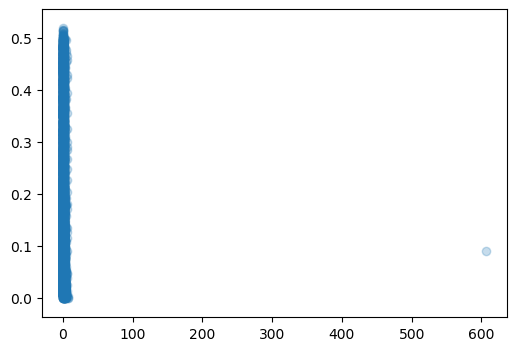

In [43]:
figsize(6, 4)
plt.scatter(frequency_list, psi_std, alpha = 0.25)
plt.show()

In [44]:
size_list = []
psi_std = []
for i in chen_PSI.index:
    if i.split('_')[0] in kinetic_table.index:
        size_list.append(kinetic_table.loc[i.split('_')[0], ['C57_size', 'CAST_size']].mean())
        psi_std.append(chen_PSI.loc[i].std())

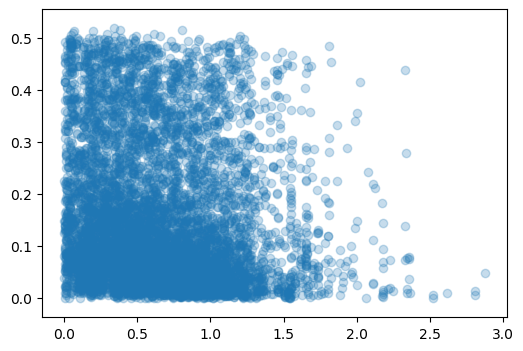

In [45]:
figsize(6, 4)
plt.scatter(np.log10(np.array(size_list)), psi_std, alpha = 0.25)
plt.show()

In [46]:
chen_int_genes, chen_int_exons = spu.get_int_events(chen_PSI[chen_ES2i], chen_mrna_counts[chen_ES2i], min_unimodal = 0.2)

In [47]:
frequency_list = []
psi_binary = []
for i in chen_int_exons:
    if i.split('_')[0] in kinetic_table.index:
        frequency_list.append(kinetic_table.loc[i.split('_')[0], ['C57_frequency', 'CAST_frequency']].mean())
        psi_binary.append(np.abs(0.5 - chen_PSI[chen_ES2i].loc[i] >= 0.49).sum() / np.sum(~chen_PSI[chen_ES2i].loc[i].isna()))

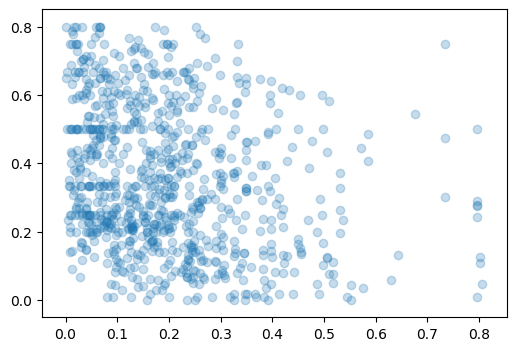

In [48]:
figsize(6, 4)
plt.scatter(np.log10(np.array(frequency_list)+1), psi_binary, alpha = 0.25)
plt.show()

In [49]:
size_list = []
frequency_list = []
psi_binary = []
exon_lista = []
for i in chen_int_exons:
    if i.split('_')[0] in kinetic_table.index:
        exon_lista.append(i)
        size_list.append(kinetic_table.loc[i.split('_')[0], ['C57_size', 'CAST_size']].mean())
        frequency_list.append(kinetic_table.loc[i.split('_')[0], ['C57_frequency', 'CAST_frequency']].mean())
        psi_binary.append((np.abs(0.5 - chen_PSI[chen_ES2i].loc[i]) >= 0.45).sum() / np.sum(~chen_PSI[chen_ES2i].loc[i].isna()))

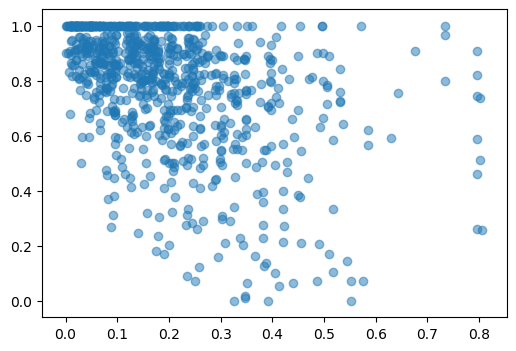

In [50]:
figsize(6, 4)
plt.scatter(np.log10(np.array(frequency_list)+1), psi_binary,alpha = 0.5)
plt.show()

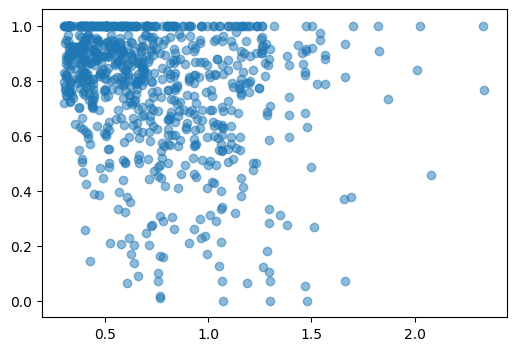

In [51]:
figsize(6, 4)
plt.scatter(np.log10(np.array(size_list)+1), psi_binary, alpha = 0.5)
plt.show()

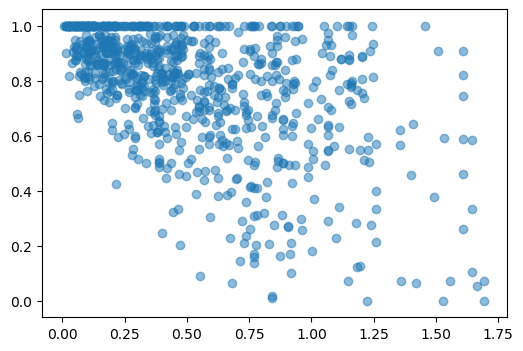

In [52]:
figsize(6, 4)
plt.scatter(np.log10((np.array(size_list)*np.array(frequency_list))+1), psi_binary, alpha = 0.5)
plt.show()

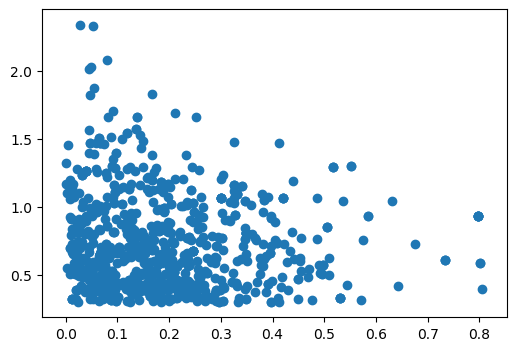

In [53]:
plt.scatter(np.log10(np.array(frequency_list)+1), np.log10(np.array(size_list)+1))
plt.show()

In [54]:
size_list = []
frequency_list = []
psi_binary = []
exon_lista = []
psi_std = []
psi_mean = []
for i in chen_int_exons:
    if i.split('_')[0] in kinetic_table.index:
        exon_lista.append(i)
        size_list.append(kinetic_table.loc[i.split('_')[0], ['C57_size', 'CAST_size']].mean())
        frequency_list.append(kinetic_table.loc[i.split('_')[0], ['C57_frequency', 'CAST_frequency']].mean())
        psi_binary.append((np.abs(0.5 - chen_PSI[chen_ES2i].loc[i]) >= 0.45).sum() / np.sum(~chen_PSI[chen_ES2i].loc[i].isna()))
        psi_std.append(chen_PSI[chen_ES2i].loc[i].std())
        psi_mean.append(chen_PSI[chen_ES2i].loc[i].mean())

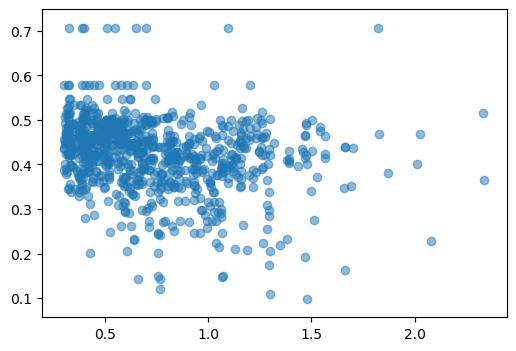

In [55]:
figsize(6, 4)
plt.scatter(np.log10((np.array(size_list))+1), psi_std, alpha = 0.5)
plt.show()

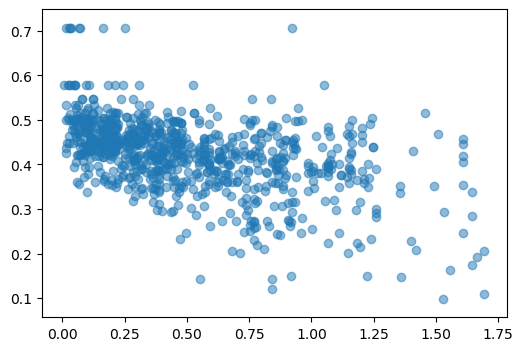

In [56]:
figsize(6, 4)
plt.scatter(np.log10((np.array(size_list)*np.array(frequency_list))+1), psi_std, alpha = 0.5)
plt.show()

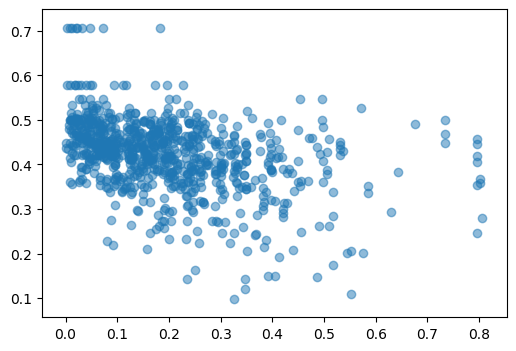

In [57]:
figsize(6, 4)
plt.scatter(np.log10(np.array(frequency_list)+1), psi_std, alpha = 0.5)
plt.show()

NameError: name 'burst_psi' is not defined

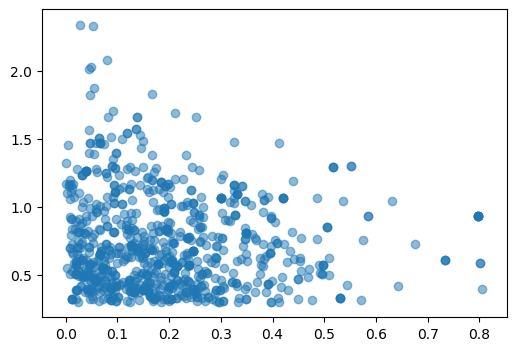

In [58]:
figsize(6, 4)
plt.scatter(np.log10(np.array(frequency_list)+1), np.log10(np.array(size_list)+1), alpha = 0.5)
plt.plot([np.log10(burst_psi.frequency.median()+1), np.log10(burst_psi.frequency.median()+1)], [0, 1.6])
plt.plot([0, 0.8], [np.log10(burst_psi['size'].median()+1), np.log10(burst_psi['size'].median()+1)])
plt.show()

In [59]:
burst_psi = pd.DataFrame()
burst_psi['exon'] = exon_lista
burst_psi['frequency'] = frequency_list
burst_psi['size'] = size_list
burst_psi['psi_std'] = psi_std
burst_psi['psi_mean'] = psi_mean
burst_psi['psi_binary'] = psi_binary
burst_psi = burst_psi.set_index('exon')

In [60]:
bursty=burst_psi.index[(burst_psi.frequency <= burst_psi.frequency.median()) & (burst_psi['size'] >= burst_psi['size'].median())]
rapid=burst_psi.index[(burst_psi.frequency >= burst_psi.frequency.median()) & (burst_psi['size'] <= burst_psi['size'].median())]
massive=burst_psi.index[(burst_psi.frequency >= burst_psi.frequency.median()) & (burst_psi['size'] >= burst_psi['size'].median())]
tiny=burst_psi.index[(burst_psi.frequency <= burst_psi.frequency.median()) & (burst_psi['size'] <= burst_psi['size'].median())]

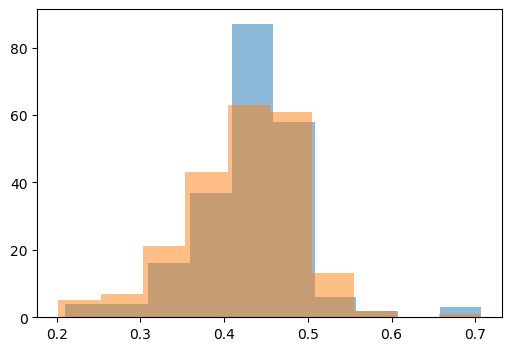

In [61]:
plt.hist(burst_psi.loc[bursty, 'psi_std'], alpha=0.5)
plt.hist(burst_psi.loc[rapid, 'psi_std'], alpha=0.5)
# plt.hist(burst_psi.loc[massive, 'psi_std'], alpha=0.5)
# plt.hist(burst_psi.loc[tiny, 'psi_std'], alpha=0.5)

plt.show()

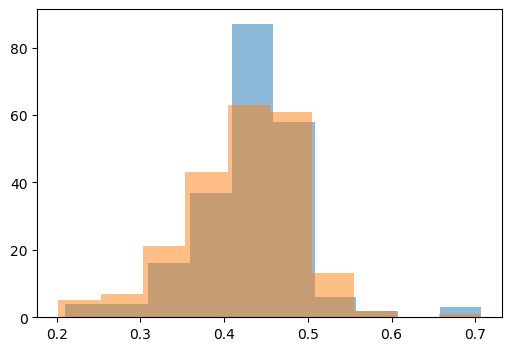

In [62]:
plt.hist(burst_psi.loc[bursty, 'psi_std'], alpha=0.5)
plt.hist(burst_psi.loc[rapid, 'psi_std'], alpha=0.5)
# plt.hist(burst_psi.loc[massive, 'psi_std'], alpha=0.5)
# plt.hist(burst_psi.loc[tiny, 'psi_std'], alpha=0.5)

plt.show()

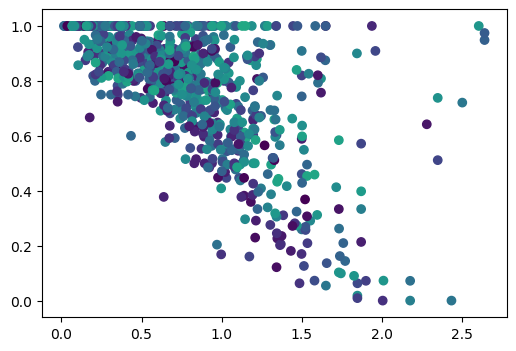

In [72]:
plt.scatter(np.log10(mrna_per_event_chen.loc[burst_psi.index, chen_ES2i].mean(axis=1)+1),
            burst_psi['psi_binary'], c = np.abs(0.5-burst_psi['psi_mean']), cmap=cm.viridis, vmin=0, vmax=0.5)
plt.

In [64]:
top_expressed = mrna_per_event_chen.loc[burst_psi.index, chen_ES2i].mean(axis=1).sort_values()[-100:].index

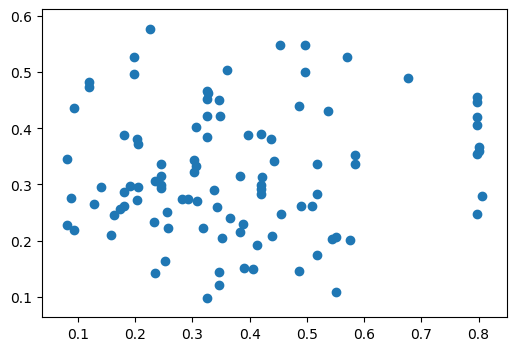

In [65]:
plt.scatter(np.log10(burst_psi.loc[top_expressed, 'frequency']+1), burst_psi.loc[top_expressed, 'psi_std'])
plt.show()

In [73]:
def test_burst(PSI_tab, mrna_counts, mrna_per_event, subpop, kinetic_table,  min_unimodal = 0.2):

    int_genes, int_exons = spu.get_int_events(PSI_tab[subpop], mrna_counts[subpop], min_unimodal = min_unimodal)

    size_list = []
    frequency_list = []
    psi_binary = []
    exon_lista = []
    psi_std = []
    psi_mean = []
    for i in int_exons:
        if i.split('_')[0] in kinetic_table.index:
            exon_lista.append(i)
            size_list.append(kinetic_table.loc[i.split('_')[0], ['C57_size', 'CAST_size']].mean())
            frequency_list.append(kinetic_table.loc[i.split('_')[0], ['C57_frequency', 'CAST_frequency']].mean())
            psi_binary.append((np.abs(0.5 - PSI_tab[subpop].loc[i]) >= 0.45).sum() / np.sum(~PSI_tab[subpop].loc[i].isna()))
            psi_std.append(PSI_tab[subpop].loc[i].std())
            psi_mean.append(PSI_tab[subpop].loc[i].mean())
        

    burst_psi = pd.DataFrame()
    burst_psi['exon'] = exon_lista
    burst_psi['frequency'] = frequency_list
    burst_psi['size'] = size_list
    burst_psi['psi_std'] = psi_std
    burst_psi['psi_mean'] = psi_mean
    burst_psi['psi_binary'] = psi_binary
    burst_psi = burst_psi.set_index('exon')

    burst_expression =  mrna_per_event.loc[burst_psi.index, subpop].mean(axis=1)
    
    burst_psi['mean_expression'] = burst_expression
    
    low_exp = burst_expression.index[burst_expression <= burst_expression.quantile(0.25)]
    med_exp = burst_expression.index[(burst_expression > burst_expression.quantile(0.25)) & ((burst_expression <= burst_expression.quantile(0.5)))]
    med_high_exp = burst_expression.index[(burst_expression > burst_expression.quantile(0.5)) & ((burst_expression <= burst_expression.quantile(0.75)))]
    high_exp = burst_expression.index[burst_expression > burst_expression.quantile(0.75)]
    
    freq_cor_bin = []
    freq_cor_std = []
    
    size_cor_bin = []
    size_cor_std = []
    
    freq_cor_bin.append(test_pearson(np.log10(burst_psi.loc[low_exp, 'frequency']+1), burst_psi.loc[low_exp, 'psi_binary']))
    freq_cor_bin.append(test_pearson(np.log10(burst_psi.loc[med_exp, 'frequency']+1), burst_psi.loc[med_exp, 'psi_binary']))
    freq_cor_bin.append(test_pearson(np.log10(burst_psi.loc[med_high_exp, 'frequency']+1), burst_psi.loc[med_high_exp, 'psi_binary']))
    freq_cor_bin.append(test_pearson(np.log10(burst_psi.loc[high_exp, 'frequency']+1), burst_psi.loc[high_exp, 'psi_binary']))
    
    freq_cor_std.append(test_pearson(np.log10(burst_psi.loc[low_exp, 'frequency']+1), burst_psi.loc[low_exp, 'psi_std']))
    freq_cor_std.append(test_pearson(np.log10(burst_psi.loc[med_exp, 'frequency']+1), burst_psi.loc[med_exp, 'psi_std']))
    freq_cor_std.append(test_pearson(np.log10(burst_psi.loc[med_high_exp, 'frequency']+1), burst_psi.loc[med_high_exp, 'psi_std']))
    freq_cor_std.append(test_pearson(np.log10(burst_psi.loc[high_exp, 'frequency']+1), burst_psi.loc[high_exp, 'psi_std']))
    
    size_cor_bin.append(test_pearson(np.log10(burst_psi.loc[low_exp, 'size']+1), burst_psi.loc[low_exp, 'psi_binary']))
    size_cor_bin.append(test_pearson(np.log10(burst_psi.loc[med_exp, 'size']+1), burst_psi.loc[med_exp, 'psi_binary']))
    size_cor_bin.append(test_pearson(np.log10(burst_psi.loc[med_high_exp, 'size']+1), burst_psi.loc[med_high_exp, 'psi_binary']))
    size_cor_bin.append(test_pearson(np.log10(burst_psi.loc[high_exp, 'size']+1), burst_psi.loc[high_exp, 'psi_binary']))
    
    size_cor_std.append(test_pearson(np.log10(burst_psi.loc[low_exp, 'size']+1), burst_psi.loc[low_exp, 'psi_std']))
    size_cor_std.append(test_pearson(np.log10(burst_psi.loc[med_exp, 'size']+1), burst_psi.loc[med_exp, 'psi_std']))
    size_cor_std.append(test_pearson(np.log10(burst_psi.loc[med_high_exp, 'size']+1), burst_psi.loc[med_high_exp, 'psi_std']))
    size_cor_std.append(test_pearson(np.log10(burst_psi.loc[high_exp, 'size']+1), burst_psi.loc[high_exp, 'psi_std']))
    
    return freq_cor_bin, freq_cor_std, size_cor_bin, size_cor_std, burst_psi, low_exp, med_exp, med_high_exp, high_exp


In [74]:
ES2i_kinetics = test_burst(chen_PSI, chen_mrna_counts, mrna_per_event_chen, chen_ES2i, kinetic_table,  min_unimodal = 0.2)
# ES_kinetics = test_burst(chen_PSI, chen_mrna_counts, mrna_per_event_chen, chen_ES, kinetic_table,  min_unimodal = 0.2)
# Epi_kinetics = test_burst(chen_PSI, chen_mrna_counts, mrna_per_event_chen, chen_Epi, kinetic_table,  min_unimodal = 0.2)
# MN_kinetics = test_burst(chen_PSI, chen_mrna_counts, mrna_per_event_chen, chen_MN, kinetic_table,  min_unimodal = 0.2)

In [75]:
freq_binary_p = [x[1] for x in ES2i_kinetics[1]]

In [76]:
multipletests(freq_binary_p, method='fdr_bh')

(array([ True, False, False, False]),
 array([0.02980834, 0.05350094, 0.94307868, 0.57623998]),
 0.012741455098566168,
 0.0125)

In [77]:
burst_psi_ES2i = ES2i_kinetics[4]
low_exp = ES2i_kinetics[5]
med_exp = ES2i_kinetics[6]
med_high_exp = ES2i_kinetics[7]
high_exp = ES2i_kinetics[8]

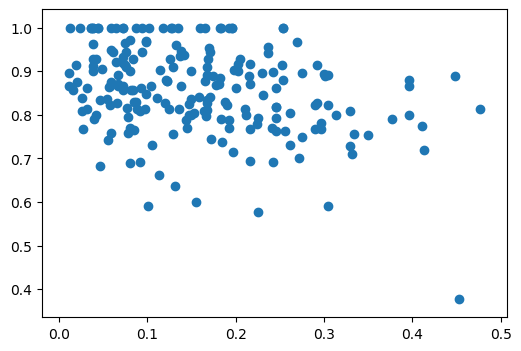

In [78]:
plt.scatter(np.log10(burst_psi_ES2i.loc[med_exp, 'frequency']+1), burst_psi_ES2i.loc[med_exp, 'psi_binary'])
plt.show()

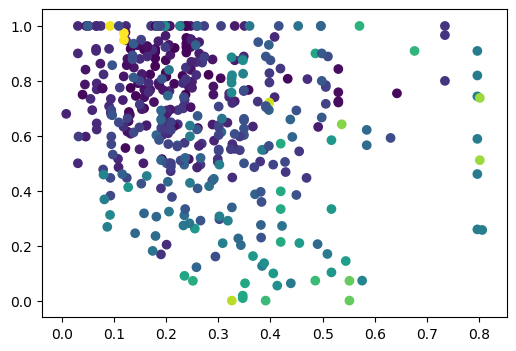

In [79]:
# burst_psi_ES2i.mean_expression
plt.scatter(np.log10(burst_psi_ES2i.loc[list(med_high_exp) + list(high_exp), 'frequency']+1), 
            burst_psi_ES2i.loc[list(med_high_exp) + list(high_exp), 'psi_binary'],
           c = np.log10(burst_psi_ES2i.loc[list(med_high_exp) + list(high_exp), 'mean_expression']), cmap=cm.viridis)
plt.show()

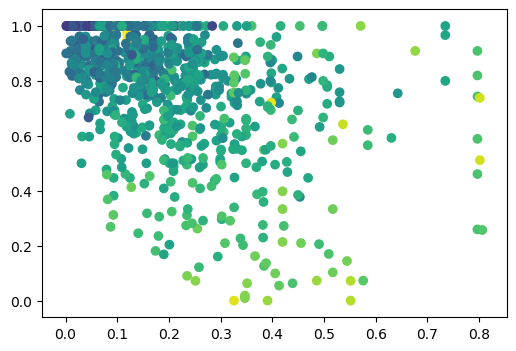

In [80]:
plt.scatter(np.log10(burst_psi_ES2i['frequency']+1), burst_psi_ES2i['psi_binary'],
           c = np.log10(burst_psi_ES2i['mean_expression']), cmap=cm.viridis)
plt.show()

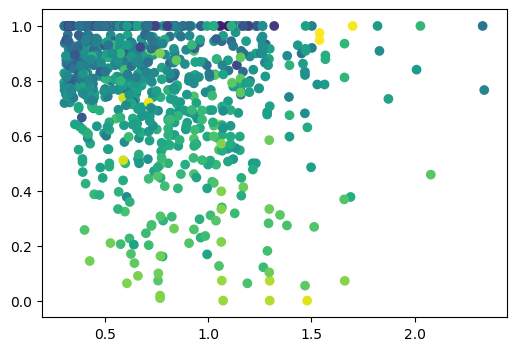

In [81]:
plt.scatter(np.log10(burst_psi_ES2i['size']+1), burst_psi_ES2i['psi_binary'],
           c = np.log10(burst_psi_ES2i['mean_expression']), cmap=cm.viridis)
plt.show()

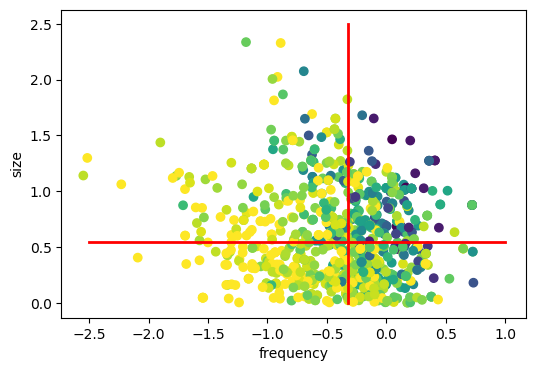

In [100]:
plt.scatter(np.log10(burst_psi_ES2i['frequency']), np.log10(burst_psi_ES2i['size']),
           c = burst_psi_ES2i['psi_binary'], cmap=cm.viridis)

freq_med = burst_psi_ES2i['frequency'].median()
size_med = burst_psi_ES2i['size'].median()
plt.plot([np.log10(freq_med), np.log10(freq_med)], [0, 2.5], c='red', linewidth=2)
plt.plot([-2.5, 1], [np.log10(size_med), np.log10(size_med)], c='red', linewidth=2)
plt.xlabel('frequency')
plt.ylabel('size')
plt.show()

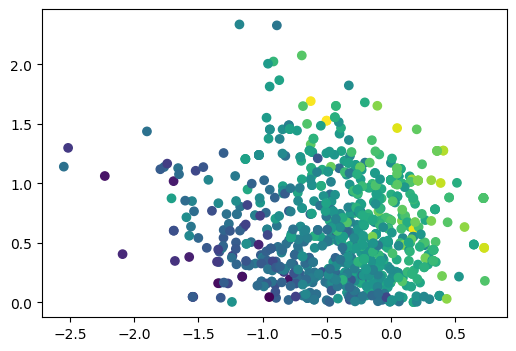

In [83]:
plt.scatter(np.log10(burst_psi_ES2i['frequency']), np.log10(burst_psi_ES2i['size']),
           c = np.log10(burst_psi_ES2i['mean_expression']), cmap=cm.viridis)
plt.show()

In [84]:
low_exons = burst_psi_ES2i.loc[((burst_psi_ES2i['frequency'] < freq_med) & (burst_psi_ES2i['size'] < size_med))].index
bursty_exons = burst_psi_ES2i.loc[((burst_psi_ES2i['frequency'] < freq_med) & (burst_psi_ES2i['size'] > size_med))].index
rapid_exons = burst_psi_ES2i.loc[((burst_psi_ES2i['frequency'] > freq_med) & (burst_psi_ES2i['size'] < size_med))].index
massive_exons = burst_psi_ES2i.loc[((burst_psi_ES2i['frequency'] > freq_med) & (burst_psi_ES2i['size'] > size_med))].index

In [85]:
quart_expression = burst_psi_ES2i.mean_expression.quantile(0.25)
three_quart_expression = burst_psi_ES2i.mean_expression.quantile(0.75)
median_expression = burst_psi_ES2i.mean_expression.median()

In [86]:
high_expression = burst_psi_ES2i.loc[burst_psi_ES2i.mean_expression > three_quart_expression].index
low_expression = burst_psi_ES2i.loc[burst_psi_ES2i.mean_expression < quart_expression].index

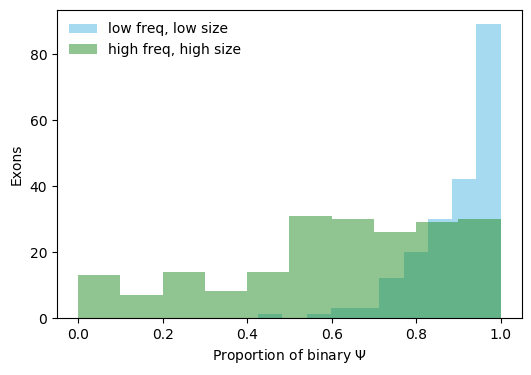

In [87]:
plt.hist(burst_psi_ES2i.loc[low_exons, 'psi_binary'], color='skyblue', alpha=0.75, label='low freq, low size')
plt.hist(burst_psi_ES2i.loc[massive_exons, 'psi_binary'], color='forestgreen', alpha=0.5, label='high freq, high size')
plt.xlabel('Proportion of binary $\Psi$')
plt.ylabel('Exons')
plt.legend(frameon=False)
plt.show()

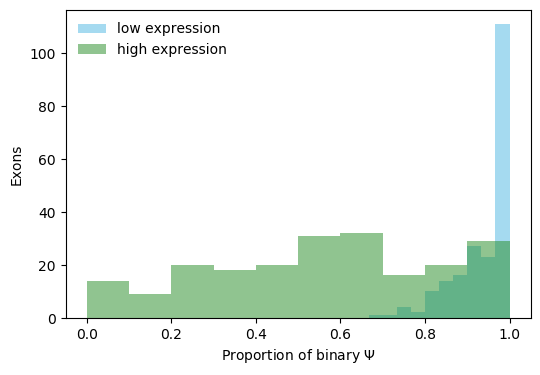

In [88]:
plt.hist(burst_psi_ES2i.loc[low_expression, 'psi_binary'], color='skyblue', alpha=0.75, label='low expression')
plt.hist(burst_psi_ES2i.loc[high_expression, 'psi_binary'], color='forestgreen', alpha=0.5, label='high expression')
plt.xlabel('Proportion of binary $\Psi$')
plt.ylabel('Exons')
plt.legend(frameon=False)
plt.show()

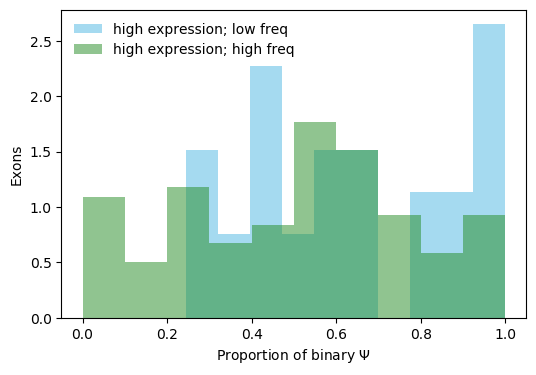

In [89]:
plt.hist(burst_psi_ES2i.loc[[x for x in bursty_exons if (x in high_expression)], 'psi_binary'], 
         color='skyblue', alpha=0.75, density=True, label='high expression; low freq')
# plt.hist(burst_psi_ES2i.loc[[x for x in rapid_exons if (x in high_expression)], 'psi_binary'], 
#          color='forestgreen', alpha=0.5, density=True)
plt.hist(burst_psi_ES2i.loc[[x for x in massive_exons if (x in high_expression)], 'psi_binary'], 
         color='forestgreen', alpha=0.5, density=True, label='high expression; high freq')
plt.xlabel('Proportion of binary $\Psi$')
plt.ylabel('Exons')
plt.legend(frameon=False)
plt.show()

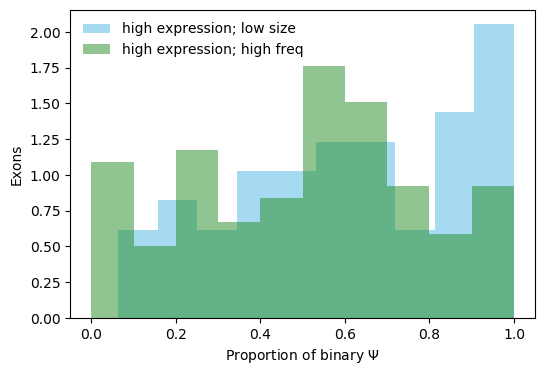

In [90]:
plt.hist(burst_psi_ES2i.loc[[x for x in rapid_exons if (x in high_expression)], 'psi_binary'], 
         color='skyblue', alpha=0.75, density=True, label='high expression; low size')
# plt.hist(burst_psi_ES2i.loc[[x for x in rapid_exons if (x in high_expression)], 'psi_binary'], 
#          color='forestgreen', alpha=0.5, density=True)
plt.hist(burst_psi_ES2i.loc[[x for x in massive_exons if (x in high_expression)], 'psi_binary'], 
         color='forestgreen', alpha=0.5, density=True, label='high expression; high freq')
plt.xlabel('Proportion of binary $\Psi$')
plt.ylabel('Exons')
plt.legend(frameon=False)
plt.show()

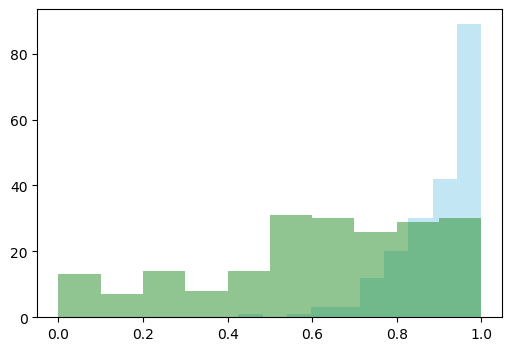

In [91]:
plt.hist(burst_psi_ES2i.loc[low_exons, 'psi_binary'], color='skyblue', alpha=0.5)
plt.hist(burst_psi_ES2i.loc[massive_exons, 'psi_binary'], color='forestgreen', alpha=0.5)
plt.show()

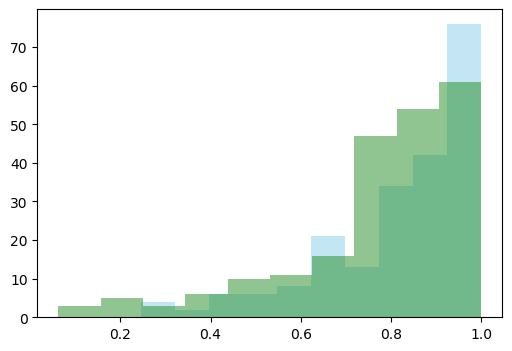

In [92]:
plt.hist(burst_psi_ES2i.loc[bursty_exons, 'psi_binary'], color='skyblue', alpha=0.5, label='high expression; low freq')
# plt.hist(burst_psi_ES2i.loc[bursty_exons, 'psi_binary'], color='skyblue', alpha=0.5)
plt.hist(burst_psi_ES2i.loc[rapid_exons, 'psi_binary'], color='forestgreen', alpha=0.5, label='high expression; high freq')
plt.show()

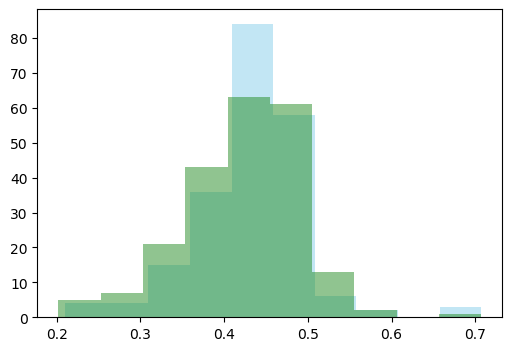

In [93]:
plt.hist(burst_psi_ES2i.loc[bursty_exons, 'psi_std'], color='skyblue', alpha=0.5)
# plt.hist(burst_psi_ES2i.loc[bursty_exons, 'psi_binary'], color='skyblue', alpha=0.5)
plt.hist(burst_psi_ES2i.loc[rapid_exons, 'psi_std'], color='forestgreen', alpha=0.5)
plt.show()

In [94]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [95]:
def test_pearson(x, y):
    x_t = x.loc[x.dropna().index].index
    y_t = y.loc[y.dropna().index].index
    
    common = [z for z in x_t if z in y_t]
    
    return pearsonr(x.loc[common], y.loc[common])

In [96]:
test_pearson(np.log10(burst_psi.loc[low_exp, 'size']+1), burst_psi.loc[low_exp, 'psi_binary'])

(0.053721095008442216, 0.4397963625647641)

In [97]:
test_pearson(np.log10(burst_psi.loc[med_exp, 'size']+1), burst_psi.loc[med_exp, 'psi_binary'])

(0.05938934967521538, 0.3930014450349632)

In [98]:
test_pearson(np.log10(burst_psi.loc[high_exp, 'size']+1), burst_psi.loc[high_exp, 'psi_binary'])

(-0.06617394741177829, 0.3411111415834544)

In [99]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, c=shalek_PSI.loc['Acpp_AE', shalek_pca.index], cmap=cm.viridis, vmin=0, vmax=1)
plt.show()

NameError: name 'shalek_pca' is not defined

In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, c=shalek_PSI.loc['Irgm1_1', shalek_pca.index], cmap=cm.viridis, vmin=0, vmax=1)
plt.show()

In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, c=shalek_PSI.loc['Irf7_1', shalek_pca.index], cmap=cm.viridis, vmin=0, vmax=1)
plt.show()

In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, c=shalek_tpm_LPS.loc['WARS', shalek_pca.index], cmap=cm.viridis)
plt.show()

In [ ]:
shalek_tpm_LPS

In [ ]:
shalek_LPS = shalek_counts_paper.loc[shalek_counts_paper['Gene Category'] == 'LPS Response', shalek_cells]


In [ ]:
ztab_shalek_paper = pd.DataFrame(zscore(shalek_LPS, axis=1))
ztab_shalek_paper.columns = shalek_LPS.columns
ztab_shalek_paper.index = shalek_LPS.index
ztab_shalek_paper = ztab_shalek_paper.dropna()
pca1 = PCA(n_components = 2)
pca_shalek_paper = pca1.fit_transform(ztab_shalek_paper.T)
plt.scatter(pca_shalek_paper.T[0], pca_shalek_paper.T[1])#, 
            #c= shalek_PSI.loc['Irgm1_1', shalek_tpm_LPS.columns], cmap=cm.viridis)
plt.show()

In [ ]:
ztab_shalek_paper

In [ ]:
LPS_genes = shalek_LPS.loc[shalek_LPS.mean(axis=1) > 1].index

In [ ]:
shalek_tpm_tab = pd.read_csv('shalek.tpm.gene_symbols.tab', sep='\t', index_col=0)
shalek_tpm_tab = shalek_tpm_tab.loc[shalek_tpm_tab.mean(axis=1) >= 2]

In [ ]:
shalek_tpm_tab.index = [x.upper() for x in shalek_tpm_tab.index]

In [ ]:
shalek_tpm_LPS = shalek_tpm_tab.loc[[x for x in LPS_genes if x in shalek_tpm_tab.index]]

In [ ]:
from scipy.stats import zscore
shalek_tpm_LPS.sub(shalek_tpm_LPS.mean(axis = 1), axis=0).shape


In [ ]:
ztab_shalek_tpm = pd.DataFrame(zscore(shalek_tpm_LPS, axis=1))
ztab_shalek_tpm.columns = shalek_tpm_LPS.columns
ztab_shalek_tpm.index = shalek_tpm_LPS.index
pca1 = PCA(n_components = 2)
pca_shalek_tpm = pca1.fit_transform(ztab_shalek_tpm.T)
plt.scatter(pca_shalek_tpm.T[0], pca_shalek_tpm.T[1], c= shalek_PSI.loc['Irgm1_1', shalek_tpm_LPS.columns], cmap=cm.viridis)
plt.show()

In [ ]:
pca_shalek_tpm

In [ ]:
pca1 = PCA(n_components = 2)
pca_shalek_tpm = pca1.fit_transform(shalek_tpm_LPS.T).shape
plt.scatter(pca_shalek_tpm.T[0], pca_shalek_tpm.T[1], c= shalek_PSI.loc['Irgm1_1', shalek_tpm_LPS.columns], cmap=cm.viridis)
plt.show()

In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, c=shalek_PSI.loc['Irgm1_1', shalek_tpm_LPS.columns], cmap=cm.viridis)
plt.show()

In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, c=shalek_PSI.loc['Irgm1_1', shalek_tpm_LPS.columns], cmap=cm.viridis)
plt.show()

In [ ]:


pca1 = PCA(n_components = 2)
pca_shalek_paper = pca1.fit_transform(np.log10(shalek_LPS.loc[shalek_LPS.mean(axis =1 ) >= 10].T+1))

In [ ]:
plt.scatter(pca_shalek_paper.T[0], pca_shalek_paper.T[1])
plt.show()

In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, 
            c=shalek_PSI.loc['Acpp_AE', shalek_tpm_LPS.columns], cmap=cm.viridis, vmin=0, vmax=1)
plt.show()

In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, 
            c=shalek_PSI.loc['Irf7_1', shalek_tpm_LPS.columns], cmap=cm.viridis, vmin=0, vmax=1)
plt.show()

In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, 
            c=shalek_PSI.loc['Clec7a_other_1', shalek_tpm_LPS.columns], cmap=cm.viridis, vmin=0, vmax=1)
plt.show()

In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, c=shalek_PSI.loc['Irgm1_1', shalek_tpm_LPS.columns], cmap=cm.viridis)
plt.show()

In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2)
plt.show()